# **Project: Atomic Sizzle Explosion**

**The topic revolves around finding the mass of the higgs boson??**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares, curve_fit
from scipy.stats import linregress
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import random

import Modules.Histogram as h
import Modules.Particle as p
import Modules.Material as m
import Modules.Experiment as e
import Modules.ParticleTracker as pt
import Modules.Cylinder as c
import Modules.CircleFit as cf
import Modules.LinearFit as lf

%matplotlib inline

In [2]:
px1,py1,pz1,Q1,px2,py2,pz2,Q2,px3,py3,pz3,Q3,px4,py4,pz4,Q4 = np.loadtxt('uploaded/SM_H4l.csv', delimiter =',', unpack = True)

interactionT = 21835 #total number of interactions

Muon1 = np.zeros((interactionT, 4))
Muon2 = np.zeros((interactionT, 4))
Muon3 = np.zeros((interactionT, 4))
Muon4 = np.zeros((interactionT, 4))


for i in range(interactionT):
    Muon1[i] = (px1[i],py1[i],pz1[i],Q1[i])
    Muon2[i] = (px2[i],py2[i],pz2[i],Q2[i])
    Muon3[i] = (px3[i],py3[i],pz3[i],Q3[i])
    Muon4[i] = (px4[i],py4[i],pz4[i],Q4[i])

print(Muon1[0])
print(Muon2[0])
print(Muon3[0])
print(Muon4[0])

[ 2.83290e+04 -3.45770e+04  1.16337e+05  1.00000e+00]
[ 9.3820e+03  4.1685e+04  3.2582e+04 -1.0000e+00]
[-1.2763e+04  8.1700e+03  2.3891e+04  1.0000e+00]
[-4.716e+03  9.016e+03  1.877e+03 -1.000e+00]


**Interaction Module**

In [3]:

class Interaction:

    import Modules.Particle as p

    mass = 105.6583755 #muon mass in MeV

    def __init__(self, i):
        self._Number = i
        self._MuonA = p.Particle(px=Muon1[i,0], py=Muon1[i,1], pz=Muon1[i,2], Q=Muon1[i,3], m=105.6583755)
        self._MuonB = p.Particle(px=Muon2[i,0], py=Muon2[i,1], pz=Muon2[i,2], Q=Muon2[i,3], m=105.6583755)
        self._MuonC = p.Particle(px=Muon3[i,0], py=Muon3[i,1], pz=Muon3[i,2], Q=Muon3[i,3], m=105.6583755)
        self._MuonD = p.Particle(px=Muon4[i,0], py=Muon4[i,1], pz=Muon4[i,2], Q=Muon4[i,3], m=105.6583755)
        self._CollisionParticle = self._MuonA + self._MuonB + self._MuonC + self._MuonD

    def __str__(self):
        output = f"Interaction {self._Number} results in the 4 Muons: {self._MuonA}, {self._MuonB}, {self._MuonC}, {self._MuonD}\nThe Collision Particle for this is {self._CollisionParticle}"
        return output

    def plot(self):
        fig = plt.figure()
        plot = fig.add_subplot(211, projection='3d')
        plt.title(f'Interaction Number {self._Number}, Resultant Muons')
        plt.xlabel("px")
        plt.ylabel("py")
        #plt.zlabel("pz")
        plt.quiver(0,0,0, Test._MuonA.px, Test._MuonA.py, Test._MuonA.pz, color = 'r')
        plt.quiver(0,0,0, Test._MuonB.px, Test._MuonB.py, Test._MuonB.pz, color = 'r')
        plt.quiver(0,0,0, Test._MuonC.px, Test._MuonC.py, Test._MuonC.pz, color = 'r')
        plt.quiver(0,0,0, Test._MuonD.px, Test._MuonD.py, Test._MuonD.pz, color = 'r')
        plot.set_xlim([-2e5, 2e5])
        plot.set_ylim([-2e5, 2e5])
        plot.set_zlim([-1e5, 5e5])
        plt.savefig(f'graphs/test{self._Number}_muongraph.png')
        plt.show()
        fig = plt.figure()
        plot = fig.add_subplot(212, projection='3d')
        plt.title(f'Interaction Number {self._Number}, Calculated input Particle')
        plt.xlabel("px")
        plt.ylabel("py")
        #plt.zlabel("pz")
        plt.quiver(0,0,0,Test._CollisionParticle.px,Test._CollisionParticle.py,Test._CollisionParticle.pz, color = 'b')
        plot.set_xlim([-2e5, 2e5])
        plot.set_ylim([-2e5, 2e5])
        plot.set_zlim([-1e5, 5e5])
        plt.savefig(f'graphs/test{self._Number}_collisiongraph.png')
        plt.show()

        return plt

    @property
    def i(self):
        return self._Number
    @i.setter
    def i(self, value):
        self._Number = value





**Testing Class Interaction**

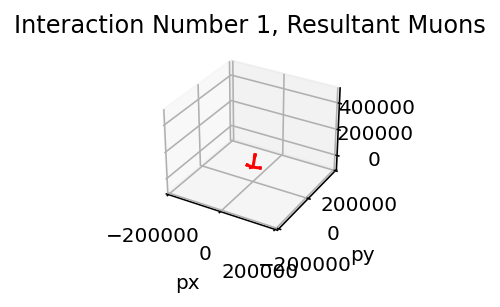

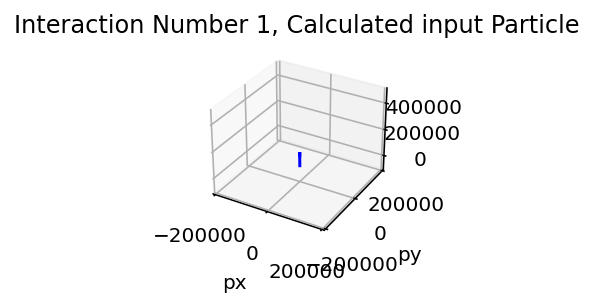

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

In [4]:
Test = Interaction(1) #random interaction


Test.plot()


**Histogram of the all the collision particle masses**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

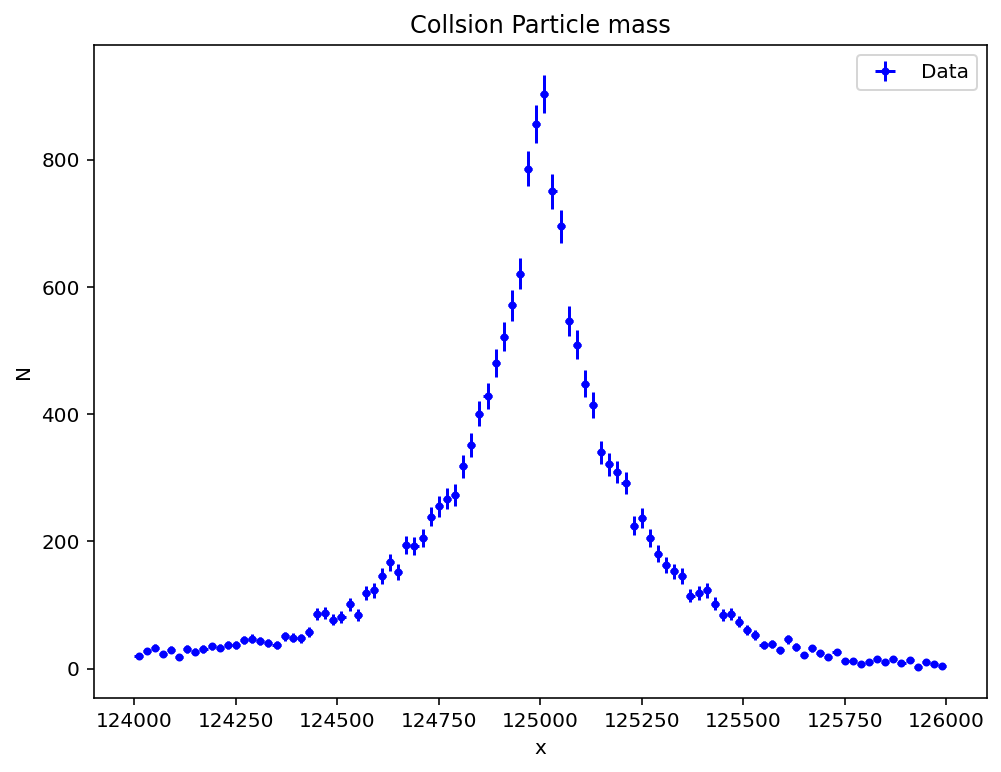

In [5]:
Histf = h.Histogram(100, 124000, 126000, "Collsion Particle mass")


for x in range(interactionT):
    inter = Interaction(x)
    Cmass = inter._CollisionParticle.mass()
    Histf.fill(Cmass)


Histf.plot(color = 'b', marker='.')

**Looking at the experiment to model the atlas detector** ignore for now



**Testing out cylinder module**



In [6]:
'''
innerx = 0.85
innery = 0.85
outerx = 1.55
outery = 1.55
innerR = np.sqrt(innerx**2+innery**2) #1.2?
outerR = np.sqrt(outerx**2+outery**2) #2.2?
lowz = -0.5
highz = 0.5

innerC = c.Cylinder(innerR,lowz,highz, material = m.Material(rho = 2328, Z = 14, A = 28.0855)) #material is silicon
outerC = c.Cylinder(outerR,lowz,highz, material = m.Material(rho = 2328, Z = 14, A = 28.0855))




print(innerC)
print('----------')

innerRtest = np.linspace(innerR-.01, innerR+.01, 3)
ztest = np.linspace(lowz-0.1, highz+0.1, 3)
for r in innerRtest:
    for z in ztest:
        print(f"({r:.5}, {z:.5}) is within the Inner silicon cylinder: ", innerC.is_in_volume((innerx,innery,z)))

print('----------')
print(outerC)
print('----------')

outerRtest = np.linspace(outerR-.01, outerR+.01, 3)
ztest = np.linspace(lowz-0.1, highz+0.1, 3)
for r in outerRtest:
    for z in ztest:
        print(f"({r:.5}, {z:.5}) is within the Outer silicon cylinder: ", outerC.is_in_volume((outerx,outery,z)))
'''



'\ninnerx = 0.85\ninnery = 0.85\nouterx = 1.55\noutery = 1.55\ninnerR = np.sqrt(innerx**2+innery**2) #1.2?\nouterR = np.sqrt(outerx**2+outery**2) #2.2?\nlowz = -0.5\nhighz = 0.5\n\ninnerC = c.Cylinder(innerR,lowz,highz, material = m.Material(rho = 2328, Z = 14, A = 28.0855)) #material is silicon\nouterC = c.Cylinder(outerR,lowz,highz, material = m.Material(rho = 2328, Z = 14, A = 28.0855))\n\n\n\n\nprint(innerC)\nprint(\'----------\')\n\ninnerRtest = np.linspace(innerR-.01, innerR+.01, 3)\nztest = np.linspace(lowz-0.1, highz+0.1, 3)\nfor r in innerRtest:\n    for z in ztest:\n        print(f"({r:.5}, {z:.5}) is within the Inner silicon cylinder: ", innerC.is_in_volume((innerx,innery,z)))\n\nprint(\'----------\')\nprint(outerC)\nprint(\'----------\')\n\nouterRtest = np.linspace(outerR-.01, outerR+.01, 3)\nztest = np.linspace(lowz-0.1, highz+0.1, 3)\nfor r in outerRtest:\n    for z in ztest:\n        print(f"({r:.5}, {z:.5}) is within the Outer silicon cylinder: ", outerC.is_in_volume((o

**Simulation Code**



In [7]:
### Setup experiment with parameters ###
Bfieldstrength = 4 # T, note actual B field strength must be changed in code manually
numberOfDetectors = 10 # note that as detector numbers increase, the space between them decreases
detectorLength = 21 # m, note length of detector is centralised in the code
detectorThickness = 0.01 # m
detectorMaterial = 'Silicone' # actual material data has to be changed below
numberOfEvents = 99 # one event = 4 muons, memory limit seems to be  400?
saveNumber = 100 # number of events required for a new set if graphs to be saved
event = 0 # specific event number
histoResolution = 1000 # number of bins for the histograms

In [8]:
px1,py1,pz1,Q1,px2,py2,pz2,Q2,px3,py3,pz3,Q3,px4,py4,pz4,Q4 = np.loadtxt('uploaded/SM_H4l.csv', delimiter =',', unpack = True)

Muon = [0]*numberOfEvents*4 # one event = 4 muons
i=0
mMuon = 105.6583755 # MeV

while i<numberOfEvents*4: # events also multiplied by 4 here
    Muon[i] = p.Particle(px=px1[i],py=py1[i],pz=pz1[i],Q=Q1[i], m=mMuon)
    Muon[i+1] = p.Particle(px=px2[i],py=py2[i],pz=pz2[i],Q=Q2[i], m=mMuon)
    Muon[i+2] = p.Particle(px=px3[i],py=py3[i],pz=pz3[i],Q=Q3[i], m=mMuon)
    Muon[i+3] = p.Particle(px=px4[i],py=py4[i],pz=pz4[i],Q=Q4[i], m=mMuon)
    i = i+4

--------------------
-Running Experiment-
--------------------
-Parameters-
Number of Events: 99
Total Number of Particles: 396
Number of Detectors: 10
Detectors Length: 21 m
Detectors Thickness: 0.01 m
Detectors Material: Silicone
Time: 1e-08 seconds
--------------------
Adding shape
Cylinder with radius (0.1 to 0.11)with high height (10.5)
 and low height (-10.5)
Material with density 2330.0 kg/m^3, Z = 14, A = 28.085, X0 = 0.09474792513017592m
--------------------
Adding shape
Cylinder with radius (0.2 to 0.21000000000000002)with high height (10.5)
 and low height (-10.5)
Material with density 2330.0 kg/m^3, Z = 14, A = 28.085, X0 = 0.09474792513017592m
--------------------
Adding shape
Cylinder with radius (0.30000000000000004 to 0.31000000000000005)with high height (10.5)
 and low height (-10.5)
Material with density 2330.0 kg/m^3, Z = 14, A = 28.085, X0 = 0.09474792513017592m
--------------------
Adding shape
Cylinder with radius (0.4 to 0.41000000000000003)with high height (10.5

-Final particle 0 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.6692952416630484m, -0.8416693306678993m, 2.7984101899060345m)
(E,px,py,pz) = (124425.06355380814, 27262.94301236745, -35339.711956170766, 116143.97088887647) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.0664400100945117,-0.08132728679955738,0.27331627841990236) with radius (0.10501620122407912)
Hit in detector 1 (x,y,z): (0.1304326065152032,-0.16013474652940854,0.5374501921940814) with radius (0.20653281068243792)
Hit in detector 2 (x,y,z): (0.1932881092167498,-0.23794793859823146,0.79769539709751) with radius (0.30656078458885433)
Hit in detector 3 (x,y,z): (0.2559302154544956,-0.3159093930295131,1.0579476819650957) with radius (0.4065698215397448)
Hit in detector 4 (x,y,z): (0.31835671616804806,-0.39403578356366165,1.3182023123713715) with radius (0.5065720061925372)
Hit in detector 5 (x,y,z): (0.3805554459185361,-0.4723294287534441,1.57846121538935

-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (53733.22097820224, 9382.0, 41685.0, 32582.0) MeV
--------------------
-Final particle 1 after 138 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.44539520205930666m, 2.3423385872688978m, 1.8167084102225517m)
(E,px,py,pz) = (51029.382208207615, 6209.748669232891, 40150.331726948214, 30876.79660425829) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.022880736729045267,0.10236558815484921,0.07998490290846873) with radius (0.10489157140376955)
Hit in detector 1 (x,y,z): (0.04444012161905324,0.20014566200904532,0.15632771243225096) with radius (0.20502002446238088)
Hit in detector 2 (x,y,z): (0.06573170996290995,0.29799103561696777,0.2326620148119647) with radius (0.30515457558870235)
Hit in detector 3 (x,y,z): (0.08666439773425101,0.39549862460805996,0.30870471035261204) with radius (0.40488255074960633)
Hit in

-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (28291.94432506033, -12763.0, 8170.0, 23891.0) MeV
--------------------
-Final particle 2 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.2933573918835277m, 0.9500680158425052m, 2.5314787791667386m)
(E,px,py,pz) = (26681.01381415626, -10897.81106904177, 9216.796904509793, 22542.264819298285) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.08954122050303619,0.05785249942800436,0.16806944810536764) with radius (0.10660460524405405)
Hit in detector 1 (x,y,z): (-0.17175435532404898,0.11196351222605078,0.3231837045946097) with radius (0.2050253317099443)
Hit in detector 2 (x,y,z): (-0.256147050186248,0.16850327845830063,0.48319702030306483) with radius (0.3066018039254039)
Hit in detector 3 (x,y,z): (-0.3387462648543667,0.22474469169510525,0.6405116128286227) with radius (0.40652085850287273)
Hit in d

-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (10347.135095876216, -4716.0, 9016.0, 1877.0) MeV
--------------------
-Final particle 3 after 154 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.8063598231497413m, 2.308977411929295m, 0.5363893930621328m)
(E,px,py,pz) = (8489.590639897857, -6350.766538018446, 5425.674006356609, 1513.8730585102646) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.04985554395301448,0.09387470106199625,0.019608202018581652) with radius (0.10629221402497041)
Hit in detector 1 (x,y,z): (-0.09794525721242175,0.18182530353223827,0.03806119085580414) with radius (0.2065277570085872)
Hit in detector 2 (x,y,z): (-0.14683155096862743,0.2687750704698824,0.0564109134814326) with radius (0.30626711032355874)
Hit in detector 3 (x,y,z): (-0.19697819818796583,0.3555721143275639,0.07485071861112656) with radius (0.40648731720528714)
Hit in

-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (116189.9767135372, 105850.0, -23464.0, 41777.0) MeV
--------------------
-Final particle 0 after 142 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.7400704640158495m, -0.5633904990236943m, 1.0777440420596023m)
(E,px,py,pz) = (113731.69482688686, 104261.56260624412, -19753.0348407698, 40917.37310712869) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.10243066002466283,-0.022643564077294363,0.04042229820721311) with radius (0.10490362771234651)
Hit in detector 1 (x,y,z): (0.20154787086391582,-0.044437245403137815,0.07952619823040719) with radius (0.20638850023389477)
Hit in detector 2 (x,y,z): (0.29780483362083093,-0.06548984406940647,0.11749166144011113) with radius (0.3049207087164891)
Hit in detector 3 (x,y,z): (0.3969716690373612,-0.08706485500684817,0.156591005165532) with radius (0.4064071788190653)
Hi

-Final particle 1 after 136 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.5223565884392354m, -1.6104531991352213m, -0.16912320473212317m)
(E,px,py,pz) = (54752.54068219408, 47003.90733495698, -27908.1254982868, -3098.1888072347765) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.08790051868727651,-0.0599964928224688,-0.005993156652055333) with radius (0.10642405901152614)
Hit in detector 1 (x,y,z): (0.17042889042754003,-0.11606441552778357,-0.011613450798381516) with radius (0.2061963996876969)
Hit in detector 2 (x,y,z): (0.2534880247474068,-0.17223798253322142,-0.01726617354195883) with radius (0.30646712926096364)
Hit in detector 3 (x,y,z): (0.3362512465265406,-0.22795783646485024,-0.022894561764903232) with radius (0.40623844721590274)
Hit in detector 4 (x,y,z): (0.4195465683672608,-0.2837806020881522,-0.028547070021279642) with radius (0.5065083939583418)
Hit in detector 5 (x,y,z): (0.5025442684893665,-0.3391498174657055,-

-Calculated parameters for curvature:-
Center (x,y) = (-10.396213956663829, 13.334128435870765), Radius = 16.907961292068418, Residuals = 1.1399299604570772e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -142.0714823414554 degrees
Angle between tangent and x-axis, phi = -142.0575424743 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998899449584 degrees

Momentum (px,py,pz) = (-16000.92359868251,-12475.432949080605,0.003897263776634678)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (17543.342147159794, 10039.0, -14212.0, -2235.0) MeV
--------------------
-Final particle 3 after 149 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.4497594363682904m, -2.5891344787818897m, -0.38487307079768573m)
(E,px,py,pz) = (15591.550305398263, 6020.763794493367, -14239.155505968572, -2020.4284408580265) MeV
-------

Hit in detector 6 (x,y,z): (0.393336192447979,-0.5865941431467595,-0.09093611184951607) with radius (0.7062620257833169)
Hit in detector 7 (x,y,z): (0.4467594779072466,-0.6712430952989382,-0.10385890904782101) with radius (0.8063258175740468)
Hit in detector 8 (x,y,z): (0.4995982442222187,-0.756259247893326,-0.11677438289717702) with radius (0.9063809660700642)
Hit in detector 9 (x,y,z): (0.5518489417205262,-0.8416440967366912,-0.12965004600485416) with radius (1.0064303453542056)
--------------------
-Calculated parameters for curvature:-
Center (x,y) = (-11.886016876379335, -8.395173595451997), Radius = 14.551852235652253, Residuals = 2.7805302001065972e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -54.76357597744087 degrees
Angle between tangent and x-axis, phi = -54.76618192548387 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998651535209 degrees

Momentum (px,py,pz) = (10074.2098988909,-14263.222494800373,0.004109760381

-Final particle 0 after 141 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.7925780735535081m, -2.506519320478295m, -1.440270143491108m)
(E,px,py,pz) = (55893.1235004262, 16277.670634315155, -46225.08820479171, -26875.80231589759) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.029014415594367477,-0.10234621582300085,-0.05817884965665871) with radius (0.10637943506886537)
Hit in detector 1 (x,y,z): (0.05618318124280218,-0.19731697185976832,-0.11220281892175257) with radius (0.2051597846520369)
Hit in detector 2 (x,y,z): (0.08390045190943157,-0.2933451138832436,-0.16686841476156072) with radius (0.30510759031820234)
Hit in detector 3 (x,y,z): (0.1118404136430459,-0.3893043110365905,-0.221541713472449) with radius (0.40505076807175916)
Hit in detector 4 (x,y,z): (0.14000059732040443,-0.4851915247988684,-0.27622831907169687) with radius (0.5049861215783271)
Hit in detector 5 (x,y,z): (0.16838841349320677,-0.5810112091816462,-0.3309

-Final particle 1 after 142 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.19561129899924234m, 0.91788946799587m, -2.8472111618193288m)
(E,px,py,pz) = (83286.46759330154, -4873.327258789691, 25608.974671284257, -79101.55256499098) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (-0.02438516177016781,0.10451078374321687,-0.3251340820656254) with radius (0.10731793900918289)
Hit in detector 1 (x,y,z): (-0.04663290657085687,0.20203684821979911,-0.6283379457302835) with radius (0.20734877866492585)
Hit in detector 2 (x,y,z): (-0.06847111663732999,0.29963546053631324,-0.9315482393656006) with radius (0.3073592409939408)
Hit in detector 3 (x,y,z): (-0.08985032870448169,0.39728011805422025,-1.2347764182375396) with radius (0.4073138516788726)
Hit in detector 4 (x,y,z): (-0.11071920918648467,0.49502118545750556,-1.5380090867747813) with radius (0.507252124031664)
Hit in detector 5 (x,y,z): (-0.13116448639977177,0.5930091080033674,-1.8417

-Calculated parameters for curvature:-
Center (x,y) = (14.710194230585259, 1.3722047776989585), Radius = 14.774044865628614, Residuals = 3.397355022224546e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -84.66523136046786 degrees
Angle between tangent and x-axis, phi = -84.67072432785183 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998211876773 degrees

Momentum (px,py,pz) = (1646.644380746059,-17652.218577823918,0.00553293377121034)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (36299.453793305394, 9963.0, 398.0, -34903.0) MeV
--------------------
-Final particle 3 after 129 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.8227651954356059m, -0.008459964522041116m, -2.882686014912964m)
(E,px,py,pz) = (36106.52004867241, 9886.290855453812, -613.207638852296, -34721.1010171901) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (0.32893035755194666, -8.125977785777842), Radius = 8.132606120111012, Residuals = 1.6825441841849594e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = 2.2876243683050514 degrees
Angle between tangent and x-axis, phi = 2.3180026295389013 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -15.933176837004451 degrees

Momentum (px,py,pz) = (9751.141803270839,394.71515237259223,-34184.54299599153)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (60538.37234921595, 19397.0, 25685.0, -51273.0) MeV
--------------------
-Final particle 0 after 139 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.9987308945478535m, 1.2429768242290362m, -2.538556630902819m)
(E,px,py,pz) = (58846.89872346014, 20390.202742128673, 23799.735289132008, -49807.213915044405) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (21.361694105407867, -16.129837056607897), Radius = 26.767386713166466, Residuals = 1.0894025420446732e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 52.94034066237705 degrees
Angle between tangent and x-axis, phi = 52.94419226229508 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -32.12556000654588 degrees

Momentum (px,py,pz) = (19355.79599785024,25634.021709064178,-51154.33685803991)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (39107.3224561886, 1481.0, -29359.0, 25792.0) MeV
--------------------
-Final particle 1 after 129 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.21851012596006128m, -2.2401281345862922m, 1.9793183318597727m)
(E,px,py,pz) = (36146.02669892561, 3957.1200562157187, -26833.641615544173, 23891.85972118373) MeV
---------------

-Final particle 2 after 131 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.8670495474613509m, 2.067560048387063m, -1.9877557495185698m)
(E,px,py,pz) = (21096.84110239882, -4921.667333211681, 14959.911106889942, -14037.228755830574) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.04805953082030925,0.09492617008392683,-0.09413964194882958) with radius (0.10639876065758877)
Hit in detector 1 (x,y,z): (-0.0920203888905674,0.1832706105428087,-0.18142263356033275) with radius (0.2050752755948535)
Hit in detector 2 (x,y,z): (-0.13592925195090222,0.27302805322588786,-0.26981284762809843) with radius (0.304993572693344)
Hit in detector 3 (x,y,z): (-0.17921760850904858,0.3630594387485623,-0.3582305242539774) with radius (0.4048840664488091)
Hit in detector 4 (x,y,z): (-0.2226306109585733,0.45484455282860187,-0.4480658990525945) with radius (0.5064069077072689)
Hit in detector 5 (x,y,z): (-0.2642278662853783,0.5443280651094538,-0.535346

-Calculated parameters for curvature:-
Center (x,y) = (5.610282255174003, 4.842605164905279), Radius = 7.411210823397161, Residuals = 1.225160685315262e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -49.19841763937733 degrees
Angle between tangent and x-axis, phi = -49.20035449086872 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 76.74148231533607 degrees

Momentum (px,py,pz) = (5811.123769954662,-6732.335893387703,2095.525669897683)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (49024.30814088368, 48100.0, 3416.0, 8837.0) MeV
--------------------
-Final particle 0 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.9464872062320078m, 0.10008808516133234m, 0.5400702435953837m)
(E,px,py,pz) = (46853.317000403265, 46082.985485157864, -176.13905613157195, 8458.698130339144) MeV
--------------------


-Calculated parameters for curvature:-
Center (x,y) = (2.840438996122247, -39.96906227632574), Radius = 40.06985789193671, Residuals = 1.55440620851846e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 4.062252033472077 degrees
Angle between tangent and x-axis, phi = 4.064944486764247 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 79.6205364386899 degrees

Momentum (px,py,pz) = (47962.86694297871,3408.526241841642,8807.220139215338)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (47298.484845630235, -44285.0, -1294.0, 16562.0) MeV
--------------------
-Final particle 1 after 150 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.800613814522332m, -0.19007107822750297m, 1.050674332689567m)
(E,px,py,pz) = (45025.54268310563, -41932.29247124187, -4523.9015594366665, 15764.056997056126) MeV
--------------------


-Final particle 2 after 133 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.9332598582852656m, 0.5967174375595266m, 0.09086506359117813m)
(E,px,py,pz) = (21363.325386428303, 20509.565938018994, 5947.751375857758, 602.0519105319269) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.10570532672306447,0.013306630729354799,0.0033328760465262844) with radius (0.10653958193552862)
Hit in detector 1 (x,y,z): (0.2047375531714579,0.026302325018880936,0.006444419883888122) with radius (0.20642014916193233)
Hit in detector 2 (x,y,z): (0.3037032337420181,0.03980232150022702,0.009525866888278854) with radius (0.30630030849179096)
Hit in detector 3 (x,y,z): (0.40259785230054473,0.05381077648935073,0.012619126773309468) with radius (0.4061780771329222)
Hit in detector 4 (x,y,z): (0.5019148082482584,0.06839995307254394,0.015678116361968086) with radius (0.5065540724534867)
Hit in detector 5 (x,y,z): (0.6006624222713809,0.08342339435862227,0.01870

-Calculated parameters for curvature:-
Center (x,y) = (-0.8692281909780706, 6.511869452477321), Radius = 6.569464135669611, Residuals = 5.403940302845051e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -172.4671628137092 degrees
Angle between tangent and x-axis, phi = -172.39689396245856 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 53.100891096821734 degrees

Momentum (px,py,pz) = (-7814.0493981273,-1043.0479407051866,5918.800113197723)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (91355.49168874476, 4264.0, 54841.0, -72939.0) MeV
--------------------
-Final particle 0 after 125 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.17594797360847547m, 1.7961034612247426m, -2.3937743030389305m)
(E,px,py,pz) = (88859.20440067413, 6308.918746424096, 53004.272366118814, -71040.07107413241) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (21.992911218686668, -9.456087767920536), Radius = 23.939587837918175, Residuals = 1.9829758416280802e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -113.24615569209908 degrees
Angle between tangent and x-axis, phi = -113.26580501675704 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999333570612 degrees

Momentum (px,py,pz) = (-11347.286770204684,-26391.450315923783,0.003341407346291651)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (16468.08603609762, 8510.0, -14075.0, 813.0) MeV
--------------------
-Final particle 2 after 135 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.24882122626859m, -2.713919558115959m, 0.14920629060767587m)
(E,px,py,pz) = (14435.207860261055, 4421.040303834729, -13720.502662303934, 752.5102353052193) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (-11.661525355906544, -7.053792836383765), Radius = 13.628883816259016, Residuals = 2.29905494948818e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -58.842081984562384 degrees
Angle between tangent and x-axis, phi = -58.83120542735013 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 87.24382387250652 degrees

Momentum (px,py,pz) = (8464.53561518283,-13993.804325139987,787.3376879834575)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (10994.410384023024, -4514.0, -9818.0, 2024.0) MeV
--------------------
-Final particle 3 after 153 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.7574075101571126m, -2.8336806111875723m, 0.5413666483447257m)
(E,px,py,pz) = (9122.812302946882, -680.2392814537968, -8957.373149997007, 1586.5943135518194) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (8.161997895851984, -3.7527861640772335), Radius = 8.983405712379959, Residuals = 1.7005026868556307e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -114.69144741767771 degrees
Angle between tangent and x-axis, phi = -114.69238944945761 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 79.4021297345541 degrees

Momentum (px,py,pz) = (-4503.342407740392,-9794.395323698396,2017.0236824824149)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (47094.64769687011, 11403.0, 41862.0, -18315.0) MeV
--------------------
-Final particle 0 after 151 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.6237678418809416m, 2.6884405353918543m, -1.169177211972397m)
(E,px,py,pz) = (44784.608780251096, 7739.105001931682, 40478.185211057506, -17529.19837584596) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-35.27900351776114, 9.608520887251743), Radius = 36.564079317883596, Residuals = 2.233008159137812e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 74.76260196294582 degrees
Angle between tangent and x-axis, phi = 74.76457304733596 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999102542593 degrees

Momentum (px,py,pz) = (11530.225640455896,42334.8063352725,0.006872695498742485)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (46433.07619243327, 14066.0, -36127.0, 25554.0) MeV
--------------------
-Final particle 1 after 148 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.8182999727276388m, -2.363896534475278m, 1.6513393254968898m)
(E,px,py,pz) = (43927.209125589136, 10642.904149015161, -35067.87073532087, 24219.033243269427) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (-30.295125819524408, -11.794021606292533), Radius = 32.50990681574139, Residuals = 1.184993591700294e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -68.72661438211685 degrees
Angle between tangent and x-axis, phi = -68.72882468322061 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 56.60750834883125 degrees

Momentum (px,py,pz) = (14152.828921085582,-36354.15867287641,25716.266262865975)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (25670.93749149636, -5042.0, -16498.0, -19010.0) MeV
--------------------
-Final particle 2 after 152 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.44690252501111005m, -1.9628013391799426m, -2.2197384605057078m)
(E,px,py,pz) = (23219.097502528282, -2250.618169988507, -15508.087854864487, -17133.279139683797) MeV
------

-Calculated parameters for curvature:-
Center (x,y) = (13.795265919576174, -4.215273795349125), Radius = 14.424920627330044, Residuals = 6.800472538491786e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -106.99382311720932 degrees
Angle between tangent and x-axis, phi = -106.99102710096885 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -42.217339093211834 degrees

Momentum (px,py,pz) = (-5058.333904308984,-16554.336611999577,-19078.55934595124)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (7863.456472335388, -7568.0, -1216.0, -1752.0) MeV
--------------------
-Final particle 3 after 145 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.8829819109933297m, 0.24412861143806106m, -0.652623681938826m)
(E,px,py,pz) = (6045.922052192737, -5533.286644775454, 2074.0818076009245, -1273.944109080455) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (-1.0108899621818246, 6.277071350389617), Radius = 6.357903475750652, Residuals = 9.148924952203826e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -170.8719321508542 degrees
Angle between tangent and x-axis, phi = -170.85136188139364 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998778106189 degrees

Momentum (px,py,pz) = (-7532.430962653804,-1213.05915225923,0.0016270691437734466)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (83991.19190541537, 11673.0, -49860.0, 66575.0) MeV
--------------------
-Final particle 0 after 134 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.45447723254624667m, -1.7705005353116412m, 2.376091524116054m)
(E,px,py,pz) = (81645.92002530718, 13433.510992474805, -47968.49183005253, 64688.55901202146) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (41.327017660639235, 9.668997031740481), Radius = 42.44302494150465, Residuals = 7.48886363498205e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -76.82348287122936 degrees
Angle between tangent and x-axis, phi = -76.8317627526118 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 37.568821097504006 degrees

Momentum (px,py,pz) = (11602.79152320334,-49592.400185671075,66210.57116090952)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (41935.27273897611, -23364.0, 31836.0, 14112.0) MeV
--------------------
-Final particle 1 after 144 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.5673468399986772m, 2.345170004574891m, 1.012789629740747m)
(E,px,py,pz) = (39697.597912455574, -19319.330753105794, 31951.29714232701, 13482.069073650522) MeV
-------------------

-Calculated parameters for curvature:-
Center (x,y) = (26.517241980636754, 19.460399702268365), Radius = 32.89181249598529, Residuals = 2.1877115756862475e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 126.27443022086331 degrees
Angle between tangent and x-axis, phi = 126.27409688039702 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 70.31408953717695 degrees

Momentum (px,py,pz) = (-23352.480187095574,31820.691118541512,14121.41925101497)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (32300.79048092033, 11107.0, 6542.0, 29617.0) MeV
--------------------


-Final particle 2 after 144 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.0614206673335125m, 0.5483998946763411m, 2.7492955421905823m)
(E,px,py,pz) = (32136.964431932836, 11678.511517869589, 5228.3858194031955, 29479.64839780859) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.09207126452652424,0.05361656696547463,0.2447990946636546) with radius (0.10654507968309201)
Hit in detector 1 (x,y,z): (0.1790010448639597,0.103170167197004,0.47480077223136835) with radius (0.20660459206379483)
Hit in detector 2 (x,y,z): (0.26633343685763217,0.15190966794963837,0.7048238835826952) with radius (0.30661057842965517)
Hit in detector 3 (x,y,z): (0.35403339188440053,0.19972752753408896,0.9343557620328146) with radius (0.40648582733479627)
Hit in detector 4 (x,y,z): (0.44233935019746745,0.24680323380013516,1.1643536966760843) with radius (0.506533253545433)
Hit in detector 5 (x,y,z): (0.5310612233243207,0.29305480026647346,1.3943587756044555)

-Calculated parameters for curvature:-
Center (x,y) = (-5.891883976691893, 2.4309560309553238), Radius = 6.37368923350482, Residuals = 5.118081959561687e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 67.59859926196332 degrees
Angle between tangent and x-axis, phi = 67.57924959280231 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 30.938216208150344 degrees

Momentum (px,py,pz) = (2917.149765748716,7070.266900578604,12760.267938470677)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (41323.87602454921, -5642.0, 40171.0, -7881.0) MeV
--------------------
-Final particle 0 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.2810163410200097m, 2.928248597088997m, -0.5729331748791562m)
(E,px,py,pz) = (39240.98580558378, -1957.611326323024, 38464.90505941989, -7514.162626226132) MeV
--------------------


-Calculated parameters for curvature:-
Center (x,y) = (33.40883768588699, 4.691226897392849), Radius = 33.73660328146906, Residuals = 2.528646712909817e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 97.99487258866273 degrees
Angle between tangent and x-axis, phi = 97.99313987843324 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.999986313582 degrees

Momentum (px,py,pz) = (-5629.473156407329,40090.61148672915,0.009670518668406859)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (47442.11786685237, -23942.0, 28102.0, 29796.0) MeV
--------------------
-Final particle 1 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.5789713067756146m, 1.7172029745119557m, 1.8822786710293193m)
(E,px,py,pz) = (44708.729617237026, -24510.564694817756, 24695.637716020305, 28075.203230533923) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (-23.606634054434505, -20.118271455110435), Radius = 31.016431937203514, Residuals = 3.3015841805557545e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 130.42992932172274 degrees
Angle between tangent and x-axis, phi = 130.43861736346454 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 51.08973648125925 degrees

Momentum (px,py,pz) = (-24141.93870013359,28327.976065452476,30043.536469601142)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (29626.457579202972, 8733.0, -27194.0, -7870.0) MeV
--------------------
-Final particle 2 after 144 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.709801754808404m, -2.798445127596389m, -0.8006176624639899m)
(E,px,py,pz) = (27510.720450674682, 4842.565239181386, -26042.673776794476, -7426.794765886705) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (-22.777155715321037, -7.313272744467205), Radius = 23.922435868091462, Residuals = 1.4049947297700048e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -72.19625301838167 degrees
Angle between tangent and x-axis, phi = -72.19925184264385 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999083469682 degrees

Momentum (px,py,pz) = (8775.928498288846,-27332.59061112883,0.004592094835619676)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (14547.875366950093, -3192.0, -8975.0, 10995.0) MeV
--------------------
-Final particle 3 after 136 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.4191364985126823m, -1.9092256788200699m, 2.268345299171799m)
(E,px,py,pz) = (12325.220251479164, -664.8929792021924, -8056.826864967183, 9302.975263285905) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (7.41970320636933, -2.638681356110212), Radius = 7.874937723633539, Residuals = 3.6156405453282137e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -109.57816340879761 degrees
Angle between tangent and x-axis, phi = -109.57699673819847 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 40.87803070185469 degrees

Momentum (px,py,pz) = (-3166.417861730113,-8903.644506746099,10917.748319571032)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (62740.61422788522, -43630.0, -17151.0, -41697.0) MeV
--------------------
-Final particle 0 after 131 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.1063188797469583m, -0.7593169437920029m, -1.9932511044271604m)
(E,px,py,pz) = (59820.37153251331, -42447.61900796528, -13951.171027474898, -39774.74266557194) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (-14.03903019615499, 35.70257062247692), Radius = 38.363616498882116, Residuals = 1.5965449333022396e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -158.540156936786 degrees
Angle between tangent and x-axis, phi = -158.53416453043778 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999322887435 degrees

Momentum (px,py,pz) = (-42843.07241849786,-16846.83138756069,0.0054405026768752345)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (57127.23660122475, 36006.0, 30969.0, -31749.0) MeV
--------------------
-Final particle 1 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.8363619266351225m, 1.6836441513402263m, -1.6668888868541785m)
(E,px,py,pz) = (54524.06332873063, 32372.64270853711, 31655.673463415023, -30377.502527812332) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (4.908434077211036, 10.292638112521475), Radius = 11.403114229152479, Residuals = 2.4091753396696727e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -25.494244183393633 degrees
Angle between tangent and x-axis, phi = -25.495907207781393 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998651410631 degrees

Momentum (px,py,pz) = (12351.16049736276,-5890.118394875381,0.0032207856318827053)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (26842.494103423276, -8330.0, 4399.0, -25135.0) MeV
--------------------
-Final particle 3 after 132 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.8954899522793396m, 0.5490948058502603m, -2.8075728929934063m)
(E,px,py,pz) = (26658.871765441523, -7633.590489361551, 5394.325692836255, -24966.25375731273) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (24.55297612816259, -52.44291484836531), Radius = 57.90602363688451, Residuals = 1.0122683863918028e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 25.085221446168628 degrees
Angle between tangent and x-axis, phi = 25.08827972925636 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -18.058309147405634 degrees

Momentum (px,py,pz) = (62931.49424170377,29463.56967940956,-213121.46088650523)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (23626.53149940366, -3511.0, 23291.0, -1845.0) MeV
--------------------
-Final particle 1 after 138 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.6728156344349783m, 2.9096886091107623m, -0.2228102302132905m)
(E,px,py,pz) = (21570.106877488877, -6527.476870405586, 20502.667674294, -1513.6085957054) MeV
-------------------

-Calculated parameters for curvature:-
Center (x,y) = (-19.35039837939772, -2.916259335113751), Radius = 19.56891173611215, Residuals = 1.0324865731274491e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 98.572502792194 degrees
Angle between tangent and x-axis, phi = 98.57043279922719 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998195685383 degrees

Momentum (px,py,pz) = (-3499.510382345137,23220.472615675495,0.007394989393470953)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (32393.648400455193, 6474.0, -5851.0, -31196.0) MeV
--------------------
-Final particle 2 after 132 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.5673312492792328m, -0.5721187353518826m, -2.887492201522211m)
(E,px,py,pz) = (32208.464846333256, 5747.697481841855, -6482.222473648445, -31021.26382861484) MeV
----------------

-Final particle 3 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.4028456208621702m, -1.6477086739357696m, 0.3207897009661809m)
(E,px,py,pz) = (3988.427730145077, -2129.6767244088005, -3342.904305585742, 431.11549307151597) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.10257242859442602,-0.02866650078873767,0.0110291067647526) with radius (0.10650291721464404)
Hit in detector 1 (x,y,z): (-0.19815352957171517,-0.05764869666762711,0.02136504990305615) with radius (0.2063690711061245)
Hit in detector 2 (x,y,z): (-0.29310439431263613,-0.0886486087586273,0.031654753821146235) with radius (0.3062168542066512)
Hit in detector 3 (x,y,z): (-0.3878362558007993,-0.12181819504159158,0.042083298405571616) with radius (0.40651769205875193)
Hit in detector 4 (x,y,z): (-0.48137379402643976,-0.15681020546220462,0.05251468410474628) with radius (0.506270846595484)
Hit in detector 5 (x,y,z): (-0.5746069093999115,-0.19396330316257657,

-Calculated parameters for curvature:-
Center (x,y) = (26.385243023757884, 29.772729394654146), Radius = 39.78186082225424, Residuals = 3.7136855910906303e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -41.54663298304236 degrees
Angle between tangent and x-axis, phi = -41.54806301092208 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998899065268 degrees

Momentum (px,py,pz) = (35727.27510936398,-31662.29148297322,0.009172870886037375)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (75163.76425307817, 29368.0, 24415.0, 64738.0) MeV
--------------------
-Final particle 1 after 141 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.1947230896098606m, 0.9447702246187814m, 2.582073745961385m)
(E,px,py,pz) = (73659.49489737491, 29924.748268881507, 22454.132141706254, 63451.01587564185) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (20.310984095175684, -24.443145107422417), Radius = 31.780590866054837, Residuals = 9.330567890180955e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 39.738341268151245 degrees
Angle between tangent and x-axis, phi = 39.724821140462105 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 30.540092037503157 degrees

Momentum (px,py,pz) = (29331.81098425782,24373.2115390933,64639.81181222625)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (34555.50661895023, 9757.0, 18452.0, 27539.0) MeV
--------------------
-Final particle 2 after 137 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.7591154338286514m, 1.6440675774262197m, 2.388510122011831m)
(E,px,py,pz) = (32401.25262853696, 7205.2542292593935, 18116.231696925133, 25878.880748614774) MeV
--------------------

-Final particle 3 after 137 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.6052869816823803m, -1.4416188168222386m, 0.199484380293967m)
(E,px,py,pz) = (9844.39124035463, 7648.789787290898, -6162.491903988242, 648.5241981035748) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (0.09983997832033502,-0.03665085197396115,0.007052474265553763) with radius (0.10635462482385136)
Hit in detector 1 (x,y,z): (0.19354134093563247,-0.07217083485027036,0.01366994485427282) with radius (0.20655962832593336)
Hit in detector 2 (x,y,z): (0.2864089798672138,-0.10846716180940623,0.020263880135448598) with radius (0.30626006749095774)
Hit in detector 3 (x,y,z): (0.3793550614606713,-0.14589788207482238,0.0269994684332891) with radius (0.40644366725260767)
Hit in detector 4 (x,y,z): (0.47191565537104224,-0.18427856572276946,0.033697210652834826) with radius (0.5066191622600958)
Hit in detector 5 (x,y,z): (0.5636207060167657,-0.22340660821962033,0.040366

-Calculated parameters for curvature:-
Center (x,y) = (-2.330537439765508, 36.969703310270695), Radius = 37.04308789037924, Residuals = 3.975507912324584e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -176.38455753520194 degrees
Angle between tangent and x-axis, phi = -176.39289774259578 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 30.126722097345638 degrees

Momentum (px,py,pz) = (-44363.64385669101,-2796.6449204291675,76600.85394787407)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (183769.49818915085, 36190.0, 8375.0, 179976.0) MeV
--------------------
-Final particle 1 after 114 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.5889651579403427m, 0.14272618413599372m, 2.936032308724734m)
(E,px,py,pz) = (183561.03763200715, 35987.986720563975, 9099.186543129907, 179768.49832187136) MeV
-------------

-Final particle 2 after 140 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.18740873237177916m, -1.892116840055808m, 2.316969166231477m)
(E,px,py,pz) = (27294.371665783987, 2690.4120686434944, -17102.211044079915, 21100.89147979977) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.004723204388192766,-0.10638415707330111,0.13000237369563508) with radius (0.10648895499482304)
Hit in detector 1 (x,y,z): (0.009816284044276083,-0.2063302410591883,0.25212511758406986) with radius (0.2065636168544225)
Hit in detector 2 (x,y,z): (0.015401603027069714,-0.3045726560370642,0.3721749777924003) with radius (0.30496182085840723)
Hit in detector 3 (x,y,z): (0.02167655898952586,-0.4044726476691227,0.49428042779426873) with radius (0.4050530779072005)
Hit in detector 4 (x,y,z): (0.028650892750280575,-0.505690140342863,0.6180701638650049) with radius (0.5065011270425492)
Hit in detector 5 (x,y,z): (0.03618334818370469,-0.6054780492761533,0.7401961

-Calculated parameters for curvature:-
Center (x,y) = (-4.762364130785312, -7.690349838373416), Radius = 9.04543713133857, Residuals = 4.526279694017709e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -31.802991901277853 degrees
Angle between tangent and x-axis, phi = -31.768481620549913 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 27.565554406405813 degrees

Momentum (px,py,pz) = (9228.326200530877,-5714.778990326157,20793.227676007187)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (142923.24953516945, 12053.0, -120479.0, -75938.0) MeV
--------------------
-Final particle 0 after 146 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.2852874291838648m, -2.523605319678848m, -1.5928632075960345m)
(E,px,py,pz) = (140172.31107034392, 14857.795464088336, -117843.91263271055, -74433.3513720197) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (100.18705485216185, 10.025399554511207), Radius = 100.68741166800923, Residuals = 6.507136458177967e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = -84.28700549703788 degrees
Angle between tangent and x-axis, phi = -84.2856165328865 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999110776488 degrees

Momentum (px,py,pz) = (12030.479626935348,-120224.46743673456,0.01875187620973498)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (20857.77250073251, -17249.0, 11310.0, -3097.0) MeV
--------------------
-Final particle 1 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.3221204165006304m, 1.8345830651905735m, -0.4533109293690138m)
(E,px,py,pz) = (18864.72545030207, -13493.098181331867, 12855.358333066362, -2922.8010964301416) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (9.40127116027766, 14.339043381267338), Radius = 17.14619374594148, Residuals = 8.262317437457884e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = 146.74753745952896 degrees
Angle between tangent and x-axis, phi = 146.74949035554727 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998639806736 degrees

Momentum (px,py,pz) = (-17206.848998083882,11281.523386439538,0.004884576999138342)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (27836.882309129258, -12340.0, -12143.0, -21798.0) MeV
--------------------
-Final particle 2 after 144 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.4103568751052m, -1.2190435611516637m, -2.3468014414914395m)
(E,px,py,pz) = (25637.839668969573, -12700.185983281399, -9672.516005770076, -20060.791841491733) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (-9.875568307953621, 10.016618881133931), Radius = 14.066138347535468, Residuals = 2.506860697062601e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -135.46101478483772 degrees
Angle between tangent and x-axis, phi = -135.40626337486455 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -38.4626516980994 degrees

Momentum (px,py,pz) = (-12019.843780347075,-11850.584484882718,-21248.687274444197)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (11847.853716699634, 2283.0, -9233.0, 7064.0) MeV
--------------------
-Final particle 3 after 138 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.9262922836822345m, -2.206807610742255m, 1.791910615428891m)
(E,px,py,pz) = (9532.41599631409, 4040.3067524385337, -6415.377402655522, 5777.079295407789) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (7.606998398158958, 1.8810260765640852), Radius = 7.836147262767186, Residuals = 4.168929107067813e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -76.11132406835455 degrees
Angle between tangent and x-axis, phi = -76.11075793415552 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 53.40461962072835 degrees

Momentum (px,py,pz) = (2257.2408529918907,-9128.436743595175,6982.387588187225)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (82352.06411312538, 51860.0, -24940.0, 58910.0) MeV
--------------------


-Final particle 0 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.9071165544936493m, -0.8662276312256633m, 2.144615280047418m)
(E,px,py,pz) = (79483.98163337146, 51005.91532908206, -21913.581146697623, 56884.82869246798) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.09475944989331732,-0.04544287844707416,0.10758472031421851) with radius (0.10509238100661566)
Hit in detector 1 (x,y,z): (0.18488085813488783,-0.08843120444485232,0.20981394879502802) with radius (0.20494147853536088)
Hit in detector 2 (x,y,z): (0.27656954577822734,-0.1319293131108451,0.3137063183827497) with radius (0.30642463561188155)
Hit in detector 3 (x,y,z): (0.36572940276285104,-0.17399106134028622,0.414611016341063) with radius (0.405007265949132)
Hit in detector 4 (x,y,z): (0.4576166369833528,-0.21711236729390113,0.5184850486284746) with radius (0.50650840711277)
Hit in detector 5 (x,y,z): (0.5469525882830897,-0.2588123334608402,0.619384154183231

-Final particle 1 after 136 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.6428570194110838m, 0.9745029870931614m, 2.7612519045042463m)
(E,px,py,pz) = (117282.7022488577, 25741.126540178222, 37725.062784417685, 108025.15968725173) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.057407553914369004,0.08978171909596606,0.25204072779490566) with radius (0.1065663376975025)
Hit in detector 1 (x,y,z): (0.11150670982663924,0.17388644055285143,0.4885936046207415) with radius (0.2065677625974166)
Hit in detector 2 (x,y,z): (0.16585180852782413,0.2578510955794326,0.7251398645041478) with radius (0.3065844253765408)
Hit in detector 3 (x,y,z): (0.22041724406027852,0.341661242304174,0.9616901949052465) with radius (0.40659090738967574)
Hit in detector 4 (x,y,z): (0.2752144873840562,0.4253315836270302,1.1982364321991013) with radius (0.5066063265463098)
Hit in detector 5 (x,y,z): (0.3293083871185658,0.5074633691978852,1.4307881628172068) wit

-Final particle 2 after 141 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.49068328005718m, 2.4230609849403533m, 0.8952360148637704m)
(E,px,py,pz) = (8691.26878904946, -2907.2046817928044, 7758.637227004184, 2622.7273786430296) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.06936028918349857,0.07879144027684373,0.032603934097236935) with radius (0.10497114258937064)
Hit in detector 1 (x,y,z): (-0.1346533900314661,0.1548064319380903,0.06370218832930732) with radius (0.20517447895966182)
Hit in detector 2 (x,y,z): (-0.1987301616437196,0.2312255456551685,0.09465799114576544) with radius (0.3048916694671557)
Hit in detector 3 (x,y,z): (-0.2621941761210823,0.3087620020306797,0.12578649274811002) with radius (0.40506759916069146)
Hit in detector 4 (x,y,z): (-0.3244542775925555,0.386693101612347,0.15667979577967533) with radius (0.5047792914558639)
Hit in detector 5 (x,y,z): (-0.3860750336481905,0.4657042234105027,0.187803575686031

-Calculated parameters for curvature:-
Center (x,y) = (7.239753874040525, -3.0383848564983427), Radius = 7.851588988574543, Residuals = 8.259909129126053e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -112.81707313959788 degrees
Angle between tangent and x-axis, phi = -112.76685187520998 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 41.65782770301914 degrees

Momentum (px,py,pz) = (-3646.110059088405,-8687.819572628196,10590.600407517504)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (44198.2855741296, -27042.0, -33676.0, 9388.0) MeV
--------------------
-Final particle 0 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.9263735630580303m, -2.2065437180175484m, 0.6346795403835989m)
(E,px,py,pz) = (42032.951916065074, -28294.32687442064, -29788.70673268458, 8878.1699132779) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (-28.136023240173557, 22.597158758200642), Radius = 36.08695290728513, Residuals = 2.6119118547615102e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -128.76464225065087 degrees
Angle between tangent and x-axis, phi = -128.7693322049664 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 77.73551512355688 degrees

Momentum (px,py,pz) = (-27116.59865582427,-33763.238030880784,9413.759082955161)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (83908.79500202772, 41783.0, -6225.0, 72499.0) MeV
--------------------
-Final particle 1 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.4964751456956074m, -0.18985602401096632m, 2.5906920797238078m)
(E,px,py,pz) = (82440.25164872201, 41178.771428851236, -4261.761101973923, 71291.86562387344) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (5.046887567574078, 33.78610641692271), Radius = 34.16092532726947, Residuals = 1.4849871790206532e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -8.473827639721247 degrees
Angle between tangent and x-axis, phi = -8.495886379276513 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 30.217055304740946 degrees

Momentum (px,py,pz) = (40543.2713878148,-6056.256669263792,70385.01471547017)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (22173.462961213645, 14724.0, 12172.0, 11256.0) MeV
--------------------
-Final particle 2 after 138 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.1134591371898086m, 1.4722828256386407m, 1.5288029180358722m)
(E,px,py,pz) = (19868.843232397947, 14757.903945035301, 8468.61159458201, 10258.97931187741) MeV
--------------------


-Calculated parameters for curvature:-
Center (x,y) = (10.103636242327564, -12.223273568221096), Radius = 15.858502166912103, Residuals = 1.4755402070551847e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 39.57977457243396 degrees
Angle between tangent and x-axis, phi = 39.576796689849694 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 59.49104082481535 degrees

Momentum (px,py,pz) = (14667.934374853008,12124.368527196042,11213.654559943972)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (8307.660602860067, -8052.0, 726.0, -1909.0) MeV
--------------------
-Final particle 3 after 153 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.86449390629429m, -0.39894005723861226m, -0.6764931227884862m)
(E,px,py,pz) = (6477.72538660663, -5828.99480270526, -2430.5110295284376, -1437.07983230652) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (-0.604011122454011, -6.707487312865045), Radius = 6.734637750817477, Residuals = 6.081938112324086e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 174.8479182977938 degrees
Angle between tangent and x-axis, phi = 174.85437767012246 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998901227879 degrees

Momentum (px,py,pz) = (-8048.996323679738,724.8143868672347,0.0015498172330461369)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (102286.4805225613, -7849.0, -49398.0, -89223.0) MeV
--------------------
-Final particle 0 after 140 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.20504665156337995m, -1.4510746069164662m, -2.6152770951638664m)
(E,px,py,pz) = (100944.91232592975, -6143.156258803906, -48912.176495991785, -88089.30004491008) MeV
--------

-Final particle 1 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.7513153646478471m, -2.1453295096380742m, -1.953883512426908m)
(E,px,py,pz) = (41090.63443407682, -9097.896364168815, -29838.162782393538, -26745.866933442747) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (-0.03913546979945231,-0.09911413712810511,-0.09167561706584537) with radius (0.10656076752291468)
Hit in detector 1 (x,y,z): (-0.07551280941203055,-0.1922563754216551,-0.17770469645641832) with radius (0.20655434702656356)
Hit in detector 2 (x,y,z): (-0.1115561184286508,-0.2855320065941806,-0.2637298463597722) with radius (0.3065506391260119)
Hit in detector 3 (x,y,z): (-0.14725808882484578,-0.37892384864050427,-0.3497712490890777) with radius (0.40653195174903284)
Hit in detector 4 (x,y,z): (-0.18262852535126015,-0.47242592254940535,-0.43582985846008127) with radius (0.5064972167432241)
Hit in detector 5 (x,y,z): (-0.21766279069739727,-0.5660622968100

-Final particle 2 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.7099615490948655m, 1.7432070841693699m, -2.332990435419521m)
(E,px,py,pz) = (46029.21144511673, -9726.379417135546, 27105.242866709614, -35907.94473563701) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.043719119651776044,0.09723271227706497,-0.13183796071893988) with radius (0.10660938870418876)
Hit in detector 1 (x,y,z): (-0.08433241758824846,0.18852095383613401,-0.25538114357776837) with radius (0.20652386470227718)
Hit in detector 2 (x,y,z): (-0.12457886000913315,0.27995940028898264,-0.378933299406734) with radius (0.30642643190714147)
Hit in detector 3 (x,y,z): (-0.16392878925734952,0.3703163897509719,-0.5007928215766185) with radius (0.40497762464804676)
Hit in detector 4 (x,y,z): (-0.20412803400361237,0.46359922309076723,-0.6264198805875593) with radius (0.5065495966996153)
Hit in detector 5 (x,y,z): (-0.24330326117518078,0.5555088632916673,-0.

-Calculated parameters for curvature:-
Center (x,y) = (9.438788708797006, -0.19380917138459663), Radius = 9.440750493307368, Residuals = 2.0597218278143809e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 88.81037865610169 degrees
Angle between tangent and x-axis, phi = 88.82369574235847 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 88.76616385996302 degrees

Momentum (px,py,pz) = (232.57032146732453,11326.5131293035,243.99996287915522)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (51532.99871628191, 49910.0, 9377.0, 8758.0) MeV
--------------------
-Final particle 0 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.8812839074131156m, 0.6466320253857928m, 0.5137533991045147m)
(E,px,py,pz) = (49357.2693099363, 47015.55415296103, 12328.50119624867, 8583.390704699319) MeV
--------------------
-Hit

-Calculated parameters for curvature:-
Center (x,y) = (-7.821817895786736, 41.62979863438993), Radius = 42.358248644808135, Residuals = 1.5432645923259583e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 10.64058610114685 degrees
Angle between tangent and x-axis, phi = 10.641233598983115 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 80.21421338299947 degrees

Momentum (px,py,pz) = (49955.76196299476,9386.18215167211,8766.862934916848)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (45042.449641336265, -40753.0, 2529.0, 19016.0) MeV
--------------------
-Final particle 1 after 147 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.7020050281697907m, 0.2786059271896339m, 1.2667933243224032m)
(E,px,py,pz) = (42643.129367697074, -38253.61288686593, 5588.145642632476, 17996.084239632655) MeV
-------------------

-Calculated parameters for curvature:-
Center (x,y) = (2.1260224567896993, 34.250177850947544), Radius = 34.316097223725734, Residuals = 4.61358514631889e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 176.44896208241468 degrees
Angle between tangent and x-axis, phi = 176.4480177643235 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 65.0347048935795 degrees

Momentum (px,py,pz) = (-41100.211228601765,2551.2268120496706,19171.87271696361)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (17504.718040925804, -9915.0, -4827.0, -13594.0) MeV
--------------------
-Final particle 2 after 146 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.5975021000896723m, -1.0029843884366028m, -2.3267929751411964m)
(E,px,py,pz) = (15369.179488985119, -7576.446873000817, -6084.7281729800225, -11906.890875197727) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (4.005305291423512, -8.22899283724699), Radius = 9.151949616688508, Residuals = 6.20783365664172e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -154.04141513941232 degrees
Angle between tangent and x-axis, phi = -154.0463806078335 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -39.00769420497386 degrees

Momentum (px,py,pz) = (-9874.755339986295,-4806.348795898531,-13558.336635785528)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (11465.688147351353, 3784.0, -4088.0, -10021.0) MeV
--------------------
-Final particle 3 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.8081216294862172m, -1.2015520674895237m, -2.621600925838315m)
(E,px,py,pz) = (10420.462572154971, 2139.767234889503, -4634.226028218201, -9084.064168930534) MeV
---------------

-Final particle 0 after 141 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.2784155591066124m, -1.760087816546321m, 0.8338731253837756m)
(E,px,py,pz) = (51656.46899530133, -38204.737678540674, -31636.80873514188, 14418.390247995616) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.08521407420878202,-0.06156107459951084,0.030371226067659685) with radius (0.10512470855658221)
Hit in detector 1 (x,y,z): (-0.1660082846203903,-0.12022588924154426,0.05921096045174172) with radius (0.204970766224173)
Hit in detector 2 (x,y,z): (-0.24666416140828212,-0.17907698156233703,0.0880583810062058) with radius (0.30481432684296295)
Hit in detector 3 (x,y,z): (-0.32757073532108205,-0.23839842683300883,0.11704446320290904) with radius (0.4051375032692578)
Hit in detector 4 (x,y,z): (-0.40794910225027814,-0.29762211938663263,0.14590390770451367) with radius (0.5049766291374274)
Hit in detector 5 (x,y,z): (-0.48819356225807287,-0.3570304496255872,0

-Calculated parameters for curvature:-
Center (x,y) = (28.010140225400814, -11.953854419284387), Radius = 30.454241873022404, Residuals = 2.1659967934232276e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 66.87818526478571 degrees
Angle between tangent and x-axis, phi = 66.88872189790838 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999308992571 degrees

Momentum (px,py,pz) = (14344.611825112066,33612.136688911174,0.004407467549442104)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (12604.799391196724, -6558.0, -10038.0, 3886.0) MeV
--------------------


-Final particle 2 after 145 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.88764898258991m, -2.1247020114927486m, 0.9199852589226062m)
(E,px,py,pz) = (10642.584109098403, -7842.333895311656, -6414.444421241322, 3256.706118543808) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.05791278158848236,-0.08763329982451837,0.034043238646790014) with radius (0.10504039941588757)
Hit in detector 1 (x,y,z): (-0.11379732460941089,-0.17032634915665493,0.06641130866364264) with radius (0.20484358985649112)
Hit in detector 2 (x,y,z): (-0.17076656697340994,-0.25283400307435594,0.09898433827191827) with radius (0.3051003990598628)
Hit in detector 3 (x,y,z): (-0.22829084790417947,-0.33438690442530555,0.13137252461902216) with radius (0.4048843206249751)
Hit in detector 4 (x,y,z): (-0.28690928273160043,-0.4157593711986911,0.16387497074581409) with radius (0.5051463067835817)
Hit in detector 5 (x,y,z): (-0.34604578794331453,-0.49614603882832947,

-Calculated parameters for curvature:-
Center (x,y) = (1.2261583071426128, -4.483708013635845), Radius = 4.6479275519722725, Residuals = 9.538989665354651e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = 15.158220655623886 degrees
Angle between tangent and x-axis, phi = 15.29470450953093 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 42.303063272134835 degrees

Momentum (px,py,pz) = (5379.967603016276,1471.2581525234668,6128.948509254056)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (134090.35779537732, 32425.0, -35652.0, -125131.0) MeV
--------------------
-Final particle 0 after 137 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.7140592982155799m, -0.8069072451473299m, -2.797587301183781m)
(E,px,py,pz) = (133885.20950210892, 31410.570963089172, -36466.00850143036, -124935.36094908297) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (-29.116274774723163, -26.4846559594015), Radius = 39.359796602686984, Residuals = 3.995493134566402e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -47.71391488423074 degrees
Angle between tangent and x-axis, phi = -47.70981454544028 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -21.064316989096547 degrees

Momentum (px,py,pz) = (31781.578233036682,-34939.519925271015,-122631.2972233955)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (22683.817925832354, 22668.0, 292.0, 788.0) MeV
--------------------
-Final particle 1 after 134 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.985573949343882m, -0.20397613249175975m, 0.10766797268685953m)
(E,px,py,pz) = (20565.92829841554, 20311.26327347817, -3131.899980487393, 768.1340095576302) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (0.2433984749624063, -18.84215765411828), Radius = 18.84372478581949, Residuals = 3.534701612857549e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 0.7380202189282254 degrees
Angle between tangent and x-axis, phi = 0.7400919782714425 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 88.0404984996726 degrees

Momentum (px,py,pz) = (22610.583324279793,292.0780942482564,773.6425240921674)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (16624.775056893654, 10174.0, 11155.0, 6959.0) MeV
--------------------
-Final particle 2 after 150 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.5977023842216365m, 2.19828453866797m, 1.252709201276293m)
(E,px,py,pz) = (14453.436413103447, 6386.19037526055, 11475.558070068582, 6034.799081832118) MeV
--------------------
-Hit

-Calculated parameters for curvature:-
Center (x,y) = (-9.306618690586077, 8.492038801515582), Radius = 12.598686667905282, Residuals = 9.638510062975157e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 47.63339003127318 degrees
Angle between tangent and x-axis, phi = 47.620391165176976 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 65.25969962976151 degrees

Momentum (px,py,pz) = (10190.415466068474,11167.908350162561,6966.585823583919)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (37232.26252448692, 3126.0, 6747.0, -36482.0) MeV
--------------------
-Final particle 3 after 119 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.22543744705433066m, 0.5550139984727636m, -2.9374015917104166m)
(E,px,py,pz) = (37066.70836021255, 2445.083814692587, 7001.023039500366, -36317.17151029837) MeV
--------------------

-Final particle 0 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.40397983009643756m, 2.704253728896534m, -1.2284452437972497m)
(E,px,py,pz) = (59298.20486468552, -6368.267597245958, 53730.94649008888, -24263.06851106967) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.018735682207243795,0.104845482861619,-0.0478278481110011) with radius (0.10650634283579957)
Hit in detector 1 (x,y,z): (-0.03607931315547028,0.2031509335991015,-0.09264820778213993) with radius (0.20632987825314356)
Hit in detector 2 (x,y,z): (-0.05329914073319003,0.30194206880887936,-0.13767058934778462) with radius (0.3066101944154539)
Hit in detector 3 (x,y,z): (-0.07022849284339105,0.40031882771894695,-0.18249288429578345) with radius (0.4064322883744919)
Hit in detector 4 (x,y,z): (-0.08694429703154107,0.4987320042660224,-0.22731538237814966) with radius (0.506253812692322)
Hit in detector 5 (x,y,z): (-0.1035208881587545,0.5976315254891211,-0.2723

-Final particle 1 after 146 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.3140186506264655m, -2.186944982034822m, -1.5731612148582326m)
(E,px,py,pz) = (43357.40558139534, 20251.100395490343, -30853.29949059238, -22755.665192980603) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.05070996931414872,-0.09202833322113932,-0.06473291621493897) with radius (0.1050748071770915)
Hit in detector 1 (x,y,z): (0.09924049390892395,-0.17943300604667575,-0.1263144530958552) with radius (0.20504848034119527)
Hit in detector 2 (x,y,z): (0.14804691019560628,-0.26668687733867324,-0.18789180280267903) with radius (0.30502422553482283)
Hit in detector 3 (x,y,z): (0.19711889297492677,-0.35379055248264146,-0.24947073371457873) with radius (0.40499828764284096)
Hit in detector 4 (x,y,z): (0.24645147611501006,-0.44074274940863345,-0.3110555218602819) with radius (0.5049678219803206)
Hit in detector 5 (x,y,z): (0.29603920634037206,-0.5275324124740661,-

-Calculated parameters for curvature:-
Center (x,y) = (-10.246064247707013, 4.956126192362336), Radius = 11.381725871435766, Residuals = 1.326062964956773e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -115.84221456366566 degrees
Angle between tangent and x-axis, phi = -115.81352953881768 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -44.678038235469025 degrees

Momentum (px,py,pz) = (-5947.320772593005,-12295.213715828548,-13812.43750296272)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (27544.361468226365, -782.0, 10245.0, -25556.0) MeV
--------------------
-Final particle 3 after 138 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.15798390334773335m, 1.1068557532561554m, -2.7812818667841794m)
(E,px,py,pz) = (27370.940843743494, -2102.3971327924696, 10000.721121027313, -25391.391106742685) MeV
----

-Calculated parameters for curvature:-
Center (x,y) = (-8.461468528005922, -0.6433177748596861), Radius = 8.485866427631493, Residuals = 2.4751089688215194e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 94.36491818310348 degrees
Angle between tangent and x-axis, phi = 94.34778166564769 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -21.901719103880353 degrees

Momentum (px,py,pz) = (-771.9793016189146,10153.735556809655,-25328.910959918645)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (74695.94078457219, 73581.0, 12674.0, 2163.0) MeV
--------------------
-Final particle 0 after 135 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.9643764941480626m, 0.4367586148190186m, 0.08634062445186574m)
(E,px,py,pz) = (72336.62081251998, 71771.06769751884, 8773.894455559355, 2123.2438684557337) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (10.545467721973388, -61.22085389488295), Radius = 62.1224575917628, Residuals = 8.375944224692096e-14
-Calculate momentum from circle for xy planes:-
Correct angle phi = 9.773045568674954 degrees
Angle between tangent and x-axis, phi = 9.77345268911123 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 88.34612200583342 degrees

Momentum (px,py,pz) = (73465.02368536525,12654.56109609708,2152.441493674064)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (27666.822471912335, -25407.0, -8318.0, -7123.0) MeV
--------------------
-Final particle 1 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.685481629667863m, -1.078292162759289m, -0.7750099984583295m)
(E,px,py,pz) = (25569.6308442151, -22236.640513947685, -10729.80972907017, -6648.1470849272455) MeV
--------------------

-Calculated parameters for curvature:-
Center (x,y) = (6.954465584986461, -21.239362690425047), Radius = 22.348943982718172, Residuals = 2.53405693673538e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -161.87206616077125 degrees
Angle between tangent and x-axis, phi = -161.86985207957528 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998908901807 degrees

Momentum (px,py,pz) = (-25487.239771905657,-8345.360189640835,0.00510715992136835)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (21312.199128487733, 18458.0, -4202.0, 9790.0) MeV
--------------------
-Final particle 2 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.6330535000484763m, -0.3650089157983244m, 1.3794088054298241m)
(E,px,py,pz) = (19088.689477653843, 16910.535680507834, -788.1107174881913, 8819.272463903126) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (3.5298072372791482, 15.519214868791657), Radius = 15.915614905988146, Residuals = 1.908547321363337e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -12.824925955010604 degrees
Angle between tangent and x-axis, phi = -12.81378976451368 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 62.62723007665708 degrees

Momentum (px,py,pz) = (18623.10300442613,-4235.778956692588,9888.332671752089)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (16756.00983803463, -3698.0, -15977.0, -3437.0) MeV
--------------------
-Final particle 3 after 153 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.9690427776479775m, -2.7630976141905412m, -0.6140204616494707m)
(E,px,py,pz) = (14788.005456730445, -6348.427470776811, -13010.082640211485, -3018.1385131296165) MeV
----------

-Final particle 0 after 145 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.643188271604738m, -0.6871870267519457m, 2.4113087159477837m)
(E,px,py,pz) = (64140.440111368865, -35543.759873413335, -13659.8707130541, 51614.280583493186) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.09710548602056683,-0.043576681962194136,0.14417860146400238) with radius (0.10643496900044043)
Hit in detector 1 (x,y,z): (-0.18847619275160646,-0.08424273066195287,0.27964286681418393) with radius (0.20644639232382592)
Hit in detector 2 (x,y,z): (-0.27997415640225454,-0.12463592590644963,0.4151028724182983) with radius (0.30646311732362197)
Hit in detector 3 (x,y,z): (-0.37158237790732107,-0.16475309619880465,0.550570385609867) with radius (0.4064689979301641)
Hit in detector 4 (x,y,z): (-0.46333335170611023,-0.20458967906073222,0.6860240897898601) with radius (0.5064925780121476)
Hit in detector 5 (x,y,z): (-0.5552186791096898,-0.2441545241234451,0.

-Final particle 1 after 134 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.693226496863145m, 1.3126539648684183m, -0.06281440870637398m)
(E,px,py,pz) = (35978.301065070635, 31522.08758350293, 17327.320291909324, -740.9114147649902) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.0978433394107917,0.04222983953809462,-0.002295153372738232) with radius (0.10656771750614068)
Hit in detector 1 (x,y,z): (0.1894427683734364,0.08211738857186891,-0.00444332214198001) with radius (0.2064747635786388)
Hit in detector 2 (x,y,z): (0.2809162361388944,0.12229215946177607,-0.006606419954639581) with radius (0.30638097850922064)
Hit in detector 3 (x,y,z): (0.3722637312651375,0.16275342733479423,-0.008752875812597198) with radius (0.4062867998405371)
Hit in detector 4 (x,y,z): (0.4634842542046631,0.20350185949823518,-0.010866582127585593) with radius (0.5061923159382136)
Hit in detector 5 (x,y,z): (0.5550310302509441,0.24474238892434175,-0.01301

-Calculated parameters for curvature:-
Center (x,y) = (-3.905685001713864, 16.50747569375689), Radius = 16.96322194532017, Residuals = 6.798517447262691e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -166.69560699791117 degrees
Angle between tangent and x-axis, phi = -166.68855085314948 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 58.892998416895836 degrees

Momentum (px,py,pz) = (-19808.962903910466,-4686.8201261426,12282.836576694355)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (13011.232443251227, -7414.0, 9493.0, -4919.0) MeV
--------------------
-Final particle 3 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.997610281076546m, 1.9182459331719046m, -1.122921403955039m)
(E,px,py,pz) = (10987.770263075, -8373.118541327158, 5861.171131739516, -4032.0578591323656) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (-7.849715136908856, -6.129240642806362), Radius = 9.959183236750556, Residuals = 5.390588924437865e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 127.98971273186557 degrees
Angle between tangent and x-axis, phi = 127.9835482042652 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999200436994 degrees

Momentum (px,py,pz) = (-7355.07809882179,9419.644495967008,0.0016677656641156332)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (103804.4852050831, 4797.0, 84590.0, -59974.0) MeV
--------------------
-Final particle 0 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.18064118523915249m, 2.439506081941458m, -1.7329564256378678m)
(E,px,py,pz) = (101018.95147992768, 7492.791132637178, 82022.27249647862, -58489.5058105984) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (69.80564708303577, -3.955944179530011), Radius = 69.91764645512002, Residuals = 1.7947369857028708e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 86.75429962695743 degrees
Angle between tangent and x-axis, phi = 86.75646975885694 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999309357811 degrees

Momentum (px,py,pz) = (4747.132737118007,83766.77158850955,0.01011343107298272)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (37011.27414305421, 22408.0, 15055.0, 25319.0) MeV
--------------------
-Final particle 1 after 143 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.7513730651679198m, 1.3093321267195404m, 2.049732587615608m)
(E,px,py,pz) = (34195.57580135572, 19099.78363372198, 16048.196830374103, 23387.601081182485) MeV
--------------------
-

-Calculated parameters for curvature:-
Center (x,y) = (-12.59395485456004, 18.740433334661084), Radius = 22.579017979135916, Residuals = 3.024131700808359e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 33.895505927330824 degrees
Angle between tangent and x-axis, phi = 33.90190879632928 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 46.8598238568097 degrees

Momentum (px,py,pz) = (22488.53130410027,15112.753420988116,25390.545335807834)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (18876.02417598349, 17113.0, -700.0, -7934.0) MeV
--------------------
-Final particle 2 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.704785976045226m, 0.14916500181760214m, -1.2750715218740067m)
(E,px,py,pz) = (16665.350729040558, 14831.136888832283, 2316.504859655326, -7238.365497289381) MeV
-------------------

-Calculated parameters for curvature:-
Center (x,y) = (0.5811601772153293, 14.213321450195266), Radius = 14.225192091673154, Residuals = 6.322539961796568e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -2.3423537230386113 degrees
Angle between tangent and x-axis, phi = -2.3414293071328416 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999132982046 degrees

Momentum (px,py,pz) = (17055.97883910797,-697.3919304822814,0.0025831215611329308)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (13222.344296391366, 643.0, 7124.0, 11120.0) MeV
--------------------
-Final particle 3 after 134 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.3631196296734462m, 1.5765007678939151m, 2.520536995906928m)
(E,px,py,pz) = (11694.693696182387, 2219.515205914761, 5883.379392027042, 9859.731037680462) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (5.943799286438942, -0.5340592351587524), Radius = 5.967683748004044, Residuals = 2.5401772313940467e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 84.84255622458643 degrees
Angle between tangent and x-axis, phi = 84.8656760566831 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 32.790525293367494 degrees

Momentum (px,py,pz) = (640.8646048092746,7132.487053869677,11116.075612095796)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (108342.57008531924, 56646.0, -15747.0, -91002.0) MeV
--------------------
-Final particle 0 after 140 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.575134499941793m, -0.40986842042818145m, -2.5175886095039175m)
(E,px,py,pz) = (106470.92623128674, 56283.13982801761, -13619.380911623099, -89346.33514330469) MeV
--------------

-Final particle 1 after 145 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.4806071126597395m, 1.7945452625825327m, 1.8876131247890844m)
(E,px,py,pz) = (19957.274364807694, 10819.616563125534, 11098.015169039554, 12571.85718650162) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.06050244238796147,0.08586601213214728,0.08465125171064658) with radius (0.10504055204722917)
Hit in detector 1 (x,y,z): (0.11866013962581995,0.16719434790069193,0.16522667875900082) with radius (0.20502238586543836)
Hit in detector 2 (x,y,z): (0.17735466500414976,0.24813155918946947,0.2458066764852691) with radius (0.3049982751828793)
Hit in detector 3 (x,y,z): (0.23759589692932861,0.3299909722910664,0.327780947827969) with radius (0.4066274118050276)
Hit in detector 4 (x,y,z): (0.29736812736833257,0.41006445228424476,0.40843163108147856) with radius (0.5065379138837748)
Hit in detector 5 (x,y,z): (0.35766585614763086,0.48971138649165513,0.48911349954079

-Calculated parameters for curvature:-
Center (x,y) = (12.137737175894836, 3.4170977511384164), Radius = 12.60963210317245, Residuals = 3.917981332868068e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -74.29362336301163 degrees
Angle between tangent and x-axis, phi = -74.27666873774076 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -42.17785157001204 degrees

Momentum (px,py,pz) = (4100.5379453959595,-14565.357939912165,-16700.753161147422)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (11936.469733229893, -1780.0, 11335.0, 3289.0) MeV
--------------------
-Final particle 3 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.006295953528541672m, 2.865140200953209m, 0.8425153790287137m)
(E,px,py,pz) = (10000.362108838166, 1553.631640175964, 9457.516354769083, 2852.663988237566) MeV
--------------

-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.05192980808904443,-0.09288111195980257,-0.0856051911240337) with radius (0.1064124331413128)
Hit in detector 1 (x,y,z): (0.10102721902317675,-0.1800602574558282,-0.16609478152847731) with radius (0.20646596644148416)
Hit in detector 2 (x,y,z): (0.1503890949761648,-0.2670895889302413,-0.24658474326431354) with radius (0.3065187243916352)
Hit in detector 3 (x,y,z): (0.2000273319572108,-0.35396776828191084,-0.32706803650709076) with radius (0.40657608699036485)
Hit in detector 4 (x,y,z): (0.2490873129476618,-0.43923967093625527,-0.4061868191892161) with radius (0.5049514610293511)
Hit in detector 5 (x,y,z): (0.2992523041390438,-0.5258162459354174,-0.4866685150474576) with radius (0.6050079883953121)
Hit in detector 6 (x,y,z): (0.3496752271255496,-0.6122350631852758,-0.5671585766746619) with radius (0.7050564070049881)
Hit in detector 7 (x,y,z): (0.4010234127905377,-0.6996221958043316,-0.648685863951639) with radius (0.8064062217445029)
Hit in

-Final particle 1 after 139 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.12005160172030904m, 1.5289845444750567m, -2.5757741135375545m)
(E,px,py,pz) = (58582.52463526146, 3250.791057507581, 29805.23659408151, -50328.73193335946) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.005290235593340684,0.10490817644803066,-0.17645957899264747) with radius (0.10504147789461163)
Hit in detector 1 (x,y,z): (0.01073051095565746,0.20469848065173912,-0.3443272489841206) with radius (0.20497954006802704)
Hit in detector 2 (x,y,z): (0.016567164918870378,0.30447664824758525,-0.5121888192725399) with radius (0.30492704091558165)
Hit in detector 3 (x,y,z): (0.022904358452818834,0.4059439460137944,-0.6829052657083049) with radius (0.4065895927607907)
Hit in detector 4 (x,y,z): (0.029416250641910627,0.5042426535233016,-0.848325746159118) with radius (0.5050999598436413)
Hit in detector 5 (x,y,z): (0.03640505004913032,0.6039658827919745,-1.0161759

-Calculated parameters for curvature:-
Center (x,y) = (-16.408766173273435, 1.831378989829963), Radius = 16.510626811489402, Residuals = 3.5838526616003565e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 83.64104850298173 degrees
Angle between tangent and x-axis, phi = 83.63158589825828 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 68.51815395219205 degrees

Momentum (px,py,pz) = (2197.651729857359,19690.492009448815,7797.1998746571735)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (21955.48696094699, -16524.0, -5542.0, -13352.0) MeV
--------------------
-Final particle 3 after 135 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.3082274530180715m, -0.5669676754288276m, -1.8234669243093382m)
(E,px,py,pz) = (19406.51503766274, -15202.759203040365, -2425.4307085309547, -11815.035366519905) MeV
----------

-Final particle 0 after 135 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.9376215550325268m, -2.2046162079605085m, 1.8017141796874894m)
(E,px,py,pz) = (54341.0945200744, 15687.247300300454, -40417.17335953238, 32761.345511330714) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.0440009986340736,-0.09542862708422456,0.07890219743765403) with radius (0.10508430305224346)
Hit in detector 1 (x,y,z): (0.08559022730841781,-0.18625592007659708,0.15389599133836873) with radius (0.20498037655904125)
Hit in detector 2 (x,y,z): (0.1269432928758465,-0.2771928736825884,0.2288874884285745) with radius (0.3048778260657445)
Hit in detector 3 (x,y,z): (0.16821654767899835,-0.3686135996441522,0.3041681337275738) with radius (0.4051824191097882)
Hit in detector 4 (x,y,z): (0.20908609787139298,-0.4597773852863458,0.3791492928536578) with radius (0.5050863691922745)
Hit in detector 5 (x,y,z): (0.24971353984984507,-0.5510482036399921,0.4541318157400

-Final particle 1 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.9403001011921164m, 1.5115285943932637m, -2.411764813143075m)
(E,px,py,pz) = (37148.145832167174, 10840.292056933973, 19198.293227051552, -29897.946089391604) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.05999423836868667,0.08797815502774858,-0.1441396523635525) with radius (0.1064869212604316)
Hit in detector 1 (x,y,z): (0.1159021879178674,0.17092833651209827,-0.279588248236508) with radius (0.20651831247359578)
Hit in detector 2 (x,y,z): (0.17136395716852312,0.2541676975931371,-0.4150428699478239) with radius (0.3065400859859145)
Hit in detector 3 (x,y,z): (0.22640350901669146,0.33770810907140847,-0.5504843737274097) with radius (0.4065775643437023)
Hit in detector 4 (x,y,z): (0.2810061535967549,0.4215285270217916,-0.6859297222689186) with radius (0.5066071036339742)
Hit in detector 5 (x,y,z): (0.3352001871035024,0.5056165804344194,-0.821373289239253

-Calculated parameters for curvature:-
Center (x,y) = (7.761547228197959, 11.960012099987246), Radius = 14.25770371906923, Residuals = 4.298294172763059e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -32.95545290559599 degrees
Angle between tangent and x-axis, phi = -32.98188337330337 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 54.19117061516529 degrees

Momentum (px,py,pz) = (14351.965471048534,-9313.824843131084,12343.584732920459)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (27065.787475931924, 11260.0, -10918.0, -22058.0) MeV
--------------------
-Final particle 3 after 142 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.1648291414938128m, -1.2884892324964157m, -2.442561599057901m)
(E,px,py,pz) = (25139.967844444775, 9061.723391267296, -11448.749777761817, -20465.046230921682) MeV
------------

-Final particle 0 after 138 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.372128288979129m, -0.6814249496262765m, -2.5768489472864498m)
(E,px,py,pz) = (87220.05929859541, 39483.726108427174, -20531.4177939826, -75012.15792337817) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.09488001157722568,-0.04490479291074664,-0.17650245460158415) with radius (0.10496979100318111)
Hit in detector 1 (x,y,z): (0.18526009005881533,-0.0879909336344128,-0.3448408976076763) with radius (0.205094381616016)
Hit in detector 2 (x,y,z): (0.2753019066823646,-0.1312134396676135,-0.5127444796979028) with radius (0.30497230459887964)
Hit in detector 3 (x,y,z): (0.3667688780512415,-0.17542339010020003,-0.6835052015591048) with radius (0.4065621424840407)
Hit in detector 4 (x,y,z): (0.4552845853804092,-0.2184893578616233,-0.8489722259940755) with radius (0.5049966863097178)
Hit in detector 5 (x,y,z): (0.5465181397271637,-0.26318193986648725,-1.0197321815

-Calculated parameters for curvature:-
Center (x,y) = (-6.486753468809228, -17.264024299606316), Radius = 18.442446980629214, Residuals = 1.8108514421388492e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 159.41237196977875 degrees
Angle between tangent and x-axis, phi = 159.40688242603326 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 71.216286219428 degrees

Momentum (px,py,pz) = (-20716.809213189237,7784.096667969757,7526.966254794545)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (20652.577991435195, 742.0, 18731.0, -8667.0) MeV
--------------------
-Final particle 2 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.3470851952189869m, 2.6942732502022286m, -1.2598684990931945m)
(E,px,py,pz) = (18428.433293345923, 3689.0218669388128, 16287.661613413116, -7790.968284261564) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (15.74297417280763, -0.625065808390973), Radius = 15.755386640461197, Residuals = 1.0062818042076357e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 87.73150117204462 degrees
Angle between tangent and x-axis, phi = 87.72629804520516 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999064589637 degrees

Momentum (px,py,pz) = (750.0793706236212,18891.579095776357,0.003086667548978317)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (35147.23004295378, -9168.0, -2274.0, -33854.0) MeV
--------------------
-Final particle 3 after 133 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.7707323691537953m, -0.23449760814617412m, -2.8875402308494893m)
(E,px,py,pz) = (34960.70186836072, -8830.263478736215, -3174.2662002846887, -33677.73734118602) MeV
-----------

-Final particle 0 after 150 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.5426932271786793m, 1.1876914217788606m, -1.0518270268325598m)
(E,px,py,pz) = (37740.24750540885, -32661.824452061614, 13485.493068427972, -13253.747328462692) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.0944407325437397,0.04916099297504801,-0.040051853309204) with radius (0.10646997320226438)
Hit in detector 1 (x,y,z): (-0.18336378308547588,0.09507745199226242,-0.07770086379657022) with radius (0.20654781244244252)
Hit in detector 2 (x,y,z): (-0.27090303293676116,0.13993485097408304,-0.1147054669827442) with radius (0.30491017656266367)
Hit in detector 3 (x,y,z): (-0.36011165792356153,0.1852920545127934,-0.1523568064885682) with radius (0.4049858659731574)
Hit in detector 4 (x,y,z): (-0.4494719460407111,0.2303681293360486,-0.1899861084819905) with radius (0.5050688124319441)
Hit in detector 5 (x,y,z): (-0.5401011191923751,0.27570987388495644,-0.228

-Final particle 1 after 140 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.3182076831123286m, -1.6590419574663249m, 0.9152767439315393m)
(E,px,py,pz) = (18238.0326434591, 13088.375818569286, -11380.248137849727, 5639.063910805405) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.09021964986167466,-0.053365287895747654,0.033097860349448484) with radius (0.10482098632124773)
Hit in detector 1 (x,y,z): (0.1760108155515853,-0.10484994730504332,0.06469903668429511) with radius (0.20487390912706416)
Hit in detector 2 (x,y,z): (0.26147806472085056,-0.15687356570648697,0.09629525036643918) with radius (0.30492637463431854)
Hit in detector 3 (x,y,z): (0.3466166825716085,-0.2094269660932958,0.12790195976764931) with radius (0.4049725654460925)
Hit in detector 4 (x,y,z): (0.4314234509112962,-0.26250200116009026,0.1595291769914297) with radius (0.5050084104341863)
Hit in detector 5 (x,y,z): (0.5158891712640622,-0.31610739365459234,0.1911745

-Final particle 2 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.560327951656595m, -1.916636402615665m, 1.6932743212637236m)
(E,px,py,pz) = (20898.803289776744, -11917.181484902785, -12505.29741343382, 11762.105989875648) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.06014058874710986,-0.08610952603798451,0.07212252824701701) with radius (0.1050320945679716)
Hit in detector 1 (x,y,z): (-0.11869960238482434,-0.16880607143223636,0.1416916204740805) with radius (0.2063615404059116)
Hit in detector 2 (x,y,z): (-0.17704593278157174,-0.25014704879914657,0.2104000847601859) with radius (0.3064617567289913)
Hit in detector 3 (x,y,z): (-0.2359177696828287,-0.3311337251372211,0.2790788051078389) with radius (0.40657931326541064)
Hit in detector 4 (x,y,z): (-0.2943030146954189,-0.4104301694471245,0.3466318719987097) with radius (0.5050417690163926)
Hit in detector 5 (x,y,z): (-0.3549035608556737,-0.491673910160374,0.41616433

-Calculated parameters for curvature:-
Center (x,y) = (-0.8787664397722451, 13.711703007851325), Radius = 13.739881458591322, Residuals = 1.6510144097244028e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = 3.652527011876603 degrees
Angle between tangent and x-axis, phi = 3.6670020247914734 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -21.231258709569712 degrees

Momentum (px,py,pz) = (16454.100814268997,1054.5233939160844,-42439.546139488484)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (50496.164455256534, 40494.0, -28455.0, 10020.0) MeV
--------------------
-Final particle 0 after 152 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.3415830516289393m, -1.7732462823867927m, 0.5969962489512386m)
(E,px,py,pz) = (48311.23626091199, 36670.585509341414, -29928.195488346984, 9671.383488570986) MeV
---------

-Final particle 1 after 136 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.0952466997962014m, 1.7367431820368497m, 2.1840756671898696m)
(E,px,py,pz) = (55178.33551892229, -21167.075820977952, 31325.790085333636, 40190.63726373384) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (-0.0533163629250485,0.09047532229447272,0.11180856527823586) with radius (0.10501627730901623)
Hit in detector 1 (x,y,z): (-0.10430090922870097,0.176365418229237,0.2181566105954586) with radius (0.2048986100809554)
Hit in detector 2 (x,y,z): (-0.1564234584887433,0.26358917549299005,0.3263089306150354) with radius (0.3065086488219442)
Hit in detector 3 (x,y,z): (-0.20721991068282564,0.3480240835114087,0.4311789013540933) with radius (0.4050442618867155)
Hit in detector 4 (x,y,z): (-0.25897751064076674,0.43347666818774855,0.5375059723239652) with radius (0.5049469010508332)
Hit in detector 5 (x,y,z): (-0.31188031739757394,0.5202342973685735,0.64565436538873

-Calculated parameters for curvature:-
Center (x,y) = (-13.331213090883775, 10.541779080088512), Radius = 16.99555579795173, Residuals = 3.0745252310062673e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -128.35650269625285 degrees
Angle between tangent and x-axis, phi = -128.33550825759215 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 58.84848173837217 degrees

Momentum (px,py,pz) = (-12650.103544120984,-15997.416061104255,12327.874569464677)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (16260.583774647, -6764.0, -2867.0, 14506.0) MeV
--------------------
-Final particle 3 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.1784207824492714m, -0.6603377019487494m, 2.67488814834108m)
(E,px,py,pz) = (15495.844695798363, -5643.512996298981, -4032.722553882755, 13856.332451554374) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (2.4035414867768945, -5.674064678071732), Radius = 6.162116569589434, Residuals = 7.310666324007377e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -157.02977623414301 degrees
Angle between tangent and x-axis, phi = -157.04241844369855 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 26.828014666246805 degrees

Momentum (px,py,pz) = (-6808.8470378447,-2884.236832164432,14620.932919093946)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (56326.68920407371, -55032.0, -11775.0, 2348.0) MeV
--------------------
-Final particle 0 after 137 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.906664917050684m, -0.7206293774020949m, 0.12784936999714533m)
(E,px,py,pz) = (54042.25179154336, -51949.24051126816, -14707.557348692795, 2349.038558497175) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (9.796942299019824, -45.78982467257114), Radius = 46.826146405011976, Residuals = 2.194553973868832e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = -167.92273514638373 degrees
Angle between tangent and x-axis, phi = -167.92338429390384 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 87.5978168766391 degrees

Momentum (px,py,pz) = (-54947.78791792705,-11756.330397420661,2357.261235133238)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (67033.60571901464, 20914.0, -51770.0, 37094.0) MeV
--------------------
-Final particle 1 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.8722465614795413m, -2.3401715595252224m, 1.6579394011737734m)
(E,px,py,pz) = (64402.28191917254, 17373.11205855541, -50787.46875326784, 35587.22731180108) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (-42.717459593012684, -17.25852380002859), Radius = 46.07209554694337, Residuals = 2.036079328052333e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -68.00231934628376 degrees
Angle between tangent and x-axis, phi = -68.00051907898239 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 56.406637374988684 degrees

Momentum (px,py,pz) = (20710.228512469024,-51260.95139388395,36723.04145442991)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (14032.587384096823, -12995.0, 4528.0, -2744.0) MeV
--------------------
-Final particle 2 after 156 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.6214436204657945m, 1.3201205465024484m, -0.5653878003919096m)
(E,px,py,pz) = (12107.742702921625, -9787.21709978323, 6790.035095361347, -2166.119706350283) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (3.765688664663882, 10.809584573624962), Radius = 11.446716793808047, Residuals = 4.1001162608577074e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 160.7895322927992 degrees
Angle between tangent and x-axis, phi = 160.79341505096954 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998630949725 degrees

Momentum (px,py,pz) = (-12971.491369934567,4518.8228726876405,0.003282153957559793)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (12597.416588027614, 9594.0, 499.0, 8148.0) MeV
--------------------
-Final particle 3 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.2307433957346308m, 0.4470398006779357m, 1.9420170839800657m)
(E,px,py,pz) = (10141.512164142683, 7224.908491216197, 2699.5882617290754, 6584.225527797583) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (-0.42936082247881313, 8.107705754175802), Radius = 8.11919856495406, Residuals = 6.9714601719082916e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 2.9773665327679324 degrees
Angle between tangent and x-axis, phi = 3.031388323960824 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 49.674862974478444 degrees

Momentum (px,py,pz) = (9729.404978128414,515.2413580731063,8270.048839264735)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (152409.16400824563, -32369.0, -63482.0, 134725.0) MeV
--------------------
-Final particle 0 after 140 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.6512921149009586m, -1.2408600667342158m, 2.6501955793008625m)
(E,px,py,pz) = (151272.9445549121, -33652.92705112009, -62152.371868585986, 133746.236442833) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-53.44749518452488, 27.250126916535468), Radius = 59.99335904072039, Residuals = 8.811296189016017e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -117.01669652695439 degrees
Angle between tangent and x-axis, phi = -117.01469399926205 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 27.869505899610992 degrees

Momentum (px,py,pz) = (-32700.14762323925,-64136.98504889525,136144.4527732575)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (52779.5408912612, 5311.0, -43526.0, 29376.0) MeV
--------------------
-Final particle 1 after 145 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.21515268029515947m, -2.48137038766145m, 1.6677520298065323m)
(E,px,py,pz) = (50195.651772284895, 2123.5148755315386, -41664.649822928804, 27913.078168836397) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-36.09257158849124, -4.408015439865972), Radius = 36.36073740388182, Residuals = 1.1344758090028459e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -83.04321463224855 degrees
Angle between tangent and x-axis, phi = -83.03690307861025 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 56.177137952607815 degrees

Momentum (px,py,pz) = (5289.616328470426,-43311.06789788739,29234.890028160655)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (41086.628198141465, 34126.0, -18496.0, 13469.0) MeV
--------------------
-Final particle 2 after 146 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.5461202575727304m, -1.237936042951511m, 0.9833427772742281m)
(E,px,py,pz) = (38861.89882683008, 33702.27894203196, -14539.363829725671, 12767.118323264149) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (15.472053391539951, 28.552866579854935), Radius = 32.47539586891532, Residuals = 3.287848455950381e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -28.457313787001198 degrees
Angle between tangent and x-axis, phi = -28.452108293645043 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 70.85960339901261 degrees

Momentum (px,py,pz) = (34263.45144147558,-18566.470326134233,13525.515405750319)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (27918.243581792773, -5256.0, -9384.0, 25763.0) MeV
--------------------
-Final particle 3 after 140 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.4968215550410775m, -1.0421700882370357m, 2.766323858971052m)
(E,px,py,pz) = (27750.41814089594, -3956.1491179332234, -9935.80970035342, 25606.700550017475) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (7.693003747974307, -4.307784876505422), Radius = 8.816998451240643, Residuals = 6.166391055757256e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -119.25328827715886 degrees
Angle between tangent and x-axis, phi = -119.24714113371546 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 22.65607679338527 degrees

Momentum (px,py,pz) = (-5169.346655483789,-9231.61307615617,25347.82001093812)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (48124.87203819158, 17482.0, 35139.0, 27850.0) MeV
--------------------
-Final particle 0 after 138 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.0041159117531222m, 2.226113619987952m, 1.7380255110000569m)
(E,px,py,pz) = (45567.49119517415, 13932.324991543583, 34358.39382128318, 26491.05857611204) MeV
--------------------


-Calculated parameters for curvature:-
Center (x,y) = (-29.337656034826033, 14.594573745071601), Radius = 32.76735745949932, Residuals = 4.237130758122436e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 63.549200738657014 degrees
Angle between tangent and x-axis, phi = 63.55107976928912 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 54.6343943231443 degrees

Momentum (px,py,pz) = (17513.489068738836,35205.188396944526,27908.34867152482)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (40844.68367722185, -2349.0, -23398.0, -33396.0) MeV
--------------------
-Final particle 1 after 136 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.24653019984851318m, -1.706190285745301m, -2.4523011618436525m)
(E,px,py,pz) = (38872.26600226493, -4082.0634112865723, -21900.826928403676, -31854.86522678871) MeV
------------

-Final particle 2 after 154 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.25840330989948923m, -2.716302923674187m, -1.2295095042905235m)
(E,px,py,pz) = (14838.39696668474, 2815.280987613518, -13253.621633045483, -6048.3524572847755) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.0009787611863638823,-0.10636158198951995,-0.048133394288996524) with radius (0.10636608527521028)
Hit in detector 1 (x,y,z): (-0.001082425691745065,-0.20650954914896694,-0.09344485875835301) with radius (0.20651238591205065)
Hit in detector 2 (x,y,z): (-0.00042623386225734537,-0.30666033019407907,-0.13874547269028378) with radius (0.3066606264097935)
Hit in detector 3 (x,y,z): (0.0009937483993174713,-0.40634511413628954,-0.1838463472159142) with radius (0.40634632927875125)
Hit in detector 4 (x,y,z): (0.0032035074909712914,-0.5064796272756669,-0.22913376145795836) with radius (0.506489758342203)
Hit in detector 5 (x,y,z): (0.0061880452465311415,-0.60

-Final particle 3 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.6071403738703358m, 2.5138451179794696m, 1.4984392566440352m)
(E,px,py,pz) = (9914.391798049568, 3355.661556794942, 7950.85749795969, 4879.282902639662) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (0.009673009558894531,0.10447231458052558,0.06109470294535184) with radius (0.10491916711325326)
Hit in detector 1 (x,y,z): (0.02007846265482887,0.20412744400111577,0.11937718308528655) with radius (0.20511254973065401)
Hit in detector 2 (x,y,z): (0.03157735694083913,0.303225534691995,0.177411906579427) with radius (0.30486530527532224)
Hit in detector 3 (x,y,z): (0.044275601979450664,0.4026262298752703,0.23567440958129293) with radius (0.40505334206029797)
Hit in detector 4 (x,y,z): (0.058255534076452474,0.503111943336406,0.2947775384597014) with radius (0.5064734294889197)
Hit in detector 5 (x,y,z): (0.0731985992046462,0.6021143245815557,0.35318553697785054) 

-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.05143805794504857,-0.09307328070845779,0.05285060760750854) with radius (0.10634147538469435)
Hit in detector 1 (x,y,z): (-0.09945739885654231,-0.1791764787042298,0.10184220794817392) with radius (0.20492921877603656)
Hit in detector 2 (x,y,z): (-0.14918366054583335,-0.2675738642055497,0.152238236333033) with radius (0.30635198282326226)
Hit in detector 3 (x,y,z): (-0.19784391210724525,-0.3533181950752913,0.20122684961471654) with radius (0.4049394529175454)
Hit in detector 4 (x,y,z): (-0.24824697042055832,-0.44133167711372406,0.25162245134172695) with radius (0.5063597609871838)
Hit in detector 5 (x,y,z): (-0.2975683374998284,-0.526701111124512,0.30060466220740245) with radius (0.6049470852415171)
Hit in detector 6 (x,y,z): (-0.3486285776590021,-0.6143253197937409,0.35101704342908313) with radius (0.7063550691403162)
Hit in detector 7 (x,y,z): (-0.39857876019330185,-0.6993179622372787,0.40001729303744393) with radius (0.8049289660491351)

-Calculated parameters for curvature:-
Center (x,y) = (-13.22815545106865, -20.47529318703775), Radius = 24.37665115137778, Residuals = 6.272697281978142e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 147.13808672246256 degrees
Angle between tangent and x-axis, phi = 147.13533651451806 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -22.485475959888777 degrees

Momentum (px,py,pz) = (-24570.339287966897,15873.77844203401,-70671.19501450291)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (18264.15603558821, 8800.0, -14326.0, -7134.0) MeV
--------------------
-Final particle 2 after 154 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.202413131293563m, -2.481229522801735m, -1.1657589789547076m)
(E,px,py,pz) = (16155.690019426931, 5070.830002324845, -14022.090389792955, -6217.943432257632) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-11.872792617639979, -7.296617065686833), Radius = 13.935675899968269, Residuals = 2.25292153176757e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -58.43893483450013 degrees
Angle between tangent and x-axis, phi = -58.42652170804115 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999199762652 degrees

Momentum (px,py,pz) = (8755.923292889334,-14247.323176833435,0.002335637651271529)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (10162.001706962723, 10075.0, -463.0, 1239.0) MeV
--------------------
-Final particle 3 after 146 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.9292417583209818m, 0.4093365650880487m, 0.3592885548690184m)
(E,px,py,pz) = (8323.328278205601, 7785.578463083469, 2769.3547196820055, 990.9957202767109) MeV
-----------------

-Final particle 0 after 135 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.8829969977556136m, 0.8199615811443851m, -0.01850849963278241m)
(E,px,py,pz) = (54038.537884890524, 51462.51834343932, 16481.07029428022, -368.7014433622106) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.1033817336950793,0.025959357103952307,-0.0005711137549123894) with radius (0.1065911397961895)
Hit in detector 1 (x,y,z): (0.20024847538996263,0.05050899914470289,-0.0011005983116312828) with radius (0.2065202432949469)
Hit in detector 2 (x,y,z): (0.2970627276904935,0.0752647668277661,-0.0016329455350274265) with radius (0.30644909741840376)
Hit in detector 3 (x,y,z): (0.39382404408176624,0.10022634224014977,-0.002179075980427101) with radius (0.40637753059901893)
Hit in detector 4 (x,y,z): (0.49053205173232817,0.12539376611001926,-0.002720232648726364) with radius (0.506305530639338)
Hit in detector 5 (x,y,z): (0.5871861693603829,0.1507671110772424,-0.

-Calculated parameters for curvature:-
Center (x,y) = (-11.3723120337565, 45.51051404011827), Radius = 46.909873400504566, Residuals = 9.725527504984554e-13
-Calculate momentum from circle for xy planes:-
Correct angle phi = 14.030572571444434 degrees
Angle between tangent and x-axis, phi = 14.02994379838394 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99992714394668 degrees

Momentum (px,py,pz) = (54612.61502728535,13646.773985506366,0.07157947618993624)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (45023.706996340414, -23288.0, -35810.0, 14228.0) MeV
--------------------
-Final particle 1 after 148 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.6467349592644915m, -2.3196385848669236m, 0.9435972202891921m)
(E,px,py,pz) = (42792.09529281213, -24887.546211657325, -32112.847761195102, 13436.045105993519) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (-29.976000425782594, 19.494720648878527), Radius = 35.75758023072283, Residuals = 4.94668933971178e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -123.03680058161966 degrees
Angle between tangent and x-axis, phi = -123.03773267800426 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 71.57202614124361 degrees

Momentum (px,py,pz) = (-23393.66303367044,-35971.19782776988,14297.228343766978)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (17322.945237237036, -11816.0, -5514.0, -11404.0) MeV
--------------------
-Final particle 2 after 128 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.127044835677842m, -0.7384215424520536m, -1.9746881153071971m)
(E,px,py,pz) = (14593.927565338234, -10652.648990864769, -2461.467320209917, -9666.116397043957) MeV
--------

-Calculated parameters for curvature:-
Center (x,y) = (-4.676734263676261, 10.008890409022312), Radius = 11.047502142131652, Residuals = 1.3165783972883465e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = -154.98363743656293 degrees
Angle between tangent and x-axis, phi = -154.95529021700878 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999285352088 degrees

Momentum (px,py,pz) = (-12010.549071525958,-5612.02531678608,0.0016535405047617192)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (7282.371707919976, -2013.0, 5233.0, 4646.0) MeV
--------------------
-Final particle 3 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.3302918543174105m, 1.8238121641683631m, 1.936856688363019m)
(E,px,py,pz) = (4946.711833733891, -3003.361248681399, 2220.0278352094606, 3241.9271916092925) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (-4.303547447208324, -1.6540714247762842), Radius = 4.610466406017429, Residuals = 6.968915016034239e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 111.04044573382262 degrees
Angle between tangent and x-axis, phi = 111.02429826641655 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 50.25457706500551 degrees

Momentum (px,py,pz) = (-1984.882328157612,5164.248138502798,4600.63368917825)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (44664.75484867585, -13419.0, -37976.0, -19305.0) MeV
--------------------
-Final particle 0 after 151 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.002924795794344m, -2.5096550874310806m, -1.2958124415003738m)
(E,px,py,pz) = (42377.24358093186, -15666.188349428017, -34860.38197245548, -18306.93642212378) MeV
-------------

-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.03513184316742763,-0.0989300895029224,-0.050318841650845714) with radius (0.10498289867115009)
Hit in detector 1 (x,y,z): (-0.06889450120605412,-0.19308891616708296,-0.09825715585961631) with radius (0.20501166269997856)
Hit in detector 2 (x,y,z): (-0.10335188128785473,-0.288278719131049,-0.14676321668302517) with radius (0.30624537754809794)
Hit in detector 3 (x,y,z): (-0.1376811775055586,-0.38223506058948375,-0.1946963891604462) with radius (0.4062754585046498)
Hit in detector 4 (x,y,z): (-0.1722931183143643,-0.4760960393177079,-0.24261312818453953) with radius (0.5063125094963544)
Hit in detector 5 (x,y,z): (-0.2071796564755953,-0.5698569661992295,-0.29052661015008474) with radius (0.6063500408041015)
Hit in detector 6 (x,y,z): (-0.2423397343552585,-0.6635157830761593,-0.3384398506380253) with radius (0.7063863965554166)
Hit in detector 7 (x,y,z): (-0.27777392206129564,-0.7570713284558299,-0.38635291674293876) with radius (0.8064213217

-Calculated parameters for curvature:-
Center (x,y) = (-24.308138994678078, -0.4498682142949082), Radius = 24.312293466453777, Residuals = 7.883259141923454e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 91.06206180860939 degrees
Angle between tangent and x-axis, phi = 91.06024603006183 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -20.441691578164615 degrees

Momentum (px,py,pz) = (-539.8416794271772,29169.75719034479,-78274.1635418819)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (65574.39882829513, 16447.0, -2203.0, -63440.0) MeV
--------------------
-Final particle 2 after 125 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.7485310962173898m, -0.12097571307853448m, -2.900423614745494m)
(E,px,py,pz) = (65382.409901321116, 16232.183631436763, -3073.8411274286673, -63260.699301309825) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (-1.8761112800574582, -13.976979627893094), Radius = 14.102340579858927, Residuals = 9.19214402170448e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -7.629096903735968 degrees
Angle between tangent and x-axis, phi = -7.645039977118149 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -14.654004497811677 degrees

Momentum (px,py,pz) = (16772.38638121908,-2251.3349894629982,-64717.53012698252)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (19506.459870830313, 3932.0, 15430.0, -11267.0) MeV
--------------------
-Final particle 3 after 142 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.3842298070358512m, 2.414460773226112m, -1.7301475075693258m)
(E,px,py,pz) = (17112.39643002111, 895.6351798671028, 13946.628438878573, -9874.833705332865) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (-12.866012959278587, 3.2754797599468497), Radius = 13.276440195822781, Residuals = 3.851321387009368e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 75.70368791215073 degrees
Angle between tangent and x-axis, phi = 75.71683554641317 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999271877665 degrees

Momentum (px,py,pz) = (3930.5847114091043,15439.250900867235,0.0020246250712397155)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (81555.28397775532, 15172.0, 46659.0, 65146.0) MeV
--------------------
-Final particle 0 after 122 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.5951309037440312m, 1.7037899676116826m, 2.393733075630841m)
(E,px,py,pz) = (79085.96440404042, 16713.750992692432, 44691.007253753574, 63070.93625770949) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (39.34513686713616, -12.79909527047362), Radius = 41.37460667368574, Residuals = 3.644277924766636e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 71.98714794360598 degrees
Angle between tangent and x-axis, phi = 71.98013215782197 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 36.992641558801196 degrees

Momentum (px,py,pz) = (15358.920795974997,47214.184134030475,65904.75769882563)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (190053.22293687187, -35964.0, -6895.0, 186492.0) MeV
--------------------
-Final particle 1 after 119 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.5661229582322556m, -0.11423684085760474m, 2.9417670049908944m)
(E,px,py,pz) = (189857.80838073368, -35777.66719652406, -7581.189480384406, 186302.06744821797) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (5.5391072145073785, -28.908540515458366), Radius = 29.434425576962543, Residuals = 6.44355435816653e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -169.1469756866976 degrees
Angle between tangent and x-axis, phi = -169.15313844669924 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 11.108019165833777 degrees

Momentum (px,py,pz) = (-34690.248329820955,-6646.928602086053,179900.9426480869)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (34400.74692055847, 13008.0, 12431.0, 29320.0) MeV
--------------------
-Final particle 2 after 140 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.0749103119766206m, 1.141021997685056m, 2.5549720582450113m)
(E,px,py,pz) = (32866.33689902924, 11137.94483376416, 13101.973135645361, 28008.38128669758) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (-10.189692407607772, 10.667203333184135), Radius = 14.75187607287501, Residuals = 2.3671613921074826e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 43.70065658094191 degrees
Angle between tangent and x-axis, phi = 43.68846340871312 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 31.52415631924772 degrees

Momentum (px,py,pz) = (12800.608393931054,12227.596877115611,28860.129443118374)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (9714.740073327403, -6713.0, -5059.0, 4869.0) MeV
--------------------


-Final particle 3 after 145 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.308813656584981m, -1.1335414154144743m, 1.5119854469663256m)
(E,px,py,pz) = (7607.611519541772, -6360.19634899858, -1610.770613755758, 3849.4038302166337) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.0843717884161665,-0.06259582310994172,0.060853002751310864) with radius (0.10505634560250743)
Hit in detector 1 (x,y,z): (-0.16542372369098624,-0.1209008301294123,0.11874249659029669) with radius (0.2048951416841619)
Hit in detector 2 (x,y,z): (-0.2487564833581928,-0.1790440945778755,0.17756751975541393) with radius (0.30649074344251587)
Hit in detector 3 (x,y,z): (-0.3304137767591276,-0.23429682659669304,0.23462517522450155) with radius (0.4050534123118968)
Hit in detector 4 (x,y,z): (-0.4139182427039503,-0.28911372832673604,0.29243684842671136) with radius (0.5048911363354599)
Hit in detector 5 (x,y,z): (-0.4985230326227984,-0.34291765858099754,0.3505

-Calculated parameters for curvature:-
Center (x,y) = (-20.28882314121889, -27.92940438602412), Radius = 34.520831281038426, Residuals = 2.4364884203490694e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -36.0007834574637 degrees
Angle between tangent and x-axis, phi = -35.995868419641596 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -35.493844229797276 degrees

Momentum (px,py,pz) = (33515.28271124063,-24346.58591561579,-58088.9048185179)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (43449.59007507796, -11364.0, 38733.0, 16077.0) MeV
--------------------
-Final particle 1 after 151 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.895096711940658m, 2.6365157606621095m, 1.1092441267026987m)
(E,px,py,pz) = (41175.18574578952, -13839.773778988707, 35657.16390594493, 15245.067446338135) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-32.31218797873787, -9.47837751495421), Radius = 33.67367672662546, Residuals = 7.444608858366921e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 106.3513314583952 degrees
Angle between tangent and x-axis, phi = 106.34839311847976 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 68.30033492417013 degrees

Momentum (px,py,pz) = (-11374.049868285296,38774.614837162706,16080.186577989507)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (8537.609073523647, 1599.0, 7940.0, 2698.0) MeV
--------------------
-Final particle 2 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.1470226538688226m, 2.5714515028465588m, 0.9548664327753171m)
(E,px,py,pz) = (6649.047058803489, 3900.284720410965, 4921.965957366472, 2181.901349176771) MeV
--------------------
-Hi

-Calculated parameters for curvature:-
Center (x,y) = (6.649833790838678, -1.3388873466472655), Radius = 6.783263310988983, Residuals = 1.1188739538063964e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 78.6137638379914 degrees
Angle between tangent and x-axis, phi = 78.61618193627075 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 71.62974057399235 degrees

Momentum (px,py,pz) = (1606.6604926958828,7979.779076625586,2703.097700691477)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (10886.547831719352, 5248.0, 5284.0, 7940.0) MeV
--------------------
-Final particle 3 after 142 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.1832117208159596m, 1.6688000336485773m, 2.1828287262783985m)
(E,px,py,pz) = (8607.046447523395, 2560.586693794455, 5289.309353405682, 6287.820544914568) MeV
--------------------
-Hits

-Calculated parameters for curvature:-
Center (x,y) = (-4.253775039149425, 4.235588855138076), Radius = 6.002730357005577, Residuals = 1.657881041612957e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = 45.19584504646347 degrees
Angle between tangent and x-axis, phi = 45.122740644449244 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 43.15298815497562 degrees

Momentum (px,py,pz) = (5082.5625208894935,5104.385322963865,7683.334025148527)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (87099.83824148189, -34296.0, -47971.0, -64101.0) MeV
--------------------
-Final particle 0 after 148 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.2140382880193235m, -1.6256991910210765m, -2.2068447616424636m)
(E,px,py,pz) = (84336.58644627362, -35030.03297294513, -44991.646820320086, -62139.33662365113) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-39.979069485037904, 28.584883317985803), Radius = 49.14694186291631, Residuals = 9.787226230388147e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -125.5621874452722 degrees
Angle between tangent and x-axis, phi = -125.56462444948993 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -42.59998201408443 degrees

Momentum (px,py,pz) = (-34301.8624191072,-47974.886791188386,-64136.31771720671)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (45398.472768280575, 13270.0, 32079.0, -29255.0) MeV
--------------------
-Final particle 1 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.7895462565376147m, 2.153122898242696m, -1.9300626192965396m)
(E,px,py,pz) = (42629.895628997634, 9917.092310923721, 31069.384496348368, -27452.531117588063) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (-26.800460621737223, 11.07875204941013), Radius = 29.000078977939193, Residuals = 3.291134242138528e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 67.52677093524274 degrees
Angle between tangent and x-axis, phi = 67.54081821472708 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999334151602 degrees

Momentum (px,py,pz) = (13294.51150312682,32160.57462390391,0.004044204928818639)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (22646.133548407626, 8216.0, 9531.0, -18828.0) MeV
--------------------
-Final particle 2 after 147 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.1867625311356187m, 1.1717272175331126m, -2.489872712023623m)
(E,px,py,pz) = (20924.151978109167, 9085.450357803677, 7570.8997586887, -17261.084582101696) MeV
--------------------

-Calculated parameters for curvature:-
Center (x,y) = (8.11948370490211, -7.0027451629546205), Radius = 10.722163234369212, Residuals = 1.7997090278468906e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 49.23770292459363 degrees
Angle between tangent and x-axis, phi = 49.22348272871254 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -33.727405482900984 degrees

Momentum (px,py,pz) = (8403.306218631042,9743.394386307968,-19272.66990040748)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (8019.502147409981, -6891.0, -3201.0, 2563.0) MeV
--------------------
-Final particle 3 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.1947902998575484m, -1.7444680641970556m, 0.9786219558777495m)
(E,px,py,pz) = (6137.220890481605, -3401.5386104662116, -4671.993059037872, 2063.088151217375) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (8.164826067637254, -33.82735226335752), Radius = 34.79876480908359, Residuals = 3.2850711424763276e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 13.569246213432 degrees
Angle between tangent and x-axis, phi = 13.569799149820298 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -13.320240075194905 degrees

Momentum (px,py,pz) = (40592.82081157805,9797.790821491984,-176372.64261337605)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (26844.91185853128, -9658.0, -15222.0, -19891.0) MeV
--------------------
-Final particle 1 after 147 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.1909292233810427m, -1.6245740101785786m, -2.2189710304628716m)
(E,px,py,pz) = (24365.26414487919, -10616.43910134297, -12540.722670946167, -17991.009667478782) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (-12.379298592857918, 7.845318139690668), Radius = 14.655883105784824, Residuals = 3.576719712877988e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -122.39416353324138 degrees
Angle between tangent and x-axis, phi = -122.3642732177595 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -42.20378972028789 degrees

Momentum (px,py,pz) = (-9414.356768321926,-14855.11886447796,-19393.246609806596)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (15721.845874206798, -4228.0, -12147.0, 9041.0) MeV
--------------------


-Final particle 2 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.5253136155297154m, -2.387979576124559m, 1.7260561847662552m)
(E,px,py,pz) = (13380.65247665768, -987.0876296859586, -10870.03998564987, 7739.417661942344) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.03404542337984477,-0.09938088122031631,0.0738440573550315) with radius (0.10505070397307911)
Hit in detector 1 (x,y,z): (-0.06598844218242093,-0.19562403977847623,0.14505411676158786) with radius (0.2064539644591829)
Hit in detector 2 (x,y,z): (-0.09612885982112777,-0.2894613525400713,0.21423190706036332) with radius (0.30500595453996876)
Hit in detector 3 (x,y,z): (-0.12624641112690219,-0.38634402126345835,0.2853701860090379) with radius (0.40644785531288313)
Hit in detector 4 (x,y,z): (-0.15461446615977537,-0.48076484554455634,0.354503488035674) with radius (0.5050153164581778)
Hit in detector 5 (x,y,z): (-0.18287947746992225,-0.5781745596217349,0.425

-Calculated parameters for curvature:-
Center (x,y) = (6.9849173167477225, 0.20958150163438471), Radius = 6.987876924593567, Residuals = 1.0522391108924795e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = -88.19167875043296 degrees
Angle between tangent and x-axis, phi = -88.28136350088865 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -21.84709434859436 degrees

Momentum (px,py,pz) = (251.4911828497567,-8381.680178821765,-20915.252604749407)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (62025.370516364615, 44536.0, -35608.0, -24408.0) MeV
--------------------
-Final particle 0 after 156 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.2008945064995094m, -1.6566743338352865m, -1.1818611819466773m)
(E,px,py,pz) = (59654.624375542655, 44734.04694238926, -31613.148193385852, -23624.92224655759) MeV
--------

-Calculated parameters for curvature:-
Center (x,y) = (29.71175629523204, 37.16316640532353), Radius = 47.58034878013251, Residuals = 5.956301380412897e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = -38.6434878896315 degrees
Angle between tangent and x-axis, phi = -38.64215213033939 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.9999920116937 degrees

Momentum (px,py,pz) = (44595.8015638964,-35654.109055336354,0.00796051093803633)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (48200.52129066981, -42158.0, -2029.0, -23278.0) MeV
--------------------
-Final particle 1 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.6258265486345893m, -0.028428134259257637m, -1.4451878367662054m)
(E,px,py,pz) = (45767.81503875114, -40117.8945779062, 1070.8762889669688, -22002.033731935087) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-1.6759884545442894, 34.82412390524578), Radius = 34.8644340502899, Residuals = 1.1110959374315581e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -177.24456804852548 degrees
Angle between tangent and x-axis, phi = -177.2446391520316 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999125032392 degrees

Momentum (px,py,pz) = (-41788.95244359063,-2011.1863262813745,0.006389004721471425)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (16797.5898477226, 8233.0, 14336.0, 2974.0) MeV
--------------------
-Final particle 2 after 147 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.7364232319183754m, 2.37498219145759m, 0.5427029282368597m)
(E,px,py,pz) = (14892.218258733465, 9947.067029563696, 10729.815065774783, 2773.7929238408824) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (11.876688253025623, -6.818391988117182), Radius = 13.694734449113483, Residuals = 3.967481757328225e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 60.13174407965758 degrees
Angle between tangent and x-axis, phi = 60.1399200765134 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 79.77529536252119 degrees

Momentum (px,py,pz) = (8182.060754397536,14252.009127173853,2964.2017736408343)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (8259.888237277384, 6821.0, -993.0, 4550.0) MeV
--------------------
-Final particle 3 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.4601664567413097m, 0.20443035681984978m, 1.665744923247499m)
(E,px,py,pz) = (6090.461390332421, 4751.0506202490305, 1683.0798097630993, 3417.2089045639054) MeV
--------------------
-H

-Calculated parameters for curvature:-
Center (x,y) = (0.8221628851065226, 5.608509086527544), Radius = 5.668325370522436, Residuals = 8.512082357688105e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -8.282922084848268 degrees
Angle between tangent and x-axis, phi = -8.33970675397752 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 56.49346748443807 degrees

Momentum (px,py,pz) = (6730.06286910373,-986.5737614123102,4503.254618502528)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (77362.40522820056, 48215.0, 32973.0, 50725.0) MeV
--------------------
-Final particle 0 after 130 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.8967911073863215m, 1.2323232852451924m, 1.9672611096846453m)
(E,px,py,pz) = (74278.70187956285, 47751.95237912085, 29391.78334826795, 48715.382630247426) MeV
--------------------
-Hi

-Final particle 1 after 137 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.3329237622276766m, -0.4823567430132431m, 1.8192459529388627m)
(E,px,py,pz) = (46150.437462942966, -35609.4955687682, -8777.433482677903, 28013.785912024643) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (-0.10343276173177084,-0.01758696892493112,0.07995106766906246) with radius (0.10491728968777153)
Hit in detector 1 (x,y,z): (-0.20210714690978504,-0.034680973483979693,0.1562735493937158) with radius (0.20506113418639313)
Hit in detector 2 (x,y,z): (-0.30202892713259355,-0.05230983564705511,0.23361055260844255) with radius (0.3065253525082182)
Hit in detector 3 (x,y,z): (-0.3989052750610069,-0.06971385894769472,0.3086137504230261) with radius (0.40495115829057293)
Hit in detector 4 (x,y,z): (-0.497408102981851,-0.08772554158992539,0.38494678682970696) with radius (0.5050847370088007)
Hit in detector 5 (x,y,z): (-0.5971460119573795,-0.10629146701283217,0.

-Calculated parameters for curvature:-
Center (x,y) = (15.967877333601672, -10.10014925236938), Radius = 18.894025170993046, Residuals = 1.271407587385026e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 57.66802708641352 degrees
Angle between tangent and x-axis, phi = 57.68545048201176 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 54.437648846206415 degrees

Momentum (px,py,pz) = (12120.14626671842,19161.40088789968,16209.628333664881)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (9627.908635436528, 1703.0, 5624.0, -7626.0) MeV
--------------------
-Final particle 3 after 134 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.19251123074591192m, 1.8058889985567423m, -2.3764291862362343m)
(E,px,py,pz) = (7737.961940569386, -371.82513872435413, 4627.995840259954, -6189.369262706517) MeV
-------------------

-Final particle 0 after 138 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.6543067986694262m, -1.083967162439838m, -2.71740535104573m)
(E,px,py,pz) = (109282.7243752379, 24515.439855247863, -39115.907673880465, -99053.73117017896) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.05368771977640612,-0.09208183841106721,-0.22870628431354242) with radius (0.1065900380896442)
Hit in detector 1 (x,y,z): (0.10345399297541688,-0.17691526587897405,-0.4397524011856855) with radius (0.20494326035170243)
Hit in detector 2 (x,y,z): (0.15429251116650028,-0.26306169065159285,-0.6544277185500533) with radius (0.3049715266882122)
Hit in detector 3 (x,y,z): (0.2053525557962417,-0.3490702074373183,-0.8691057571668368) with radius (0.40499343438181934)
Hit in detector 4 (x,y,z): (0.2566367856695875,-0.4349412933281088,-1.0837853735332161) with radius (0.5050112557168858)
Hit in detector 5 (x,y,z): (0.3081299921678911,-0.5206840502794896,-1.29846625

-Calculated parameters for curvature:-
Center (x,y) = (-3.2019487381751364, 20.68544454695209), Radius = 20.931799018262392, Residuals = 2.2619305312560605e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -171.20313042628533 degrees
Angle between tangent and x-axis, phi = -171.2008852681602 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -15.783494860038047 degrees

Momentum (px,py,pz) = (-24822.536807842473,-3842.339004596754,-88863.39137640942)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (47122.26867089819, 664.0, 23676.0, -40737.0) MeV
--------------------
-Final particle 2 after 134 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.10024443703678909m, 1.5029074984377797m, -2.5918303522560184m)
(E,px,py,pz) = (45651.605909233636, 2392.4850682743304, 22752.615686029756, -39505.094013830414) MeV
--------

-Final particle 3 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.5882147193807862m, 2.0225878348382453m, -2.131569921709753m)
(E,px,py,pz) = (25752.060554200427, 3857.0400881790733, 17722.69629007935, -18280.77506733999) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (0.0355740869972977,0.09871026889560122,-0.10634736742489545) with radius (0.10492489147544164)
Hit in detector 1 (x,y,z): (0.06890225818001108,0.19300846722748033,-0.20771274035288395) with radius (0.20493850200439703)
Hit in detector 2 (x,y,z): (0.10165637868317419,0.2875284873797967,-0.30905862541354706) with radius (0.3049699171752696)
Hit in detector 3 (x,y,z): (0.13384121863852846,0.38225783053607176,-0.4103914586851788) with radius (0.4050117539193036)
Hit in detector 4 (x,y,z): (0.16546428911107425,0.4771563561435817,-0.5117428624919551) with radius (0.5050313051477638)
Hit in detector 5 (x,y,z): (0.19651316502492,0.5722578142593864,-0.6130815753199

-Calculated parameters for curvature:-
Center (x,y) = (-16.641325031017466, 33.74420147606247), Radius = 37.62451347222232, Residuals = 7.30845340493163e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -153.75395925924002 degrees
Angle between tangent and x-axis, phi = -153.74928102600055 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -28.754636499927805 degrees

Momentum (px,py,pz) = (-40493.03007158699,-19969.584267390834,-82280.72844462484)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (129088.76976984603, 30927.0, 27308.0, -122318.0) MeV
--------------------
-Final particle 1 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.7087445545138338m, 0.6441736339102336m, -2.840810280311356m)
(E,px,py,pz) = (128882.74057426753, 30062.88823662502, 28118.176369591267, -122132.47136925705) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (13.195848592810734, 5.488903484938676), Radius = 14.291890338322805, Residuals = 3.376247751929711e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -67.39345575062647 degrees
Angle between tangent and x-axis, phi = -67.41479756065618 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -15.527911808574034 degrees

Momentum (px,py,pz) = (6586.678504732822,-15835.004662856876,-61725.087874895085)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (59990.726855842586, 7795.0, 13938.0, -57826.0) MeV
--------------------


-Final particle 3 after 132 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.410291366699449m, 0.6834489874683007m, -2.8899615843054893m)
(E,px,py,pz) = (59809.08079989582, 8603.598243344468, 13374.442503227468, -57656.02628894247) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (0.05259007901454872,0.09315193498283753,-0.3873464791452584) with radius (0.10697195614647452)
Hit in detector 1 (x,y,z): (0.10244684254050976,0.17983853157007415,-0.7495338745439781) with radius (0.20697162361976232)
Hit in detector 2 (x,y,z): (0.1524709277880009,0.2652927320128932,-1.1085799189105436) with radius (0.30598630276435346)
Hit in detector 3 (x,y,z): (0.20364503948431753,0.3512221071705428,-1.4712823494542004) with radius (0.40599048101142166)
Hit in detector 4 (x,y,z): (0.25543960603537424,0.4367654339031088,-1.833987962619866) with radius (0.5059777036432318)
Hit in detector 5 (x,y,z): (0.30798836441199917,0.5218673738675252,-2.19668891812245

-Final particle 0 after 153 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.6566071245565024m, 2.428606143308022m, -0.5834936391145491m)
(E,px,py,pz) = (43890.483276909305, 22811.63342458007, 36518.80610619527, -8507.02883939245) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.06331250663416445,0.08563553765165101,-0.021216155024051483) with radius (0.10649844508343045)
Hit in detector 1 (x,y,z): (0.12252203661617467,0.16617775170490925,-0.041134345665059725) with radius (0.20646233220196297)
Hit in detector 2 (x,y,z): (0.18151679369920135,0.24687638582334234,-0.061056695994388975) with radius (0.3064250255315878)
Hit in detector 3 (x,y,z): (0.24029660362835406,0.32773268707301384,-0.08097511552409982) with radius (0.40638795736515165)
Hit in detector 4 (x,y,z): (0.29886397758009037,0.40874708581174507,-0.10087689487391471) with radius (0.5063534904141442)
Hit in detector 5 (x,y,z): (0.3572138589288438,0.48991694357227217,-0.120

-Calculated parameters for curvature:-
Center (x,y) = (-21.2737215982119, 22.42211921868392), Radius = 30.908273675845425, Residuals = 1.8320596094385312e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -136.51520345238737 degrees
Angle between tangent and x-axis, phi = -136.50547952415897 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 51.23646660036743 degrees

Momentum (px,py,pz) = (-26906.525047116676,-25528.448825243264,29782.22131077636)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (27542.521901458356, 11218.0, -19060.0, 16415.0) MeV
--------------------
-Final particle 2 after 141 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.083629845931503m, -2.1482470365255777m, 1.7860627430926002m)
(E,px,py,pz) = (25021.98184486425, 7830.469660557528, -18548.94007805209, 14856.277415012763) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (-15.795809968172392, -9.301535494105657), Radius = 18.330992100670084, Residuals = 4.1510285679037277e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -59.52053175979542 degrees
Angle between tangent and x-axis, phi = -59.50783065866306 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 53.42121484102119 degrees

Momentum (px,py,pz) = (11161.827583668386,-18954.946473177217,16323.921687597958)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (10971.148239464877, 9831.0, 4200.0, 2463.0) MeV
--------------------
-Final particle 3 after 146 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.4374582494549726m, 1.5760416675698143m, 0.6866067266886506m)
(E,px,py,pz) = (9081.050203267198, 6382.348185812145, 6083.874139338092, 2169.4276453648463) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (-3.515621808852751, 8.227111168641153), Radius = 8.946781664649258, Residuals = 9.178004419724818e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 23.133143430395098 degrees
Angle between tangent and x-axis, phi = 23.138062186865316 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 77.04782723212867 degrees

Momentum (px,py,pz) = (9872.530150631346,4218.744781085598,2469.194992232359)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (69301.88989264517, -39677.0, -47165.0, 31685.0) MeV
--------------------
-Final particle 0 after 149 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.7687567768457928m, -1.9958413581910959m, 1.3689719399048446m)
(E,px,py,pz) = (66831.55889112665, -40598.61388738834, -43491.21243499597, 30441.96267463535) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (-39.580976556402184, 33.30209425642211), Radius = 51.72701879378368, Residuals = 1.2522422595841898e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -130.07182865890815 degrees
Angle between tangent and x-axis, phi = -130.07612146595488 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 62.787840946174974 degrees

Momentum (px,py,pz) = (-39962.52271321411,-47497.18328424301,31917.545795941496)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (28938.591961121972, -25882.0, 11029.0, 6776.0) MeV
--------------------
-Final particle 1 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.602428329103822m, 1.3079866244609775m, 0.7017285966225238m)
(E,px,py,pz) = (26845.613736408526, -22509.058721841626, 13216.639108744628, 6272.04427050681) MeV
------------

-Final particle 2 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.2877502069372284m, 1.2130635225606725m, 2.419880862301624m)
(E,px,py,pz) = (42606.75586338068, 17619.36332796312, 18109.944203888022, 34306.157440883726) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.0802150075810482,0.06995985710713097,0.14541698910628464) with radius (0.10643697218390706)
Hit in detector 1 (x,y,z): (0.1552748772123987,0.1360849581789623,0.282105769453096) with radius (0.20646889193264784)
Hit in detector 2 (x,y,z): (0.2300405873371402,0.20252478264695126,0.41880315356406883) with radius (0.30648810647170516)
Hit in detector 3 (x,y,z): (0.3045184739094806,0.26929353336779777,0.5554973911895909) with radius (0.40651015739569435)
Hit in detector 4 (x,y,z): (0.37870139819712284,0.3363648221281174,0.6922039097828626) with radius (0.5065136153764633)
Hit in detector 5 (x,y,z): (0.45260229102862987,0.4037777169015759,0.8288951519064544) wit

-Calculated parameters for curvature:-
Center (x,y) = (7.648370481796366, -6.046570419420254), Radius = 9.749769086168195, Residuals = 6.639840845562263e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -128.31955510016266 degrees
Angle between tangent and x-axis, phi = -128.32883027921957 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999139245638 degrees

Momentum (px,py,pz) = (-7255.862076168396,-9178.01620983569,0.001757649099667517)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (107144.60199978492, -21287.0, 49374.0, 92677.0) MeV
--------------------
-Final particle 0 after 120 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.5723013390815105m, 1.3913587264243812m, 2.5930543208861576m)
(E,px,py,pz) = (105473.54690469438, -19472.016834832983, 49287.032297915066, 91193.67818337359) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (40.276173755808905, 17.368971379681387), Radius = 43.86171144094735, Residuals = 1.938032996441642e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 113.32270256075921 degrees
Angle between tangent and x-axis, phi = 113.32796686983023 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 30.119913775304116 degrees

Momentum (px,py,pz) = (-20842.75694156494,48331.38830032206,90725.81695615641)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (61877.260586521705, -297.0, -33409.0, 52082.0) MeV
--------------------
-Final particle 1 after 136 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.031955435623567105m, -1.6175595505954925m, 2.5237523267310302m)
(E,px,py,pz) = (60113.10707439949, 1453.267226929101, -32384.31236167459, 50623.30299056482) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (4.585089325387019, 16.50437194279757), Radius = 17.129447158648478, Residuals = 1.779403860858143e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -15.53967734991843 degrees
Angle between tangent and x-axis, phi = -15.525856372447828 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 52.94997376479734 degrees

Momentum (px,py,pz) = (19805.26734408317,-5502.11302802228,15517.714275929202)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (27747.934674355736, 2361.0, -13525.0, 24113.0) MeV
--------------------
-Final particle 3 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.15842960337738832m, -1.4741860188799154m, 2.604958071048431m)
(E,px,py,pz) = (26495.58708897247, 475.8386293494721, -13129.979854608351, 23008.306719822056) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (-11.2901549371837, -1.9699261192101218), Radius = 11.460679645422852, Residuals = 1.21198959188192e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = -80.09790490649094 degrees
Angle between tangent and x-axis, phi = -80.10256759099727 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 29.63691587766629 degrees

Momentum (px,py,pz) = (2363.9020790589084,-13548.13283028458,24173.055984630355)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (61746.67830492838, 17995.0, 58593.0, -7462.0) MeV
--------------------
-Final particle 0 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.7895973752976878m, 2.868898083414704m, -0.36177964275132685m)
(E,px,py,pz) = (59552.769552696285, 13975.684316781188, 57441.96970043442, -7184.814717117149) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (-48.903851278955734, 15.019313795446326), Radius = 51.15824873855833, Residuals = 4.11071886785856e-13
-Calculate momentum from circle for xy planes:-
Correct angle phi = 72.92730411685142 degrees
Angle between tangent and x-axis, phi = 72.92727032346573 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998183906429 degrees

Momentum (px,py,pz) = (18023.176407149876,58684.62105484955,0.019458640916772775)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (49817.064001126295, -21930.0, -18641.0, -40661.0) MeV
--------------------
-Final particle 1 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.358857699281061m, -1.0747619312890306m, -2.4463490677610094m)
(E,px,py,pz) = (47792.14650273426, -22302.098836767997, -16375.70603979959, -38968.329997827765) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (-15.951297818190463, 18.76004518815881), Radius = 24.624818224897496, Residuals = 5.614064876605929e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -139.63470504163428 degrees
Angle between tangent and x-axis, phi = -139.62613933976868 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -35.30014399827903 degrees

Momentum (px,py,pz) = (-22512.025919029304,-19141.533313145635,-41734.43115790885)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (19135.109868833086, -12504.0, -13277.0, -5789.0) MeV
--------------------
-Final particle 2 after 140 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.7497365535294995m, -2.253792732866403m, -0.9057704888832643m)
(E,px,py,pz) = (17087.399299457986, -8645.221890452603, -13803.162802196093, -5167.290032246796) MeV
----

-Calculated parameters for curvature:-
Center (x,y) = (11.009041121045055, -10.371067432062956), Radius = 15.124731002431298, Residuals = 1.2940106490451374e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -133.28259677294466 degrees
Angle between tangent and x-axis, phi = -133.29082455233709 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999147463342 degrees

Momentum (px,py,pz) = (-12445.266278723406,-13210.833804941134,0.002700594231276847)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (8840.39901205332, -7851.0, -3743.0, 1579.0) MeV
--------------------
-Final particle 3 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.8474945709038715m, -0.6683705417631135m, 0.5330060204934295m)
(E,px,py,pz) = (7014.35526194037, -6900.244230082668, 62.39067864671338, 1254.0945826288294) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (-3.1204984635604287, 6.543798403266004), Radius = 7.2497217263819165, Residuals = 1.2017645809502896e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -154.51031543847515 degrees
Angle between tangent and x-axis, phi = -154.50523057581754 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 79.82344008534172 degrees

Momentum (px,py,pz) = (-7852.532453890074,-3744.5859342476942,1561.642946556332)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (35869.632235253164, 7223.0, -33182.0, -11550.0) MeV
--------------------
-Final particle 0 after 147 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.46102616656760165m, -2.8003592013664784m, -0.9620934142375503m)
(E,px,py,pz) = (33678.2055706331, 3515.4485871909105, -31720.599021901704, -10754.32869570886) MeV
--------

-Calculated parameters for curvature:-
Center (x,y) = (-27.660900851222692, -6.020106102593495), Radius = 28.308428428018082, Residuals = 5.679014191319057e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -77.71952783635014 degrees
Angle between tangent and x-axis, phi = -77.72164522000138 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999075628517 degrees

Momentum (px,py,pz) = (7224.127353205994,-33193.081159740825,0.005480509212223287)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (29514.97912403655, 26372.0, 13179.0, 1398.0) MeV
--------------------
-Final particle 1 after 133 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.5888260329235377m, 1.5015354099992204m, 0.13727843055949124m)
(E,px,py,pz) = (27340.881654250687, 22696.26813515912, 15193.138594890597, 1249.2390993576162) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (-10.961006743900697, 21.934690876285583), Radius = 24.520892848786282, Residuals = 1.1384520274977146e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 26.552883331240814 degrees
Angle between tangent and x-axis, phi = 26.551803763328678 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 87.30050776437966 degrees

Momentum (px,py,pz) = (26321.62584324888,13153.206489461061,1387.3897931543652)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (54195.73479243836, -25384.0, -10105.0, 46805.0) MeV
--------------------
-Final particle 2 after 136 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.4219702554160134m, -0.5117553306895444m, 2.588976021376178m)
(E,px,py,pz) = (52769.878541323575, -25271.6710697597, -8172.641402272293, 45598.24000359514) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (6.141363313519172, -6.524285476386254), Radius = 8.959836664027481, Residuals = 8.2071189812495e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -136.62662352162076 degrees
Angle between tangent and x-axis, phi = -136.73170306567303 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 29.316562386838978 degrees

Momentum (px,py,pz) = (-7828.948930174323,-7369.453699904484,19146.51874971406)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (39762.84587013753, 14706.0, 34726.0, 12606.0) MeV
--------------------
-Final particle 0 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.9855750289034616m, 2.6649216231700326m, 0.9530367986759088m)
(E,px,py,pz) = (37552.825143675, 10731.919920819693, 33922.06383758873, 12013.450478387329) MeV
--------------------


-Calculated parameters for curvature:-
Center (x,y) = (-28.906903711915817, 12.243984154534502), Radius = 31.393047670056575, Residuals = 1.7980549981599642e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 67.04798729371674 degrees
Angle between tangent and x-axis, phi = 67.04413164782021 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 71.51510293026413 degrees

Momentum (px,py,pz) = (14692.77511017176,34688.27058333576,12593.719345125937)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (96373.41261827514, -26490.0, -5114.0, 92520.0) MeV
--------------------
-Final particle 1 after 132 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.8272367636783967m, -0.14377101310063403m, 2.8779284240886764m)
(E,px,py,pz) = (96168.33807288083, -26636.2361163931, -4127.502799312556, 92313.66491587808) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (-4.360523046469759, 22.644836817631315), Radius = 23.060868754005025, Residuals = 5.844570877690665e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -169.07324431129337 degrees
Angle between tangent and x-axis, phi = -169.10045182012493 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 16.263744196452606 degrees

Momentum (px,py,pz) = (-27173.82645847932,-5232.631945517521,94857.2023611789)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (36450.53834571326, -25327.0, 793.0, 26202.0) MeV
--------------------
-Final particle 2 after 137 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.080985677788719m, -0.041032721469796384m, 2.1566745713662225m)
(E,px,py,pz) = (33798.42910264767, -23348.31085081993, -1730.9633464520589, 24375.86495739407) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (-7.803427458998122, -6.416185390382206), Radius = 10.102505509314945, Residuals = 4.25767883727021e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -50.57946810383254 degrees
Angle between tangent and x-axis, phi = -50.57204919063326 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 86.02304692062363 degrees

Momentum (px,py,pz) = (7699.411246606582,-9364.099302671453,842.8230820437788)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (65554.05032255684, -44073.0, -6789.0, -48050.0) MeV
--------------------
-Final particle 0 after 141 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.0231555126125156m, -0.2553405983806022m, -2.19730308878504m)
(E,px,py,pz) = (62836.805017196275, -42514.15617301704, -4186.260298053073, -46081.17458019155) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (-5.7161491023317605, 37.11899117108766), Radius = 37.55654037892268, Residuals = 1.571656606357105e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -171.2429945342333 degrees
Angle between tangent and x-axis, phi = -171.24549168858255 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -42.86559581597488 degrees

Momentum (px,py,pz) = (-44542.787180749896,-6859.3785802271395,-48557.21937570222)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (112966.31101656953, 25409.0, 18322.0, -108536.0) MeV
--------------------
-Final particle 1 after 135 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.6668360378174639m, 0.49680865527501145m, -2.8802775312805444m)
(E,px,py,pz) = (112757.27518947025, 24803.20823563197, 19095.592475828784, -108325.21014832403) MeV
-------

-Calculated parameters for curvature:-
Center (x,y) = (16.033606385495464, -0.2907628737961659), Radius = 16.036241139706053, Residuals = 2.53094440867992e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -91.03309560525977 degrees
Angle between tangent and x-axis, phi = -91.0389215773422 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -29.40234593778841 degrees

Momentum (px,py,pz) = (-348.91541675004703,-19240.325908744566,-34148.42253934473)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (11426.398938086895, 5782.0, 8401.0, -5152.0) MeV
--------------------
-Final particle 3 after 152 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.8475898692285755m, 1.9170552366379974m, -1.3522762080887727m)
(E,px,py,pz) = (9351.077310319522, 6793.668880298183, 4898.802912669329, -4156.834902208192) MeV
----------------

-Final particle 0 after 129 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.166919223666489m, 0.6521770878663814m, 1.9658770399390137m)
(E,px,py,pz) = (50651.94375732617, -36194.97345240202, 12187.622099226975, 33271.51945808288) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.10142644742746587,0.02701140220062421,0.09097941476816146) with radius (0.10496161244283733)
Hit in detector 1 (x,y,z): (-0.19802169336861242,0.05304819730005827,0.17771658577452942) with radius (0.20500415186370902)
Hit in detector 2 (x,y,z): (-0.2945451251254385,0.0793685894753055,0.26444810902649707) with radius (0.3050511493675443)
Hit in detector 3 (x,y,z): (-0.39221088412663807,0.10631453030800764,0.3522606160528299) with radius (0.4063645616709353)
Hit in detector 4 (x,y,z): (-0.48736008908107936,0.13286412540848605,0.4379073377702095) with radius (0.5051462483773185)
Hit in detector 5 (x,y,z): (-0.5836435474107167,0.16004680340334915,0.5246396312

-Calculated parameters for curvature:-
Center (x,y) = (15.460992198945707, 28.51998647265716), Radius = 32.44114800097849, Residuals = 1.1166078194804627e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -28.437163088529914 degrees
Angle between tangent and x-axis, phi = -28.46259864617578 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 21.26803578230619 degrees

Momentum (px,py,pz) = (34223.92158186966,-18553.156927402906,100013.51663136226)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (77131.81378453584, 15279.0, -11893.0, 74662.0) MeV
--------------------
-Final particle 2 after 127 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.6039307943074937m, -0.4481470672347609m, 2.902044928325986m)
(E,px,py,pz) = (76874.71878551046, 15771.981595049152, -11125.070061025579, 74412.28821479504) MeV
---------------

-Final particle 3 after 116 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.010387562048288m, 0.12814593585009412m, 2.8194555826547956m)
(E,px,py,pz) = (36455.06087958316, -12193.496620106254, 2171.087668671733, 34286.51802898944) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.09968119365977028,0.008154884183790364,0.2767790568696248) with radius (0.10001421151760215)
Hit in detector 1 (x,y,z): (-0.19928091010952867,0.01728168898725148,0.5535571028299503) with radius (0.20002884269108326)
Hit in detector 2 (x,y,z): (-0.2987909496420482,0.027373401157889356,0.8303339049041599) with radius (0.300042221493822)
Hit in detector 3 (x,y,z): (-0.3981941305943912,0.038417840699290905,1.107112727711004) with radius (0.4000431178308398)
Hit in detector 4 (x,y,z): (-0.4974981770335652,0.050429805109970416,1.3838868374472855) with radius (0.500047599129473)
Hit in detector 5 (x,y,z): (-0.596680053282327,0.06340547438710536,1.6606612513041

-Calculated parameters for curvature:-
Center (x,y) = (-15.680698209896686, -35.99950774233512), Radius = 39.26638407864961, Residuals = 7.479184204141597e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = 156.46291333397832 degrees
Angle between tangent and x-axis, phi = 156.4629781847226 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 83.78760903028383 degrees

Momentum (px,py,pz) = (-43199.41019538506,18816.83824589509,5129.144010121204)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (79522.77637062424, -34638.0, 13865.0, -70227.0) MeV
--------------------
-Final particle 1 after 144 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.2932449609538508m, 0.5525055197231592m, -2.6475356670219696m)
(E,px,py,pz) = (78423.86259409932, -33460.676201346134, 15244.378451916738, -69269.64078331333) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (11.362023699768326, 28.376692735836976), Radius = 30.56687590076682, Residuals = 1.856768748356828e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 158.18461732461535 degrees
Angle between tangent and x-axis, phi = 158.17884315907307 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -27.976956530778878 degrees

Momentum (px,py,pz) = (-34052.06097051679,13634.440326597709,-69052.5024263985)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (18390.09161728982, 13811.0, -2876.0, -11797.0) MeV
--------------------
-Final particle 2 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.1918399969109292m, -0.6870498715775025m, -1.9219476410671759m)
(E,px,py,pz) = (15861.22637749072, 11179.968517778996, -4775.976176899704, -10186.544753190581) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (-2.3779552797680417, -11.427323388298117), Radius = 11.672099955211243, Residuals = 5.881806625237967e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -11.76315317960005 degrees
Angle between tangent and x-axis, phi = -11.75513558100371 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999291496938 degrees

Momentum (px,py,pz) = (13712.764222833082,-2853.541374114962,0.0017320058049492494)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (16245.26040703298, -611.0, 4951.0, 15460.0) MeV
--------------------
-Final particle 3 after 136 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.011998922973821309m, 0.9145746599816621m, 2.8543264507770676m)
(E,px,py,pz) = (16064.391441577194, 479.41784785445714, 4868.412927495523, 15301.052996132907) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (4.1348447981895875, 0.5122612701215173), Radius = 4.166408162074807, Residuals = 3.481727582097998e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = 97.03526694794633 degrees
Angle between tangent and x-axis, phi = 97.06232445174378 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 17.770488514410417 degrees

Momentum (px,py,pz) = (-614.7065102149276,4961.757143132312,15599.81181335219)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (118615.57921998407, 37134.0, -33183.0, 107655.0) MeV
--------------------
-Final particle 0 after 142 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.9253804852108084m, -0.8524183359284849m, 2.7211173440002963m)
(E,px,py,pz) = (118132.58378125103, 35926.35676925021, -34062.53973130158, 107258.26990719192) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (-33.93103593425116, -10.52099767805278), Radius = 35.524736693223346, Residuals = 4.350466210311466e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 107.22793395137356 degrees
Angle between tangent and x-axis, phi = 107.227097290989 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 49.51143680306894 degrees

Momentum (px,py,pz) = (-12625.198841373845,40717.24837059444,36394.475816145656)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (38980.430060381754, -12122.0, 10454.0, 35542.0) MeV
--------------------
-Final particle 2 after 140 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.893722467671335m, 0.8468317701495578m, 2.7332247521014974m)
(E,px,py,pz) = (38663.12680181126, -10987.93961229296, 11458.850514515085, 35253.172032644434) MeV
----------------

-Final particle 3 after 142 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.3794896529040358m, -2.6068427371733702m, 1.3870184994974006m)
(E,px,py,pz) = (6569.479579934399, 2224.0595874784044, -5384.724739962743, 3034.0067252715116) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.006862963147939233,-0.10480229920186337,0.054679858099212206) with radius (0.10502676887901896)
Hit in detector 1 (x,y,z): (-0.011859413681784914,-0.20598796866640345,0.10748494376365104) with radius (0.20632907921130972)
Hit in detector 2 (x,y,z): (-0.01521762452507005,-0.3060349716764546,0.15972056572173357) with radius (0.3064130871637084)
Hit in detector 3 (x,y,z): (-0.016965934238614058,-0.404515310121061,0.2110769082592924) with radius (0.4048709412231596)
Hit in detector 4 (x,y,z): (-0.0171709247794463,-0.5046874461650783,0.2631800139186951) with radius (0.504979463913544)
Hit in detector 5 (x,y,z): (-0.015782235838094304,-0.6048498625110839,0.3

-Final particle 0 after 139 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.607778905097175m, -0.37213500049600606m, 1.4308100812943765m)
(E,px,py,pz) = (74338.38792305625, 64445.85056962949, -10781.49744642831, 35449.63204995314) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.10416299153163325,-0.012464164015269258,0.05705422717481981) with radius (0.10490607317700265)
Hit in detector 1 (x,y,z): (0.20350853803972513,-0.024534242824321196,0.11148559430783109) with radius (0.20498208245119623)
Hit in detector 2 (x,y,z): (0.3028384062924231,-0.03677958143628676,0.16590642755179064) with radius (0.3050636621040978)
Hit in detector 3 (x,y,z): (0.4021495234596214,-0.04920285264011592,0.22032115401189534) with radius (0.405148318430085)
Hit in detector 4 (x,y,z): (0.5026042511392551,-0.06194652253289306,0.27536476307030805) with radius (0.5064073507732383)
Hit in detector 5 (x,y,z): (0.60027658304944,-0.074510817114953,0.328901552065

-Calculated parameters for curvature:-
Center (x,y) = (12.701101889088886, -8.921662047643611), Radius = 15.521321053823353, Residuals = 2.557952060103679e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 54.87947353822313 degrees
Angle between tangent and x-axis, phi = 54.91456262469071 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999498217186 degrees

Momentum (px,py,pz) = (10705.935894469409,15241.238895573744,0.0016311844760484341)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (14900.68665170546, 13573.0, -6077.0, 929.0) MeV
--------------------
-Final particle 2 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.854162250279411m, -0.8717853861690343m, 0.17819398949827475m)
(E,px,py,pz) = (12923.966291796565, 12730.595589220444, -2100.66541553018, 732.7222118448376) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (5.048098069773685, 11.270465253658104), Radius = 12.349340113182098, Residuals = 1.02833602260679e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -24.119356145422746 degrees
Angle between tangent and x-axis, phi = -24.127847576245326 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 86.46831269766098 degrees

Momentum (px,py,pz) = (13524.53702408382,-6057.708152172381,914.6082662011016)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (35376.147397537694, -6089.0, 3076.0, -34712.0) MeV
--------------------
-Final particle 3 after 121 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.5281267384424818m, 0.2336907094516492m, -2.9417086367878627m)
(E,px,py,pz) = (35204.73947899799, -6358.36251135628, 2438.5197028947478, -34539.64918647438) MeV
----------------

-Final particle 0 after 128 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.3013674370654897m, 0.7462922425651953m, -2.595551510681409m)
(E,px,py,pz) = (134919.03208261772, 58095.147446788294, 34468.70524366752, -116790.39453816059) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.09299205219817346,0.05175815160750965,-0.18414373819781618) with radius (0.10642569252701047)
Hit in detector 1 (x,y,z): (0.18031046299899203,0.10056153116404364,-0.35717082680935114) with radius (0.20645698006356625)
Hit in detector 2 (x,y,z): (0.2675353393534637,0.1495276110391954,-0.5301991253194326) with radius (0.3064859935887151)
Hit in detector 3 (x,y,z): (0.3546538272009904,0.1986362539009603,-0.7032406193251406) with radius (0.40649194150944334)
Hit in detector 4 (x,y,z): (0.44168456897641,0.24788841397826,-0.8762854772514558) with radius (0.5064917810355211)
Hit in detector 5 (x,y,z): (0.5286210931747309,0.29731404583066573,-1.049328234554723)

-Final particle 1 after 141 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.2520461266954739m, 1.658515923991141m, -2.1605739322983437m)
(E,px,py,pz) = (62977.48462790292, -25230.589453417906, 35479.62690333452, -45505.66818538866) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (-0.06545422745022834,0.08207215326808008,-0.10908869988852962) with radius (0.1049766366062728)
Hit in detector 1 (x,y,z): (-0.1276642428337129,0.1605195616367357,-0.2131426709512122) with radius (0.20509677853724323)
Hit in detector 2 (x,y,z): (-0.18945316484258584,0.23885961455724541,-0.31683561185362885) with radius (0.3048711484140601)
Hit in detector 3 (x,y,z): (-0.2512482562361299,0.31764745688143486,-0.42087960879468594) with radius (0.40500073225234917)
Hit in detector 4 (x,y,z): (-0.31282223531964937,0.39658567186928095,-0.5249407161930317) with radius (0.505111815385852)
Hit in detector 5 (x,y,z): (-0.3739798595062763,0.4754129842996067,-0.62863

-Calculated parameters for curvature:-
Center (x,y) = (-4.921725976416859, -10.982796351497882), Radius = 12.035242547952837, Residuals = 2.8179283354384977e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -24.11605743447744 degrees
Angle between tangent and x-axis, phi = -24.1386063629923 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -38.65398924248229 degrees

Momentum (px,py,pz) = (13179.440282588928,-5906.109110782705,-18056.622903046853)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (22018.215860789296, -12851.0, 3791.0, -17472.0) MeV
--------------------
-Final particle 3 after 136 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.7793576114740324m, 0.37290602087326724m, -2.3822589305434123m)
(E,px,py,pz) = (19952.72094780367, -11913.701951185616, 1489.5671529406231, -15935.645736643575) MeV
------

-Calculated parameters for curvature:-
Center (x,y) = (-3.1896999186776087, -10.81988190007006), Radius = 11.280255462994765, Residuals = 6.85040429809772e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 163.56412534451044 degrees
Angle between tangent and x-axis, phi = 163.57448927208893 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -37.44906918112458 degrees

Momentum (px,py,pz) = (-12983.865086481335,3827.6419089382507,-17673.364452405036)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (91542.27605151794, -29576.0, 40162.0, -76761.0) MeV
--------------------
-Final particle 0 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.9933133445675734m, 1.295111924410965m, -2.514600056520638m)
(E,px,py,pz) = (89676.82871630699, -30330.142820081157, 38076.12579081777, -75314.09911959946) MeV
-----------

-Final particle 1 after 137 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.6849661154482136m, -0.5461470622095127m, -2.867061391636573m)
(E,px,py,pz) = (128717.28651718592, 29077.115830209586, -23866.52146145457, -123097.68142813063) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.08387997707416861,-0.06521430045607485,-0.3477107237972998) with radius (0.10624855546283091)
Hit in detector 1 (x,y,z): (0.16264932013705996,-0.12688247996374122,-0.6750276018798785) with radius (0.20628612426141757)
Hit in detector 2 (x,y,z): (0.24119052739102506,-0.188792310852355,-1.0023536838258695) with radius (0.3062930086373717)
Hit in detector 3 (x,y,z): (0.3201805105433648,-0.25145484457113376,-1.3323466076539412) with radius (0.40711803962745596)
Hit in detector 4 (x,y,z): (0.3983495789069976,-0.31383313671601254,-1.6596728335313922) with radius (0.5071228891663181)
Hit in detector 5 (x,y,z): (0.47632359663964297,-0.3764477678321873,-1.9870

-Calculated parameters for curvature:-
Center (x,y) = (-12.823779559197424, -1.3553040177185314), Radius = 12.89530276972763, Residuals = 4.292457834202464e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -83.92619844127167 degrees
Angle between tangent and x-axis, phi = -83.96698912064544 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -41.76074898159093 degrees

Momentum (px,py,pz) = (1626.3778408376236,-15388.658661230786,-17331.01337537623)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (14153.034752035102, -10723.0, -4766.0, -7912.0) MeV
--------------------


-Final particle 3 after 150 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.109379358745283m, -1.290073813149533m, -1.6839337169445823m)
(E,px,py,pz) = (11863.63738567946, -7543.799266411001, -6240.589510651612, -6699.3181396651935) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.09705246719895749,-0.04377140099034383,-0.0717863868634119) with radius (0.10646650616068037)
Hit in detector 1 (x,y,z): (-0.18762452463125637,-0.0857775832740746,-0.13910257688885955) with radius (0.20630258368582235)
Hit in detector 2 (x,y,z): (-0.2781186790747669,-0.12887034967358996,-0.20673158057023389) with radius (0.30652498540133155)
Hit in detector 3 (x,y,z): (-0.3677994205862096,-0.17269913110327692,-0.2740790949690398) with radius (0.40632672034629763)
Hit in detector 4 (x,y,z): (-0.45738296071856993,-0.217624901829226,-0.34172762190802564) with radius (0.5065172955110863)
Hit in detector 5 (x,y,z): (-0.5461379151330081,-0.26326423400378546

-Calculated parameters for curvature:-
Center (x,y) = (31.749823717234506, -41.572475090291164), Radius = 52.309847146654775, Residuals = 6.36336181343148e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 37.359430050799915 degrees
Angle between tangent and x-axis, phi = 37.369777183480814 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 49.594343388171744 degrees

Momentum (px,py,pz) = (49886.952946203855,38099.7753535692,53433.69023439302)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (16889.7856911304, -11120.0, 10041.0, -7796.0) MeV
--------------------
-Final particle 1 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.153006908543029m, 1.554907319029292m, -1.3801491542424407m)
(E,px,py,pz) = (14719.634293749821, -11401.068489837453, 6391.47637878367, -6769.131189801571) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (-12.139697449197353, 2.594497229403241), Radius = 12.413852711821963, Residuals = 4.8891183156899665e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -102.04742308686099 degrees
Angle between tangent and x-axis, phi = -102.06376838066471 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 19.2023051640442 degrees

Momentum (px,py,pz) = (-3113.3973735022423,-14567.640206012606,42771.734175259844)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (37408.159092533715, -5033.0, -3967.0, 36855.0) MeV
--------------------
-Final particle 3 after 116 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.3884473986090337m, -0.3372165454947608m, 2.9534165877849965m)
(E,px,py,pz) = (37215.05561720982, -4625.156128188853, -4435.526858811127, 36659.012986908885) MeV
---------

-Final particle 0 after 130 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.8536301085691778m, -1.2593777201345606m, -1.9902727681878019m)
(E,px,py,pz) = (34181.784848233554, -21814.473505291702, -13249.36661589638, -22736.892524780083) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.08397746031463096,-0.06308112792132049,-0.09317364044437254) with radius (0.10503067428480795)
Hit in detector 1 (x,y,z): (-0.16534601627908493,-0.12364582940350317,-0.18312306324177685) with radius (0.20646451566369373)
Hit in detector 2 (x,y,z): (-0.2446850285960665,-0.18215552996935697,-0.2705174052066999) with radius (0.30504327613877213)
Hit in detector 3 (x,y,z): (-0.3252773475724259,-0.24106305489264224,-0.35901725125128414) with radius (0.40486633507606656)
Hit in detector 4 (x,y,z): (-0.4064402015597058,-0.29982582802691415,-0.4478459170688215) with radius (0.5050635253073805)
Hit in detector 5 (x,y,z): (-0.487564891718965,-0.358021647228

-Calculated parameters for curvature:-
Center (x,y) = (-4.109108703737871, 16.952373050037103), Radius = 17.44326585823864, Residuals = 3.772741801328251e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 13.627880311141904 degrees
Angle between tangent and x-axis, phi = 13.625215223738895 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 76.29725708242361 degrees

Momentum (px,py,pz) = (20342.840888440514,4930.928803107163,5103.713465332674)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (54444.2868783522, 15279.0, 9637.0, 51360.0) MeV
--------------------
-Final particle 2 after 123 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.8228649609049055m, 0.5580296091991002m, 2.8281885095158263m)
(E,px,py,pz) = (54359.136564141845, 14571.657334067675, 10595.994466114353, 51286.41406960931) MeV
--------------------


-Final particle 3 after 138 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.8595285149923214m, 2.461592073244853m, -1.468844764701303m)
(E,px,py,pz) = (13844.558379321732, 5336.14557065531, 10842.238154496883, -6755.150279695925) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (0.02346793393718316,0.10214676178759777,-0.0592855269975001) with radius (0.10480794276662546)
Hit in detector 1 (x,y,z): (0.04671164372101001,0.19941431416838584,-0.11589682166086661) with radius (0.20481222218013811)
Hit in detector 2 (x,y,z): (0.07079131021973561,0.296487509180948,-0.17249230579802227) with radius (0.30482167361089924)
Hit in detector 3 (x,y,z): (0.09568891486143472,0.3933728063974971,-0.22905583726082873) with radius (0.404843838091185)
Hit in detector 4 (x,y,z): (0.12141559422112166,0.49003875207805925,-0.28562364113255834) with radius (0.5048561429340933)
Hit in detector 5 (x,y,z): (0.14797175871240897,0.5864421585164532,-0.34225610451

-Calculated parameters for curvature:-
Center (x,y) = (25.400768589564194, -3.7265719925367664), Radius = 25.672733339712966, Residuals = 3.790890386595416e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 81.68151866827858 degrees
Angle between tangent and x-axis, phi = 81.65362217990855 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 38.26336724651096 degrees

Momentum (px,py,pz) = (4471.896071079376,30480.98828777634,39060.10142119896)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (74391.34077090098, 11535.0, 25167.0, 69048.0) MeV
--------------------
-Final particle 1 after 147 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.44110175074615604m, 1.024973251740495m, 2.782473464982842m)
(E,px,py,pz) = (74202.66063005356, 10306.145138802965, 25628.83684537791, 68869.22226377769) MeV
--------------------
-H

-Calculated parameters for curvature:-
Center (x,y) = (-21.272683927767634, 9.765282054277897), Radius = 23.40691642020011, Residuals = 1.5167929759307306e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 65.37620003941477 degrees
Angle between tangent and x-axis, phi = 65.34238517299679 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 21.854388539179126 degrees

Momentum (px,py,pz) = (11718.294846068778,25527.125693579645,70032.88578162025)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (20783.72297477796, 13260.0, 14624.0, -6501.0) MeV
--------------------
-Final particle 2 after 146 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.7186685070210048m, 2.267657019034881m, -0.9323291623760469m)
(E,px,py,pz) = (18711.613484428595, 9385.994017929344, 15118.137713573413, -5784.318792316873) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (-2.716908440093111, 11.509065129806153), Radius = 11.825433919982324, Residuals = 1.5569176723851013e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -166.70193162184063 degrees
Angle between tangent and x-axis, phi = -166.71753707150322 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -40.89712961750757 degrees

Momentum (px,py,pz) = (-13810.913500717323,-3260.2984718817725,-16383.643622039332)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (68216.879016064, 60713.0, 23787.0, 20041.0) MeV
--------------------
-Final particle 0 after 147 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.6932845985403007m, 0.9736356935374044m, 0.8853377759959854m)
(E,px,py,pz) = (65916.6880280637, 59742.39884149099, 19814.15497213782, 19576.60952011612) MeV
---------------

-Final particle 1 after 137 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.5528897203182811m, -2.937348091035404m, 0.21676087915333447m)
(E,px,py,pz) = (36582.06058971975, -5006.887018435166, -36136.29926288335, 2708.311517098964) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (-0.024394618898812115,-0.10348401077716705,0.007609918414439483) with radius (0.1063204491983885)
Hit in detector 1 (x,y,z): (-0.04706629132814907,-0.20105822079185134,0.014784049044386434) with radius (0.20649368980036906)
Hit in detector 2 (x,y,z): (-0.06906538579241986,-0.2970828841094828,0.021836947698207716) with radius (0.30500535658487077)
Hit in detector 3 (x,y,z): (-0.09138673944615615,-0.3959299840257206,0.029099169800082886) with radius (0.40633986808730327)
Hit in detector 4 (x,y,z): (-0.1131460813341734,-0.4937138623065754,0.03624362932473939) with radius (0.5065129944581436)
Hit in detector 5 (x,y,z): (-0.1344962422245973,-0.5910776993263007

-Calculated parameters for curvature:-
Center (x,y) = (5.075997393973849, -19.807045486947963), Radius = 20.44710177802491, Residuals = 2.385683428737222e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 14.36643718283823 degrees
Angle between tangent and x-axis, phi = 14.373978434315468 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999104111254 degrees

Momentum (px,py,pz) = (23768.431009870517,6091.190831285383,0.0038365817242398334)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (13945.128995183706, 1547.0, 13845.0, -615.0) MeV
--------------------
-Final particle 3 after 136 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.0663848144610493m, 2.9842967668269162m, -0.1406819841235732m)
(E,px,py,pz) = (11966.473241420239, -1968.990697723762, 11787.813431061148, -596.5302740001966) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-11.476715989386213, 1.2837690797676247), Radius = 11.548277370507282, Residuals = 2.1965468996696584e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 83.62438217893856 degrees
Angle between tangent and x-axis, phi = 83.6175075618963 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.9999742785027 degrees

Momentum (px,py,pz) = (1540.5208007387016,13772.040458413454,0.0062211699561632436)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (47715.702475100516, -40339.0, -22443.0, 12077.0) MeV
--------------------
-Final particle 0 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.479069656184462m, -1.5048264971311722m, 0.7570877351413285m)
(E,px,py,pz) = (45514.613486458875, -36744.16455836043, -24278.855579564995, 11487.924955740062) MeV
---------

-Final particle 1 after 155 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.4388856396349032m, 1.6355233353215493m, -0.599275727593768m)
(E,px,py,pz) = (40621.235543589835, 33989.696894736684, 20717.69575962693, -8096.369607239472) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.08588500015239829,0.06282739314779645,-0.021645292616768255) with radius (0.10641200393247575)
Hit in detector 1 (x,y,z): (0.16667366905438533,0.12156136145517105,-0.041969011324849315) with radius (0.2062941505590634)
Hit in detector 2 (x,y,z): (0.24669921628019031,0.17939596889658943,-0.06207626566909906) with radius (0.3050301902592696)
Hit in detector 3 (x,y,z): (0.3278140130310327,0.23766901687203723,-0.08242775638929944) with radius (0.40490565409787843)
Hit in detector 4 (x,y,z): (0.4104228390000093,0.2966577468410127,-0.10311481280743874) with radius (0.5064116167048441)
Hit in detector 5 (x,y,z): (0.49186750314656763,0.3544597013279523,-0.123492

-Final particle 2 after 133 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.8212061281564097m, -2.222958975332363m, 1.8329953575080382m)
(E,px,py,pz) = (21315.10593035832, 7042.735721137416, -15218.44429590277, 13157.560712715176) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.029150866860036866,-0.10098991776227995,0.0805161762564012) with radius (0.10511297031443674)
Hit in detector 1 (x,y,z): (0.05748122561061849,-0.19682393631441097,0.15711209848151708) with radius (0.2050457344203925)
Hit in detector 2 (x,y,z): (0.08641778428809614,-0.2924637451958995,0.23372414353856485) with radius (0.3049640563989074)
Hit in detector 3 (x,y,z): (0.11597419156763542,-0.38791156561002293,0.31033899122580455) with radius (0.404877013232149)
Hit in detector 4 (x,y,z): (0.14662968403434498,-0.48480717254337674,0.3882819552978641) with radius (0.5064960599940688)
Hit in detector 5 (x,y,z): (0.17695192843006646,-0.5786337112628162,0.4638743464

-Calculated parameters for curvature:-
Center (x,y) = (6.704229883332879, -6.979529597685761), Radius = 9.67782248013442, Residuals = 3.666769066660108e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 43.84308920138263 degrees
Angle between tangent and x-axis, phi = 43.84743778967316 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 58.28391356583976 degrees

Momentum (px,py,pz) = (8375.42282909296,8045.063672338552,7177.079090783745)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (59419.372579086645, 14173.0, -55112.0, -17101.0) MeV
--------------------
-Final particle 0 after 148 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.6299334960525725m, -2.8006577857084713m, -0.862799388723565m)
(E,px,py,pz) = (57152.33341706033, 10345.19169522246, -53742.761048701796, -16464.22470013265) MeV
--------------------


-Calculated parameters for curvature:-
Center (x,y) = (-46.083226673919654, -11.852080533238903), Radius = 47.582929899382506, Residuals = 1.4604131705031075e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -75.57791739923128 degrees
Angle between tangent and x-axis, phi = -75.5767685988354 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999148777702 degrees

Momentum (px,py,pz) = (14222.495459450256,-55299.867418933914,0.008483064807026876)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (53853.76497230545, -28550.0, 20717.0, -40693.0) MeV
--------------------
-Final particle 1 after 136 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.6263243171925725m, 1.0986788486122123m, -2.2658469082176356m)
(E,px,py,pz) = (51320.763449578044, -28402.274361063526, 17853.67636738849, -38837.69623243197) MeV
------

-Final particle 2 after 147 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.3147609560592235m, -0.10683009719679067m, -1.8992743263603167m)
(E,px,py,pz) = (21626.599240390024, -16547.59910883713, -2078.09439472854, -13767.974376595495) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.1064321762358813,0.0027618666410065243,-0.08712097583802864) with radius (0.10646800479791288)
Hit in detector 1 (x,y,z): (-0.20655886222698974,0.004687487255189807,-0.1690822168114057) with radius (0.20661204248851542)
Hit in detector 2 (x,y,z): (-0.30631601596643593,0.005979233175004713,-0.2507184819313011) with radius (0.3063743671832076)
Hit in detector 3 (x,y,z): (-0.40648654519928495,0.0066317115440716915,-0.3326461653211609) with radius (0.40654063883707137)
Hit in detector 4 (x,y,z): (-0.5063152336229436,0.006634666477797831,-0.4142051609985427) with radius (0.5063587015129962)
Hit in detector 5 (x,y,z): (-0.6065182949308917,0.0059874866274

-Calculated parameters for curvature:-
Center (x,y) = (4.687919081362657, -6.599071468084823), Radius = 8.094735759251945, Residuals = 5.022130403470344e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 35.39795565255301 degrees
Angle between tangent and x-axis, phi = 35.38963253185049 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 73.15460657638856 degrees

Momentum (px,py,pz) = (7918.9109874119895,5625.520817745429,2941.133103391859)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (55075.7734824697, 38501.0, 9706.0, 38168.0) MeV
--------------------
-Final particle 0 after 152 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.1130806523371084m, 0.45916025344557004m, 2.0760315363006328m)
(E,px,py,pz) = (52197.016338576876, 37096.38691429496, 6800.573364965843, 36085.00562241873) MeV
--------------------
-Hit

-Calculated parameters for curvature:-
Center (x,y) = (7.87927668567281, -31.24074573793387), Radius = 32.21904173904284, Residuals = 1.764605116152527e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 14.149287953719115 degrees
Angle between tangent and x-axis, phi = 14.155439696555485 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 46.12057385071703 degrees

Momentum (px,py,pz) = (37488.88504858191,9455.129541817872,37179.36147117627)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (159377.10824861994, -23902.0, -20579.0, 156225.0) MeV
--------------------
-Final particle 1 after 121 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.44526436839512723m, -0.3922799055736476m, 2.9386032578334m)
(E,px,py,pz) = (159189.3890059221, -23412.232215983313, -21093.859534092233, 156038.99154059973) MeV
----------------

-Final particle 2 after 130 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.7877316823605514m, 0.0312645714011253m, 2.8923828225613866m)
(E,px,py,pz) = (67850.95875788222, -17867.052641324848, 214.08534936880082, 65455.817449993665) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.10675153985241026,0.006711158375847549,0.3930482692617748) with radius (0.10696228731476551)
Hit in detector 1 (x,y,z): (-0.2065297349843756,0.01228306942227799,0.7599172904215655) with radius (0.20689467181913826)
Hit in detector 2 (x,y,z): (-0.30548320085955855,0.01717506279396418,1.1234385317901527) with radius (0.3059656333469137)
Hit in detector 3 (x,y,z): (-0.406412539761124,0.021466951971590886,1.4941111949480494) with radius (0.4069790934458892)
Hit in detector 4 (x,y,z): (-0.5062639884608762,0.025059610880407934,1.8604671281889833) with radius (0.5068838230894646)
Hit in detector 5 (x,y,z): (-0.6062459821398901,0.027895878951619196,2.22731200

-Calculated parameters for curvature:-
Center (x,y) = (6.95897759674011, -5.376285337788827), Radius = 8.793853445628207, Residuals = 9.856514475984658e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 52.325751491854234 degrees
Angle between tangent and x-axis, phi = 52.3114638671106 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 9.657956422514737 degrees

Momentum (px,py,pz) = (6451.544290704817,8350.775556465609,62009.33735780512)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (84210.58460604768, -15896.0, -54046.0, -62592.0) MeV
--------------------
-Final particle 0 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.5248323092386362m, -1.9341667308426347m, -2.2294656127555945m)
(E,px,py,pz) = (81478.05525014241, -13181.042597610942, -52808.61440813361, -60631.44962794452) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (45.35533439354797, -13.332762071425638), Radius = 47.27441351836399, Residuals = 1.8835655119312004e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -106.38965512510069 degrees
Angle between tangent and x-axis, phi = -106.38135216660028 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -41.97822848901748 degrees

Momentum (px,py,pz) = (-15999.319035586004,-54426.41675000416,-63052.431709622964)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (24580.543376669142, -7808.0, 23178.0, 2451.0) MeV
--------------------
-Final particle 1 after 141 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.7392970651746273m, 2.8869717068888168m, 0.29891345297402017m)
(E,px,py,pz) = (22568.095955122946, -3875.577254369383, 22117.045730056438, 2263.621100898655) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (19.287493652318737, 6.497372247757474), Radius = 20.352475261118453, Residuals = 2.6819272666638754e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = 108.6171876353347 degrees
Angle between tangent and x-axis, phi = 108.61711207245662 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 84.28195045231504 degrees

Momentum (px,py,pz) = (-7796.846619573332,23144.99215202372,2445.5072356059363)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (25325.413810880036, 17542.0, 7179.0, -16796.0) MeV
--------------------
-Final particle 2 after 131 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.1301168261053203m, 0.6964726154749775m, -1.9889518148978673m)
(E,px,py,pz) = (22585.64361951116, 16430.651016980933, 4047.1627791950514, -14958.419522557004) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (5.919700409863154, -14.472719833551947), Radius = 15.636616171472786, Residuals = 2.0133898731335383e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 22.256654022778772 degrees
Angle between tangent and x-axis, phi = 22.245775696995114 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999398558151 degrees

Momentum (px,py,pz) = (17367.309720734105,7103.659274444629,0.0019696770862297768)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (20413.242532540327, 17361.0, 1969.0, -10555.0) MeV
--------------------
-Final particle 3 after 141 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.506269443499263m, 0.5134810077562343m, -1.5570100578989827m)
(E,px,py,pz) = (18112.589815049803, 14772.026167197086, 4506.485224393211, -9462.218554168954) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (-1.6337346507447066, 14.407459298178416), Radius = 14.499791760914325, Residuals = 3.3759316281996586e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 6.470558992551608 degrees
Angle between tangent and x-axis, phi = 6.469423662925722 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999115389821 degrees

Momentum (px,py,pz) = (17288.95069616602,1960.4815285450384,0.002686410100970567)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (80663.06459397828, 23631.0, 26347.0, -72484.0) MeV
--------------------
-Final particle 0 after 131 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.9000482702206887m, 0.9596480494229619m, -2.6937412612975673m)
(E,px,py,pz) = (79934.89557081739, 24662.629348399045, 25087.087966079052, -71777.21851138331) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (22.437645643996763, -20.13981274057535), Radius = 30.150658278006564, Residuals = 9.454299235213128e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 48.110617014434624 degrees
Angle between tangent and x-axis, phi = 48.089158812000726 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -26.025648437670746 degrees

Momentum (px,py,pz) = (24167.804470546576,26925.207284128566,-74097.40834193233)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (66674.34783852268, -13278.0, -32036.0, -56946.0) MeV
--------------------
-Final particle 1 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.5580090512158172m, -1.4559207271990515m, -2.5604420942397224m)
(E,px,py,pz) = (65073.276732318955, -11231.680853008322, -31911.242183570423, -55588.147554189396) MeV
----

-Final particle 2 after 134 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.45723452952557886m, 0.7409608156060528m, -2.868683978183987m)
(E,px,py,pz) = (88063.68126225357, 13861.104376314079, 21494.645509319616, -84267.73281431702) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.054153313255709275,0.09137704439520639,-0.34980902995407304) with radius (0.10621838625668578)
Hit in detector 1 (x,y,z): (0.10554060951673831,0.17715135611091182,-0.6792297706834196) with radius (0.20620723369731656)
Hit in detector 2 (x,y,z): (0.15779966219369407,0.2634980887374986,-1.0118027430789296) with radius (0.30713511058939297)
Hit in detector 3 (x,y,z): (0.2095653134853721,0.34807626626095106,-1.3385591475721166) with radius (0.40629386870882855)
Hit in detector 4 (x,y,z): (0.2621732206531679,0.4330826194813478,-1.6679862844045825) with radius (0.5062562127267977)
Hit in detector 5 (x,y,z): (0.31516913943572583,0.5178512404859535,-1.997412489

-Calculated parameters for curvature:-
Center (x,y) = (0.9081348462986029, -21.31625168409823), Radius = 21.335546140618003, Residuals = 2.05270964674707e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -177.54125870150594 degrees
Angle between tangent and x-axis, phi = -177.56050692121144 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -26.90124860047373 degrees

Momentum (px,py,pz) = (-25579.452412478397,-1089.7597020932958,-50462.86503300929)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (58749.101079866, -45153.0, -17983.0, -33004.0) MeV
--------------------
-Final particle 0 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.275965010651282m, -0.9865791989737964m, -1.6829589532111144m)
(E,px,py,pz) = (56128.46270102613, -42119.23122586634, -19774.14465991924, -31390.232961858772) MeV
--------

-Calculated parameters for curvature:-
Center (x,y) = (15.075494053977934, -37.85308327871331), Radius = 40.74464819877523, Residuals = 4.729192726997619e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -158.28418462792592 degrees
Angle between tangent and x-axis, phi = -158.28442227254672 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999270251752 degrees

Momentum (px,py,pz) = (-45423.698869614374,-18090.592440686207,0.006227335261136802)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (80700.92104612137, 39682.0, -27531.0, -64653.0) MeV
--------------------
-Final particle 1 after 133 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.449412973833074m, -1.0548844638653325m, -2.4027846466656917m)
(E,px,py,pz) = (78443.02167326563, 37189.086287271595, -28473.69060946207, -62924.69538849279) MeV
--------

-Calculated parameters for curvature:-
Center (x,y) = (-23.131955959218313, -33.34587838401524), Radius = 40.583664206454394, Residuals = 1.4038549606665685e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -34.75255095630085 degrees
Angle between tangent and x-axis, phi = -34.74895253056383 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -36.743034665028006 degrees

Momentum (px,py,pz) = (40015.03958963748,-27758.337112438516,-65234.28147572394)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (30431.474474502764, 10195.0, 14597.0, -24679.0) MeV
--------------------
-Final particle 2 after 147 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.9177739044783424m, 1.4953622875462003m, -2.43013725010388m)
(E,px,py,pz) = (28446.929651939226, 7949.921634659887, 14687.276240420171, -23028.228450543513) MeV
----------

-Final particle 3 after 151 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.9482238851430214m, -2.6132011436272977m, -1.0853769247493363m)
(E,px,py,pz) = (9044.136123765848, 1368.8123463904521, -8346.812996109318, -3200.359385160403) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (0.0513478852340722,-0.0915953245651415,-0.04151806676147482) with radius (0.10500623219697516)
Hit in detector 1 (x,y,z): (0.09994139800792166,-0.18080771034182772,-0.08171597311187108) with radius (0.2065906850630785)
Hit in detector 2 (x,y,z): (0.14667014383675187,-0.26908088296702143,-0.12125565725768506) with radius (0.3064582396859405)
Hit in detector 3 (x,y,z): (0.19181525371916625,-0.35677044919681733,-0.16033392434093297) with radius (0.40506572920878775)
Hit in detector 4 (x,y,z): (0.23650055756890453,-0.44608489574719795,-0.1998973775354933) with radius (0.5049002356349136)
Hit in detector 5 (x,y,z): (0.2808834580904119,-0.5374360653320497,-0.2

-Calculated parameters for curvature:-
Center (x,y) = (-39.250328114739794, 4.3708436439772305), Radius = 39.492936257831886, Residuals = 2.7934439733982716e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 83.6517502878378 degrees
Angle between tangent and x-axis, phi = 83.6458273672692 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -39.59985637141393 degrees

Momentum (px,py,pz) = (5245.011503459592,47100.38593122592,-57286.803483033895)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (20447.327372845415, -15175.0, 10512.0, -8792.0) MeV
--------------------
-Final particle 1 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.078123564827212m, 1.731481905026019m, -1.2849081441898502m)
(E,px,py,pz) = (18325.576087011796, -11704.84762009695, 11744.725559342094, -7802.149638023911) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (8.701821253999162, 12.562596443508314), Radius = 15.28202195148975, Residuals = 6.927590248539244e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 145.28894640599628 degrees
Angle between tangent and x-axis, phi = 145.29054605279842 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999196120898 degrees

Momentum (px,py,pz) = (-15075.105158438124,10442.178180590736,0.0025729430383396846)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (19062.279315242267, 9878.0, -12939.0, -9918.0) MeV
--------------------
-Final particle 2 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.7388366778456497m, -1.8751888258126992m, -1.5577796428000035m)
(E,px,py,pz) = (16778.51962984189, 10765.9617525933, -9496.977846085718, -8683.837666865044) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (10.890560407869627, 8.319487143410191), Radius = 13.704702032919633, Residuals = 2.803359242091665e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -52.640857988246594 degrees
Angle between tangent and x-axis, phi = -52.623165728575096 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999289998429 degrees

Momentum (px,py,pz) = (9983.402790369306,-13068.696337938489,0.002037921828881863)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (36654.87920717122, -2001.0, -8589.0, -35578.0) MeV
--------------------
-Final particle 3 after 129 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.19854534653276573m, -0.6910171236151005m, -2.9103447702800156m)
(E,px,py,pz) = (36461.45091210901, -2828.3726127200953, -8262.018612472019, -35400.07903571149) MeV
-------

-Calculated parameters for curvature:-
Center (x,y) = (-6.838424449683596, 1.592405141763183), Radius = 7.02140084682385, Residuals = 5.772316462159188e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = -103.11440891517593 degrees
Angle between tangent and x-axis, phi = -103.10837639731966 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -13.880718845849715 degrees

Momentum (px,py,pz) = (-1910.8913400307388,-8206.131541302322,-34095.79664198091)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (130660.52213538837, 62915.0, 22766.0, 112230.0) MeV
--------------------
-Final particle 0 after 134 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.4366652835604397m, 0.5426471915659644m, 2.5746670499359747m)
(E,px,py,pz) = (129049.09422726376, 61511.257296874006, 24243.47254431128, 110825.43400292135) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (-8.728748534045264, 23.018690022377367), Radius = 24.618080671291118, Residuals = 3.232358715175575e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -159.24286411464746 degrees
Angle between tangent and x-axis, phi = -159.23313924660147 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 25.497435973372983 degrees

Momentum (px,py,pz) = (-27622.399646078753,-10474.487478789242,61942.58892136537)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (34237.81612037066, 13591.0, 17822.0, 25882.0) MeV
--------------------
-Final particle 2 after 137 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.1091458231134554m, 1.6219790026539815m, 2.2634124882654847m)
(E,px,py,pz) = (31807.747284701793, 10883.655463288205, 17799.156051299775, 24009.533757510915) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (-15.042572803594986, 11.471520036042756), Radius = 18.917561994453525, Residuals = 2.7321780711927815e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 52.67097287373718 degrees
Angle between tangent and x-axis, phi = 52.670726513155174 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 40.90226807542051 degrees

Momentum (px,py,pz) = (13765.812182900838,18051.0718118689,26204.740927807896)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (55618.07027120155, -2931.0, 19646.0, 51950.0) MeV
--------------------
-Final particle 3 after 139 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.12260236097797268m, 1.063007591125174m, 2.8003704639061437m)
(E,px,py,pz) = (55426.245874319364, -1614.4233862315282, 19729.044154834624, 51770.80279360998) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (15.743718251293744, 2.35385240658535), Radius = 15.918702531383701, Residuals = 1.9202006097326578e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 98.48540971138544 degrees
Angle between tangent and x-axis, phi = 98.50333885275498 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 20.91005476288263 degrees

Momentum (px,py,pz) = (-2824.621799734897,18892.454623354908,49998.02408813521)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (32802.047873453164, 26366.0, 14844.0, -12667.0) MeV
--------------------
-Final particle 0 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.33014037368503m, 1.4875242298280331m, -1.1563708423660706m)
(E,px,py,pz) = (30570.45273163235, 22854.833770514517, 16493.086138346443, -11839.598789126989) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (-12.314373982117306, 21.875569281786355), Radius = 25.10347174704868, Residuals = 1.178976417527012e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 29.379415384182554 degrees
Angle between tangent and x-axis, phi = 29.376385570888534 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999138966179 degrees

Momentum (px,py,pz) = (26250.68221716388,14777.248260095339,0.004527022071079265)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (33459.80739173962, -4923.0, -25043.0, 21637.0) MeV
--------------------
-Final particle 1 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.5628435882127559m, -2.215699205378563m, 1.938064712765393m)
(E,px,py,pz) = (30759.71080607722, -7028.989047942917, -22394.661627931342, 19880.16822656207) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-20.7354817964434, 4.078713874236501), Radius = 21.13282849891977, Residuals = 3.361173208197082e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -101.12149784910295 degrees
Angle between tangent and x-axis, phi = -101.12813238074737 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 49.68748361338989 degrees

Momentum (px,py,pz) = (-4894.458447347426,-24882.587297795973,21515.856127995507)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (42215.85416277056, -7905.0, 13005.0, 39377.0) MeV
--------------------
-Final particle 2 after 142 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.5206313862368044m, 0.9461561271937041m, 2.7965170938653707m)
(E,px,py,pz) = (42029.75634173178, -6726.564399176526, 13574.342657039417, 39204.33403676469) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (10.762907035278085, 6.538723586598803), Radius = 12.593473039109574, Residuals = 8.653022849922966e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 121.29303899592021 degrees
Angle between tangent and x-axis, phi = 121.27968219190058 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 21.112163919639407 degrees

Momentum (px,py,pz) = (-7846.480405330097,12915.508361568027,39139.35548558179)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (18633.972354071833, -2813.0, -4728.0, -17803.0) MeV
--------------------
-Final particle 3 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.37660973301907585m, -0.8003716513250301m, -2.8639610642938775m)
(E,px,py,pz) = (18465.559080901185, -1832.4522860869565, -5159.357888445914, -17634.87604937866) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (3.8280003524400374, -2.2902194806370306), Radius = 4.460729736919376, Residuals = 6.993296824972669e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = -120.75121354485205 degrees
Angle between tangent and x-axis, phi = -120.89127703743227 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -17.162788454798857 degrees

Momentum (px,py,pz) = (-2748.2231730919452,-4593.533224271426,-17332.1881606259)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (57142.58455558615, -40455.0, 10109.0, -39070.0) MeV
--------------------
-Final particle 0 after 143 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.135388774281749m, 0.46256612329936175m, -2.0523348666006522m)
(E,px,py,pz) = (54214.52763008914, -38798.16393850417, 7093.798815689758, -37196.56349482918) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (-8.29383973097858, -33.178485186949715), Radius = 34.19939727263743, Residuals = 2.160763547376659e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 165.97008833070154 degrees
Angle between tangent and x-axis, phi = 165.9650268284851 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999316660843 degrees

Momentum (px,py,pz) = (-39814.167195770126,9952.603920385942,0.0048945568085813455)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (100888.99619231184, 35608.0, -18722.0, -92521.0) MeV
--------------------
-Final particle 1 after 142 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.0476644847984915m, -0.5746317910131m, -2.7494720352423676m)
(E,px,py,pz) = (100708.33604800637, 34836.1590810078, -19900.626587218587, -92371.88353489806) MeV
-------------

-Final particle 2 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.5936682079293523m, -1.4266200490973362m, -2.0996898488015634m)
(E,px,py,pz) = (32913.21813838101, 18236.907933877814, -14788.325912690021, -23064.894758998245) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.07591498901067421,-0.07469915268843315,-0.10452910912847498) with radius (0.10650375096145974)
Hit in detector 1 (x,y,z): (0.1473985199672711,-0.1443874313510202,-0.2025411058914288) with radius (0.20633481049180138)
Hit in detector 2 (x,y,z): (0.21946146872031178,-0.21398837685813174,-0.3009047015202982) with radius (0.3065197574109281)
Hit in detector 3 (x,y,z): (0.29158558459229833,-0.28302729545429056,-0.3989069589345644) with radius (0.4063577280109271)
Hit in detector 4 (x,y,z): (0.36428450398188245,-0.35196380643098896,-0.49727047619163695) with radius (0.5065389628436462)
Hit in detector 5 (x,y,z): (0.4370484052259136,-0.4203124887442107,-0.5

-Calculated parameters for curvature:-
Center (x,y) = (-10.010372349128417, 9.715266920325146), Radius = 13.949715923633146, Residuals = 2.8795117723524565e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -134.13705111265907 degrees
Angle between tangent and x-axis, phi = -134.14289042458697 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -36.17982513262329 degrees

Momentum (px,py,pz) = (-11658.338530763012,-12012.465598960893,-22888.750031284857)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (66132.0911335209, 8880.0, -47833.0, -44795.0) MeV
--------------------
-Final particle 0 after 138 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.46087236477582605m, -2.1562932984645835m, -2.030842270687236m)
(E,px,py,pz) = (63154.585451224244, 10916.922593573752, -45104.960005512236, -42835.19445281803) MeV
-----

-Calculated parameters for curvature:-
Center (x,y) = (40.273895867429694, 7.47522097244725), Radius = 40.961757405754746, Residuals = 2.2876119254277856e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -79.48300370012474 degrees
Angle between tangent and x-axis, phi = -79.48501487412636 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999489971196 degrees

Momentum (px,py,pz) = (8970.26504087358,-48328.67436173129,0.004375542418232199)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (39506.87128452863, -16433.0, 26649.0, -24095.0) MeV
--------------------
-Final particle 1 after 135 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.1508151130859094m, 2.0809336558239235m, -1.8243629406322248m)
(E,px,py,pz) = (36812.112622084926, -12884.823045460374, 26277.82166570751, -22328.85791084196) MeV
------------

-Final particle 2 after 145 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.7611147995231216m, -1.115826724797073m, -0.3152453148019077m)
(E,px,py,pz) = (21170.63015746384, -20101.05523255453, -6253.179372607851, -2242.709046564145) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.09542114293114579,-0.04730150907732469,-0.011221510739907575) with radius (0.10650177124948854)
Hit in detector 1 (x,y,z): (-0.18514230933050171,-0.09117892881979812,-0.02175425880158181) with radius (0.2063765291038615)
Hit in detector 2 (x,y,z): (-0.2750879483235412,-0.1345909254729258,-0.03230105502756925) with radius (0.3062484229061661)
Hit in detector 3 (x,y,z): (-0.36571039915857656,-0.17774505575694674,-0.042881920010817844) with radius (0.40661701993247346)
Hit in detector 4 (x,y,z): (-0.4561064721936355,-0.22021372012845078,-0.053418360420004786) with radius (0.5064851394757157)
Hit in detector 5 (x,y,z): (-0.5467234337304795,-0.262213325504

-Final particle 3 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.061313426581046m, 1.5996379681328428m, -1.4565577459693888m)
(E,px,py,pz) = (10259.632776604518, 6049.544951089017, 6561.760287793637, -5059.170769550806) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (0.0914105278400163,0.051668831851974184,-0.05790844017278582) with radius (0.1050026322762338)
Hit in detector 1 (x,y,z): (0.17910765548349228,0.10253071424279155,-0.1137656342063267) with radius (0.20637853477513193)
Hit in detector 2 (x,y,z): (0.2638446213939247,0.15293517650029534,-0.16811872316436474) with radius (0.3049641822406034)
Hit in detector 3 (x,y,z): (0.3494225051302411,0.20510901027348266,-0.2233038375468782) with radius (0.40517378146526334)
Hit in detector 4 (x,y,z): (0.43403593191084644,0.2580232061633202,-0.2782369873105322) with radius (0.5049387736236108)
Hit in detector 5 (x,y,z): (0.5184441926444012,0.312109772500208,-0.33338194731333

-Final particle 0 after 142 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.3747517274459526m, 1.3298692143164623m, 2.3084048503624905m)
(E,px,py,pz) = (115260.02439263789, -53663.507703511634, 50234.62455568916, 88778.22084274536) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.07549201758270209,0.07523465529159144,0.12863405542390197) with radius (0.10658000786053447)
Hit in detector 1 (x,y,z): (-0.14530538456082678,0.14458340010171217,0.24738866660412165) with radius (0.2049829611634624)
Hit in detector 2 (x,y,z): (-0.21644260593805797,0.2150131025901131,0.36819445318181093) with radius (0.30508693179270063)
Hit in detector 3 (x,y,z): (-0.28867569255544373,0.2862956261865712,0.4906695447296783) with radius (0.4065696017238942)
Hit in detector 4 (x,y,z): (-0.3588375542615631,0.3552987826172287,0.6094200806379633) with radius (0.504976846278822)
Hit in detector 5 (x,y,z): (-0.43031566421112977,0.4253796355873008,0.73022752769

-Calculated parameters for curvature:-
Center (x,y) = (-4.366426801574978, 17.700415030720315), Radius = 18.231009016124098, Residuals = 9.68912739674601e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -166.1457887227737 degrees
Angle between tangent and x-axis, phi = -166.1426585715543 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 39.65245560773843 degrees

Momentum (px,py,pz) = (-21240.476132162436,-5239.7067583286835,26395.76438912961)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (21614.40555954092, 2396.0, -21118.0, -3932.0) MeV
--------------------
-Final particle 2 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.0820391046795427m, -2.941396809995184m, -0.5538420540627641m)
(E,px,py,pz) = (19657.773725319385, -1186.4852481339824, -19266.22654045637, -3717.750908602706) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (-17.568189237761096, -1.9933578138931158), Radius = 17.680912817351302, Residuals = 2.8799326493179268e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -83.52703189811115 degrees
Angle between tangent and x-axis, phi = -83.52667375859508 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998629427743 degrees

Momentum (px,py,pz) = (2392.0291072818686,-21081.824711082198,0.005075341072343142)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (9534.836846654132, 803.0, -9446.0, -1015.0) MeV
--------------------
-Final particle 3 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.8229472282053933m, -2.8417956841066925m, -0.328582813628972m)
(E,px,py,pz) = (7710.947534141784, 3672.2896133929203, -6725.072286796004, -857.4614234079309) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (7.866407100414556, 0.6681903205382951), Radius = 7.894725149138973, Residuals = 1.6653135225105035e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -85.14099509211256 degrees
Angle between tangent and x-axis, phi = -85.14482217885967 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998212629322 degrees

Momentum (px,py,pz) = (801.8273953767674,-9439.676874123794,0.002955359093101726)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (60476.476424245426, 26550.0, -44229.0, -31564.0) MeV
--------------------
-Final particle 0 after 141 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.250394415357146m, -2.230579270911304m, -1.5641656660361305m)
(E,px,py,pz) = (57927.94837298335, 22873.896938064656, -43849.07183589328, -30160.898146597556) MeV
------------

-Final particle 1 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.5187230063962862m, 2.403486809760387m, -1.7144424268895666m)
(E,px,py,pz) = (53558.224114437624, 7761.228051751238, 43271.632206778384, -30590.871054793643) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.025776297404994968,0.10336356544038511,-0.0743512964767964) with radius (0.10652907663384455)
Hit in detector 1 (x,y,z): (0.04970820814383848,0.20042447333825175,-0.14413524883797055) with radius (0.20649667181285697)
Hit in detector 2 (x,y,z): (0.07337327630532296,0.297553243401844,-0.2139157806420925) with radius (0.30646626296337137)
Hit in detector 3 (x,y,z): (0.09678465446214611,0.39474214498968735,-0.2836981632782624) with radius (0.40643404184494236)
Hit in detector 4 (x,y,z): (0.11994392379674679,0.4919830419465934,-0.3534922342546351) with radius (0.5063929881216597)
Hit in detector 5 (x,y,z): (0.14284627734361502,0.5892889459301777,-0.42328048

-Calculated parameters for curvature:-
Center (x,y) = (14.014287501574632, -2.3358759870094854), Radius = 14.207645313983068, Residuals = 3.9058884501283543e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -99.47710863929734 degrees
Angle between tangent and x-axis, phi = -99.46296425128548 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999282574998 degrees

Momentum (px,py,pz) = (-2803.0554514370683,-16817.170602274622,0.0021348001643175228)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (12746.922479261937, 8868.0, 6882.0, 6039.0) MeV
--------------------
-Final particle 3 after 144 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.291656579716105m, 1.2938355287048446m, 1.4168488774369365m)
(E,px,py,pz) = (10622.445154438155, 8798.965252172882, 3258.6115466388983, 4978.437374542024) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (5.8223006049102715, -7.5116120784920515), Radius = 9.503932094651088, Residuals = 1.3256251278583404e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 37.813204905699244 degrees
Angle between tangent and x-axis, phi = 37.779502361903596 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 61.7026732988826 degrees

Momentum (px,py,pz) = (9013.995614516143,6986.808100664274,6140.12184937499)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (60827.18207916846, -32014.0, -34416.0, 38608.0) MeV
--------------------
-Final particle 0 after 143 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.524817090806586m, -1.7444444777196744m, 1.9019651726838878m)
(E,px,py,pz) = (58016.76834031771, -28378.24688168978, -34763.73598533539, 36770.8037609449) MeV
-------------------

-Final particle 1 after 138 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.0735910887308504m, 0.7849892664443214m, 2.686721036122284m)
(E,px,py,pz) = (85447.65371801126, 31082.767048824604, 21710.989774956597, 76575.3542453516) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (0.08358417741051516,0.0636324690308261,0.21226354186200735) with radius (0.1050495398769148)
Hit in detector 1 (x,y,z): (0.16330393897471063,0.12391987151430975,0.4142289394533988) with radius (0.20499831960476908)
Hit in detector 2 (x,y,z): (0.24322809697250114,0.1839599919848524,0.6161872169234791) with radius (0.30496095784203486)
Hit in detector 3 (x,y,z): (0.3233652316867136,0.24376051292172232,0.8181321853924539) with radius (0.4049497014737301)
Hit in detector 4 (x,y,z): (0.40368229774412256,0.30332574270414625,1.020075211073428) with radius (0.5049414854208321)
Hit in detector 5 (x,y,z): (0.4841749152796371,0.36263140066725413,1.2220247353778873) with

-Final particle 2 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.0182897991156916m, -2.6196537576153007m, -0.8996660051529989m)
(E,px,py,pz) = (4536.94575135454, 79.11195099663226, -4324.5772585406075, -1365.4619359715432) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.06423400755615821,-0.08286454713636374,-0.032970879652381005) with radius (0.10484531891715165)
Hit in detector 1 (x,y,z): (0.12392427812813406,-0.16317996753665814,-0.06448214998432472) with radius (0.20490224136120114)
Hit in detector 2 (x,y,z): (0.18201821787972688,-0.24465611084986064,-0.0959969371227274) with radius (0.3049380989910756)
Hit in detector 3 (x,y,z): (0.2384637326517992,-0.3272534032043425,-0.1275885913693762) with radius (0.40491942618137344)
Hit in detector 4 (x,y,z): (0.2932472048329643,-0.41095584537540936,-0.1591972605927805) with radius (0.504855058398511)
Hit in detector 5 (x,y,z): (0.3472788985189224,-0.49723458354883227,-0.19

-Calculated parameters for curvature:-
Center (x,y) = (3.34893802430426, -3.4082490753452563), Radius = 4.778236632958949, Residuals = 1.9525809346173686e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -135.49955756628563 degrees
Angle between tangent and x-axis, phi = -135.50289944392082 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 70.69609800949374 degrees

Momentum (px,py,pz) = (-4089.89868175297,-4018.725424134943,2008.4159968334504)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (39357.74769587703, -4060.0, 33422.0, 20384.0) MeV
--------------------
-Final particle 0 after 154 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.19426524482597313m, 2.5577203357551626m, 1.550250759252188m)
(E,px,py,pz) = (36969.25118872814, -908.0761929262042, 31657.004251638948, 19071.545537944265) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (27.934490996720218, 3.396962704726859), Radius = 28.14025504143284, Residuals = 2.03282502664622e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 96.92617607855186 degrees
Angle between tangent and x-axis, phi = 96.93338805179899 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 58.81010687281449 degrees

Momentum (px,py,pz) = (-4076.352185178191,33521.364028480544,20442.67250304347)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (25931.150026412506, -17232.0, -19225.0, 2423.0) MeV
--------------------
-Final particle 1 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.1426024425391295m, -2.075732640206533m, 0.26951426370316295m)
(E,px,py,pz) = (23910.24066875858, -18273.14010508876, -15283.651818317967, 2047.14019078355) MeV
-------------------

-Calculated parameters for curvature:-
Center (x,y) = (-16.03951214618139, 14.377112218281402), Radius = 21.539901914762897, Residuals = 3.8340253040779e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = -131.870918082058 degrees
Angle between tangent and x-axis, phi = -131.87165053421245 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 84.59448009864312 degrees

Momentum (px,py,pz) = (-17252.53594245316,-19247.416003996874,2445.8567249397556)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (17065.18199997625, 2990.0, 15498.0, -6487.0) MeV
--------------------
-Final particle 2 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.23760981699628453m, 2.761545411610548m, -1.1296571000181157m)
(E,px,py,pz) = (14982.88082612084, -330.52801900446735, 13907.268257998234, -5563.649433463946) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (-12.919457539780968, 2.4909887040742635), Radius = 13.157425710646843, Residuals = 1.901762230954579e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 79.080196774674 degrees
Angle between tangent and x-axis, phi = 79.08677271751263 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999138729765 degrees

Momentum (px,py,pz) = (2989.1902736750253,15503.368905650186,0.0023733892907545928)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (9613.370776804217, 6142.0, -7179.0, 1773.0) MeV
--------------------
-Final particle 3 after 156 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.294662238001751m, -1.8127522676352825m, 0.5629904278566694m)
(E,px,py,pz) = (7769.243288563684, 6839.602636182741, -3344.7150155687864, 1543.5980676404517) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (5.958273240605137, 5.096896580222032), Radius = 7.840866962206358, Residuals = 2.731366782031741e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -49.45132760483479 degrees
Angle between tangent and x-axis, phi = -49.455267248936266 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 79.3018946170496 degrees

Momentum (px,py,pz) = (6116.266940611234,-7149.917419563229,1777.5343937617067)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (39491.10112028169, -21348.0, 28864.0, -16452.0) MeV
--------------------
-Final particle 0 after 155 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.5193141777853183m, 2.2613068386252535m, -1.2492375197561563m)
(E,px,py,pz) = (37187.246848828894, -17514.13939198825, 28894.999291022617, -15531.06892129344) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (23.985604990469703, 17.73900960767987), Radius = 29.832561216975755, Residuals = 3.3815447446016505e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 126.48686750005561 degrees
Angle between tangent and x-axis, phi = 126.48548075448254 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999133517258 degrees

Momentum (px,py,pz) = (-21286.81153094276,28782.72599089869,0.005413885561814374)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (50183.342711424804, 10567.0, -29023.0, 39552.0) MeV
--------------------
-Final particle 1 after 139 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.5682897499281544m, -1.756931300284104m, 2.361406689452441m)
(E,px,py,pz) = (47900.15639067802, 8011.07386780057, -28398.521642564414, 37732.750795039356) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (-23.7224567289188, -8.638352270992147), Radius = 25.246307742605236, Residuals = 9.544341511106918e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -69.99391310466693 degrees
Angle between tangent and x-axis, phi = -69.99129014395932 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 38.001974226695204 degrees

Momentum (px,py,pz) = (10366.02249279323,-28466.947436497976,38773.80649256766)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (19192.907197512137, 2421.0, -11879.0, -14879.0) MeV
--------------------
-Final particle 2 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.5492175668416895m, -1.8106183709645725m, -2.323133858327281m)
(E,px,py,pz) = (17021.877845063438, 4102.404225003438, -9949.631516252977, -13187.428632808133) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (-6.468323148082675, 2.0245117876467447), Radius = 6.777567686634524, Residuals = 3.0046442716756502e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 72.71059163950154 degrees
Angle between tangent and x-axis, phi = 72.62047175281232 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -30.13613183302233 degrees

Momentum (px,py,pz) = (2429.3499268582714,7761.782599920436,-14009.931408803757)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (48693.35852754781, 36987.0, -25914.0, -18206.0) MeV
--------------------
-Final particle 0 after 150 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.3340248388962554m, -1.509548189562462m, -1.1213852414055632m)
(E,px,py,pz) = (46451.97477073554, 37027.27620733531, -22005.59917940264, -17392.792122988416) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (21.74512449553606, 31.038957014347265), Radius = 37.89812252807339, Residuals = 6.305232494280591e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -35.01602907317656 degrees
Angle between tangent and x-axis, phi = -35.01413391039356 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999139579894 degrees

Momentum (px,py,pz) = (37246.753594588256,-26094.153021781534,0.0068294677680052086)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (164951.4186046677, 3856.0, -40094.0, -159958.0) MeV
--------------------
-Final particle 1 after 136 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.06190254167876765m, -0.7293070186812259m, -2.907198893000579m)
(E,px,py,pz) = (164737.51302330894, 2966.2760931842768, -40120.15431167202, -159749.84024267193) MeV
--------

-Final particle 2 after 119 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.2007640406535012m, -0.45974752124339663m, -2.7081539965677814m)
(E,px,py,pz) = (82411.12948683316, 33255.521463793964, -11936.079003731133, -74452.55811448723) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.09735776337248755,-0.039434635543148924,-0.22115208601098518) with radius (0.10504106134895183)
Hit in detector 1 (x,y,z): (0.19157628576425503,-0.07721538437231305,-0.4349459888808957) with radius (0.2065519035278822)
Hit in detector 2 (x,y,z): (0.2830645993491291,-0.11355580087223763,-0.6422693864967955) with radius (0.3049926020683424)
Hit in detector 3 (x,y,z): (0.3775284467404117,-0.1507269495455115,-0.8560618905097824) with radius (0.40650503246272734)
Hit in detector 4 (x,y,z): (0.46924572228945843,-0.18647905449703808,-1.0633864113767715) with radius (0.5049415665728707)
Hit in detector 5 (x,y,z): (0.562600477309199,-0.2225280351265245,-1.274

-Calculated parameters for curvature:-
Center (x,y) = (5.6200334889823464, 0.39099119523618797), Radius = 5.633651427261297, Residuals = 1.5418118584175645e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = 93.96143685312751 degrees
Angle between tangent and x-axis, phi = 93.97971060717784 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -22.891930777074936 degrees

Momentum (px,py,pz) = (-469.19222738480215,6744.080334289737,-16010.354924299558)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (196066.86750874642, -43729.0, -3223.0, 191101.0) MeV
--------------------
-Final particle 0 after 124 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.668148949453698m, -0.0553035692899446m, 2.921995139220445m)
(E,px,py,pz) = (195863.0884558451, -43624.85105699846, -4011.7134665891444, 190900.80351084587) MeV
----------

-Final particle 1 after 130 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.1557759638054192m, 0.18912578631727062m, 2.7596674964862755m)
(E,px,py,pz) = (89665.55484788136, -34685.33461430907, 4965.041317901972, 82535.91030509782) MeV
--------------------
-Hits of muon 1-
Hit in detector 0 (x,y,z): (-0.10329251780712354,0.018875293819722864,0.24745743591048336) with radius (0.10500295687129864)
Hit in detector 1 (x,y,z): (-0.20330986452919209,0.03677508697563358,0.48694799618302004) with radius (0.2066090705582498)
Hit in detector 2 (x,y,z): (-0.3002417988174684,0.05378063176999019,0.7189285810472275) with radius (0.3050204814610462)
Hit in detector 3 (x,y,z): (-0.3987140112685529,0.07070437917110065,0.954432433984334) with radius (0.40493452806080943)
Hit in detector 4 (x,y,z): (-0.4974607844011896,0.08732270768275142,1.190385937281707) with radius (0.5050668146830616)
Hit in detector 5 (x,y,z): (-0.5960575381738775,0.10355401490088398,1.425886423977

-Hits of muon 2-
Hit in detector 0 (x,y,z): (0.09040320766156718,0.056157880634587654,0.054895443125185885) with radius (0.10642578406039127)
Hit in detector 1 (x,y,z): (0.17552565776891774,0.10846143828670125,0.10644220612981219) with radius (0.20633259589902692)
Hit in detector 2 (x,y,z): (0.25987686175582947,0.15975771601410077,0.15737671134840953) with radius (0.3050549312863186)
Hit in detector 3 (x,y,z): (0.3454719330528546,0.21127485986437433,0.20893279837918366) with radius (0.4049542232623177)
Hit in detector 4 (x,y,z): (0.432710596275476,0.2632246765981512,0.26132052253111304) with radius (0.5064836527463441)
Hit in detector 5 (x,y,z): (0.5187914916074111,0.31392747652890324,0.31287503402630934) with radius (0.6063786542120754)
Hit in detector 6 (x,y,z): (0.604083337313884,0.3636389255553867,0.36381450848406305) with radius (0.7050886090409884)
Hit in detector 7 (x,y,z): (0.6906278067443701,0.41354839536107074,0.41536702225406125) with radius (0.8049776659971726)
Hit in detec

-Final particle 3 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.41475088498737m, -0.15833362623431557m, 2.6373027058550202m)
(E,px,py,pz) = (19548.13833355383, -9254.733218568574, -147.65820094606278, 17217.626396349184) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.10447353518269077,-0.020413138148419045,0.19691041531255235) with radius (0.10644912288335384)
Hit in detector 1 (x,y,z): (-0.20294641338978722,-0.03833081297646288,0.38192318368849376) with radius (0.20653449574154673)
Hit in detector 2 (x,y,z): (-0.3016619223139616,-0.05509666547478442,0.5669146184735209) with radius (0.30665217742679557)
Hit in detector 3 (x,y,z): (-0.40031742171906143,-0.07062880986711609,0.7514777921533069) with radius (0.4065002668080823)
Hit in detector 4 (x,y,z): (-0.49941658154963225,-0.08492378649440908,0.9364715193435241) with radius (0.5065856012948537)
Hit in detector 5 (x,y,z): (-0.5986806751536601,-0.0980040692742458,1.

-Calculated parameters for curvature:-
Center (x,y) = (-38.170488578129415, 23.042546219724535), Radius = 44.58637266999976, Residuals = 1.83747430844513e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 58.88395062971117 degrees
Angle between tangent and x-axis, phi = 58.88169528868423 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998899712328 degrees

Momentum (px,py,pz) = (27651.05193964002,45804.58045612247,0.010274649183464242)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (37971.29026899551, -12771.0, -35452.0, -4676.0) MeV
--------------------
-Final particle 1 after 147 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.1400951928546676m, -2.7459381351940326m, -0.37491373083756085m)
(E,px,py,pz) = (35868.189731333594, -15244.83608510339, -32151.191463399362, -4517.934388758212) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (-29.61174371231868, 10.667633033121396), Radius = 31.47465375374518, Residuals = 1.447228594256453e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = -109.81072190407926 degrees
Angle between tangent and x-axis, phi = -109.81155993330611 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998641319534 degrees

Momentum (px,py,pz) = (-12801.16008364474,-35534.09368697942,0.00895647063461798)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (24406.044695777997, -22165.0, 4023.0, 9390.0) MeV
--------------------
-Final particle 2 after 147 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.6731766018343492m, 0.6932160064910855m, 1.1603656687582404m)
(E,px,py,pz) = (22235.574256764834, -19380.086767043536, 6673.2865622446325, 8619.11145131477) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (3.3703246621662304, 18.5614898360596), Radius = 18.86499416793793, Residuals = 2.618296256714596e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 169.7126702364208 degrees
Angle between tangent and x-axis, phi = 169.70857535861734 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 67.33099440109463 degrees

Momentum (px,py,pz) = (-22273.788169208034,4044.3896610448387,9455.291881547413)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (8612.868377742301, 5513.0, 3020.0, -5887.0) MeV
--------------------
-Final particle 3 after 143 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.64284243546233m, 1.4120018099599718m, -2.054594352401568m)
(E,px,py,pz) = (6228.999832182258, 2681.7131178873155, 3674.8450485669105, -4253.610682630423) MeV
--------------------
-Hi

-Calculated parameters for curvature:-
Center (x,y) = (-2.537391653431192, 4.635522103144532), Radius = 5.284450150335416, Residuals = 2.3032872513280245e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = 28.713756796291424 degrees
Angle between tangent and x-axis, phi = 28.695410715136184 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999508183575 degrees

Momentum (px,py,pz) = (5562.526113828722,3044.815021731324,0.0005443289686345524)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (88467.73008104319, -45414.0, -15565.0, 74309.0) MeV
--------------------
-Final particle 0 after 140 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.5271408169471452m, -0.5582374435127981m, 2.5186081373113836m)
(E,px,py,pz) = (86628.04955626273, -43786.76011435185, -17025.681262248072, 72782.23425036181) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (13.004183943431478, -37.94154437629894), Radius = 40.10822796912872, Residuals = 3.163503373770127e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -161.08158103695 degrees
Angle between tangent and x-axis, phi = -161.08122778585548 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 32.85234335650261 degrees

Momentum (px,py,pz) = (-45529.85836205824,-15605.0224837037,74533.31853558647)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (43673.77393462022, 33309.0, 10661.0, 26158.0) MeV
--------------------
-Final particle 1 after 134 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.3126092858506375m, 0.6337946966236612m, 1.798350375228069m)
(E,px,py,pz) = (41031.94944326778, 31920.658334856715, 7276.234462220607, 24733.33165879538) MeV
--------------------
-H

-Calculated parameters for curvature:-
Center (x,y) = (8.797410053532154, -27.48070676979989), Radius = 28.85452020779915, Residuals = 5.1849485330172186e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 17.747979504477833 degrees
Angle between tangent and x-axis, phi = 17.751449497932025 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 53.203912043430165 degrees

Momentum (px,py,pz) = (32976.841552907696,10556.889960708953,25899.439738899728)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (20137.013648808836, -14385.0, 3647.0, 13611.0) MeV
--------------------
-Final particle 2 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.0865533101810945m, 0.7275129098037854m, 2.023077971946357m)
(E,px,py,pz) = (17483.22798416141, -11806.499841649966, 5295.8437496027955, 11756.389646604528) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (3.0053498008970223, 11.840121511955722), Radius = 12.215616318785088, Residuals = 8.199057059738146e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 165.7736671247375 degrees
Angle between tangent and x-axis, phi = 165.75753734349573 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 47.46366265997026 degrees

Momentum (px,py,pz) = (-14208.178054546745,3606.427944529461,13449.372725408823)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (14611.542207868179, 13531.0, 5104.0, 2085.0) MeV
--------------------
-Final particle 3 after 147 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.6170055738749602m, 1.3867796054238535m, 0.40636857567116896m)
(E,px,py,pz) = (12695.47891581156, 10237.278583597701, 7336.87757158357, 1591.344078324446) MeV
--------------------

-Calculated parameters for curvature:-
Center (x,y) = (-4.242498132177892, 11.249315359677407), Radius = 12.02271240117851, Residuals = 1.9005995154243311e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 20.66687133018217 degrees
Angle between tangent and x-axis, phi = 20.663159647796366 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 81.79790349165953 degrees

Momentum (px,py,pz) = (13499.16568469717,5090.992951319479,2079.538060041388)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (53352.87577715294, -9883.0, 42375.0, -30874.0) MeV
--------------------
-Final particle 0 after 139 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.4735806507920245m, 2.398848696523548m, -1.733884748326795m)
(E,px,py,pz) = (50718.13621230177, -6625.222274171154, 40878.07987925514, -29281.516223744875) MeV
-------------------

-Calculated parameters for curvature:-
Center (x,y) = (35.196281710138855, 8.213133953353909), Radius = 36.141847674509975, Residuals = 7.539120631973136e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 103.12825182644764 degrees
Angle between tangent and x-axis, phi = 103.13505392800865 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999277251722 degrees

Momentum (px,py,pz) = (-9855.7582457129,42235.52734598724,0.005470865406008008)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (54606.1945633672, -8865.0, -33770.0, -41986.0) MeV
--------------------
-Final particle 1 after 141 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.4243482004983165m, -1.8710524058184035m, -2.3032865182988598m)
(E,px,py,pz) = (52159.9584642342, -6215.579579452894, -32925.075954694476, -39974.44242472197) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-14.390862830797765, 12.080216833670264), Radius = 18.789021245981285, Residuals = 6.371407789997715e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 49.99969770372203 degrees
Angle between tangent and x-axis, phi = 49.98867243927469 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -31.555029076023573 degrees

Momentum (px,py,pz) = (14496.23448738267,17269.00476567209,-36713.87894274811)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (30801.5240644406, -16309.0, -15626.0, -20942.0) MeV
--------------------
-Final particle 3 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.6731634013709253m, -1.4259206030821145m, -2.03698345123489m)
(E,px,py,pz) = (28017.549813455393, -16428.11274896936, -12439.912349775985, -18982.56110471351) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (-12.799574091305153, 13.346701725540303), Radius = 18.492195532935863, Residuals = 8.713210124079192e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -136.22520909369044 degrees
Angle between tangent and x-axis, phi = -136.1987760751159 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999416320813 degrees

Momentum (px,py,pz) = (-16015.989421787754,-15359.438418965141,0.002260587377300131)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (41615.04276931976, -38674.0, -13976.0, -6387.0) MeV
--------------------
-Final particle 0 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.738334864954621m, -1.1265584611850943m, -0.46286320681779014m)
(E,px,py,pz) = (39485.80101599364, -35374.567539068266, -16429.94332954622, -6149.329378129877) MeV
----

-Calculated parameters for curvature:-
Center (x,y) = (12.797182459313166, -22.10324980113672), Radius = 25.540575949376972, Residuals = 9.289494015605218e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 30.067130303588666 degrees
Angle between tangent and x-axis, phi = 30.06967808648824 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -19.68378614820022 degrees

Momentum (px,py,pz) = (26523.889375735554,15356.612938178425,-85674.86065600881)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (14871.351138760505, -14316.0, 1593.0, -3696.0) MeV
--------------------
-Final particle 2 after 152 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.8172853726049074m, 0.6770615005302139m, -0.7379254810201081m)
(E,px,py,pz) = (12909.015260015332, -11670.442422727323, 4523.658376263315, -3157.340637341036) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (1.3241363071160892, 11.906652478672104), Radius = 11.980047512929433, Residuals = 1.2311998359499288e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 173.65058379048406 degrees
Angle between tangent and x-axis, phi = 173.65422345012647 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.9999908251918 degrees

Momentum (px,py,pz) = (-14287.974423038302,1588.9626175434546,0.002302046797641296)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (24699.947503837197, 11143.0, -4013.0, -21675.0) MeV
--------------------
-Final particle 3 after 147 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.3819440501682239m, -0.38497578892072226m, -2.631657782219008m)
(E,px,py,pz) = (23606.872725602512, 10975.511150442153, -2188.906523293428, -20785.093682956685) MeV
-------

-Calculated parameters for curvature:-
Center (x,y) = (3.3289309186816554, 9.2655068156947), Radius = 9.845459010950034, Residuals = 4.6249919042290205e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -19.8057949911948 degrees
Angle between tangent and x-axis, phi = -19.762455514270595 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -28.648584369550814 degrees

Momentum (px,py,pz) = (11118.70370113819,-3994.7514218739384,-21625.767061146984)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (167822.8704697078, 8173.0, 56858.0, -157686.0) MeV
--------------------
-Final particle 0 after 127 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.15700281560610832m, 1.0139207829857428m, -2.816881539197277m)
(E,px,py,pz) = (167691.52668761107, 9392.876565184746, 56614.16884287835, -157566.00748635706) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (46.729207951078656, -6.717177440818808), Radius = 47.20952945277786, Residuals = 7.383113592943854e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 81.82010333083488 degrees
Angle between tangent and x-axis, phi = 81.81994575018552 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -20.01306674373012 degrees

Momentum (px,py,pz) = (8060.613512434658,56075.05360017986,-155538.16195984144)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (106557.99670457546, 8936.0, -34849.0, -100301.0) MeV
--------------------
-Final particle 1 after 113 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.26788008512823364m, -0.9759832748253374m, -2.8219041025041767m)
(E,px,py,pz) = (106554.38975408643, 10106.297222717094, -34522.568539513275, -100298.96225811192) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (3.953449685533449, -9.424844708734355), Radius = 10.220483488103135, Residuals = 2.530868496352137e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = -157.31010409738911 degrees
Angle between tangent and x-axis, phi = -157.2433603639017 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = -16.58914362987962 degrees

Momentum (px,py,pz) = (-11309.858070630195,-4744.158255607518,-41169.20711636652)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (7289.442138621672, 7277.0, -125.0, 393.0) MeV
--------------------
-Final particle 3 after 138 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.8388038810487517m, -0.8179653168931149m, 0.15942414791909235m)
(E,px,py,pz) = (5480.405736988124, 4574.338896242072, -3004.8171532477772, 264.9174400181495) MeV
-----------------

-Final particle 0 after 144 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.291751871965433m, -1.9103473500345356m, -0.28997720635242547m)
(E,px,py,pz) = (70061.02687115938, 52410.16999910612, -45994.95656331033, -6795.172842186634) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (0.083504527969417,-0.06625212262055444,-0.010316632090394087) with radius (0.10659432415998576)
Hit in detector 1 (x,y,z): (0.16170741700269128,-0.12851749268514218,-0.019990754984817203) with radius (0.20655758189850565)
Hit in detector 2 (x,y,z): (0.23980691002136123,-0.19091323449348227,-0.029660160622806585) with radius (0.3065211529385151)
Hit in detector 3 (x,y,z): (0.31780185937934874,-0.25343950162452983,-0.03933024831846504) with radius (0.4064844435014228)
Hit in detector 4 (x,y,z): (0.39569122429818454,-0.31609602424383415,-0.04900825441892568) with radius (0.50644668182283)
Hit in detector 5 (x,y,z): (0.4734760533400956,-0.37888243735548993,-0

-Calculated parameters for curvature:-
Center (x,y) = (9.600152369280647, -13.910396263856153), Radius = 16.901554415784656, Residuals = 1.1764480939120344e-08
-Calculate momentum from circle for xy planes:-
Correct angle phi = -145.3837783055031 degrees
Angle between tangent and x-axis, phi = -145.38880274997553 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 24.988216289078842 degrees

Momentum (px,py,pz) = (-16692.489889683253,-11520.192762590097,43517.96531316316)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (15715.119016167626, 14455.0, 3349.0, 5176.0) MeV
--------------------
-Final particle 2 after 156 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.8054826512973547m, 0.31209736385440257m, 0.9901655683241846m)
(E,px,py,pz) = (13686.683846621976, 12900.216226472181, -185.73006344116754, 4567.721173894744) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (2.7948995591320456, -12.062479011860084), Radius = 12.382028310430496, Residuals = 4.099102726004633e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 13.04439842473702 degrees
Angle between tangent and x-axis, phi = 13.04534364382532 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 70.78046543187318 degrees

Momentum (px,py,pz) = (14474.963561243068,3353.8768636192763,5179.935033203934)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (17839.47302170984, 3841.0, 10908.0, 13583.0) MeV
--------------------
-Final particle 3 after 139 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.45241969819492567m, 1.8845981185236305m, 2.284111291278969m)
(E,px,py,pz) = (15597.92361454152, 1286.1198405271175, 9996.584344376466, 11903.707598657174) MeV
--------------------

-Calculated parameters for curvature:-
Center (x,y) = (-9.01915278557085, 3.171398983296525), Radius = 9.56056871744504, Residuals = 5.538580076727495e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 70.60146353232317 degrees
Angle between tangent and x-axis, phi = 70.62682828216704 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 40.40506096210374 degrees

Momentum (px,py,pz) = (3805.7117915809927,10823.077224562574,13477.944053672121)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (72313.98103197136, -41027.0, 37594.0, 46182.0) MeV
--------------------
-Final particle 0 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.6607875310171105m, 1.600636843192092m, 1.9147111080009618m)
(E,px,py,pz) = (69446.72773880743, -37546.717251118556, 38029.17833088175, 44349.322983316146) MeV
--------------------


-Calculated parameters for curvature:-
Center (x,y) = (31.33171763072303, 34.204303720679654), Radius = 46.385435527377936, Residuals = 1.4660095516534188e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 137.50024222057064 degrees
Angle between tangent and x-axis, phi = 137.5097919035849 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 50.303222674106145 degrees

Momentum (px,py,pz) = (-41045.14258748832,37598.04111686782,46206.62813868845)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (38599.1093380704, -11553.0, -30230.0, -21037.0) MeV
--------------------
-Final particle 1 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.7849492197444533m, -2.384320696377929m, -1.6375507565438663m)
(E,px,py,pz) = (36084.251877695264, -8041.8918298404105, -29052.317951925284, -19833.125505091677) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (25.386338270961534, -9.698014246914417), Radius = 27.175690067546373, Residuals = 6.60283816908705e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -110.91535783646461 degrees
Angle between tangent and x-axis, phi = -110.90770975594408 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999275152291 degrees

Momentum (px,py,pz) = (-11637.620874344964,-30463.615814889374,0.004125589042477747)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (18721.041976671953, 10865.0, -682.0, 15230.0) MeV
--------------------
-Final particle 2 after 148 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.7167174727637728m, -0.27754306688982944m, 2.4399551927657357m)
(E,px,py,pz) = (16857.42936741535, 9446.062680395937, -2552.2074909128983, 13726.612763039662) MeV
---------

-Calculated parameters for curvature:-
Center (x,y) = (-0.5524765293309719, -8.848459381466894), Radius = 8.865683322391947, Residuals = 9.986278267225623e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -3.5917645303474663 degrees
Angle between tangent and x-axis, phi = -3.572772769989186 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 35.52990766307899 degrees

Momentum (px,py,pz) = (10618.14295187255,-662.9713165975064,14898.619410973906)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (6622.837359645283, 5915.0, -2965.0, 269.0) MeV
--------------------
-Final particle 3 after 138 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.9025324229771483m, -0.509151892834785m, 0.12279477708393226m)
(E,px,py,pz) = (4833.600172565636, 4764.969813693866, 784.4800343127058, 179.3910472818399) MeV
--------------------


-Final particle 0 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.111853904026327m, 1.7309713499515922m, -2.18001658287732m)
(E,px,py,pz) = (41287.54439613609, -16255.49239029079, 23106.72622934117, -30107.94461071811) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.05321205427140854,0.09056313255976411,-0.11110026722981975) with radius (0.10503905796807556)
Hit in detector 1 (x,y,z): (-0.10418841398671123,0.17647753270948774,-0.2167457166883247) with radius (0.20493790562093347)
Hit in detector 2 (x,y,z): (-0.15639543906990086,0.2636634465555505,-0.32420085995232384) with radius (0.3065582267880259)
Hit in detector 3 (x,y,z): (-0.20732951023380752,0.34800923141408346,-0.4283888994181072) with radius (0.405087584311358)
Hit in detector 4 (x,y,z): (-0.25932615415736066,0.43331061186184694,-0.5340338600037344) with radius (0.5049833072311751)
Hit in detector 5 (x,y,z): (-0.3116805790645221,0.5184022216566773,-0.6396712

-Calculated parameters for curvature:-
Center (x,y) = (-14.938025953982043, -6.249348628932443), Radius = 16.19256178833346, Residuals = 3.7944076049871434e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -67.29864545491363 degrees
Angle between tangent and x-axis, phi = -67.2979205929829 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999062271701 degrees

Momentum (px,py,pz) = (7499.21949277995,-17925.633865123564,0.0031801763186176985)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (14476.942829627853, 13075.0, 6189.0, -558.0) MeV
--------------------
-Final particle 2 after 136 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.8414703167019817m, 0.9217812275732372m, -0.10494428015775938m)
(E,px,py,pz) = (12473.191782029311, 12273.370328539211, 2187.4279591556665, -385.86177684637016) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (5.130338306635205, -10.834958983806285), Radius = 11.9881754366091, Residuals = 7.504286954883504e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 25.330350772915725 degrees
Angle between tangent and x-axis, phi = 25.3374912251883 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99997309331067 degrees

Momentum (px,py,pz) = (13001.93463077424,6156.398321057135,0.006755725077579991)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (13795.5039303504, 13432.0, 1845.0, 2546.0) MeV
--------------------
-Final particle 3 after 151 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.8298868095656653m, 0.7835830592358924m, 0.5570573064338931m)
(E,px,py,pz) = (11874.082506896468, 10683.565332357532, 4681.9167408055355, 2218.9545243513685) MeV
--------------------
-

-Calculated parameters for curvature:-
Center (x,y) = (-1.5324212723377308, 11.163265041106541), Radius = 11.267953179240711, Residuals = 3.223567467082658e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 7.821122070037837 degrees
Angle between tangent and x-axis, phi = 7.816343503948854 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 79.39517211145908 degrees

Momentum (px,py,pz) = (13395.91633566085,1838.9052915640884,2531.667426230383)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (56965.964967621796, 11652.0, 42944.0, 35569.0) MeV
--------------------
-Final particle 0 after 142 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 0.5425879306206978m, 2.2794575736466083m, 1.8695949795427755m)
(E,px,py,pz) = (54201.726216124596, 8488.610566857142, 41581.80775896045, 33715.17040231351) MeV
--------------------

-Calculated parameters for curvature:-
Center (x,y) = (-36.038881278746516, 9.778189220469342), Radius = 37.34185282472588, Residuals = 6.693669152391913e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 74.81941749189333 degrees
Angle between tangent and x-axis, phi = 74.81977910234438 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 51.36936753599849 degrees

Momentum (px,py,pz) = (11733.827166082856,43246.657908660636,35810.77246752068)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (43722.90226748807, -32217.0, -28317.0, 8479.0) MeV
--------------------
-Final particle 1 after 159 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.2870330749757706m, -1.8475120776754348m, 0.5818828174614585m)
(E,px,py,pz) = (41569.50361738933, -32784.08429463384, -24250.790421796817, 8069.41436475264) MeV
------------------

-Calculated parameters for curvature:-
Center (x,y) = (-23.515836425136243, 26.752236870937068), Radius = 35.6184829243575, Residuals = 1.5524575487629992e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -138.68627776849823 degrees
Angle between tangent and x-axis, phi = -138.6837796854531 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 78.82294763721198 degrees

Momentum (px,py,pz) = (-32102.679000352855,-28218.999099887635,8445.390946342413)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (30162.824647110112, -29437.0, 1247.0, 6457.0) MeV
--------------------
-Final particle 2 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.928993688469213m, -0.054918011101035925m, 0.6277962003200495m)
(E,px,py,pz) = (28074.58460959679, -27385.488386071735, -2256.9119815417635, 5754.34718152398) MeV
-----------

-Calculated parameters for curvature:-
Center (x,y) = (-1.0360780086077146, -24.435666068647514), Radius = 24.45761799094216, Residuals = 1.3056925051503845e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 177.57430631299184 degrees
Angle between tangent and x-axis, phi = 177.57209967242272 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 77.66633822209062 degrees

Momentum (px,py,pz) = (-29322.79545712947,1243.2934481378586,6417.212642345646)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (30761.43508831006, -16215.0, 170.0, 26140.0) MeV
--------------------
-Final particle 3 after 149 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.5743504745111743m, 0.10970734042469173m, 2.5482744417877328m)
(E,px,py,pz) = (29211.03345060535, -15177.178149714811, 2067.807279662959, 24872.690807913477) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (23.844805001532755, 27.66162491603467), Radius = 36.520399613192424, Residuals = 2.4611294430782108e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 139.23371224227944 degrees
Angle between tangent and x-axis, phi = 139.23808616335907 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 52.43111381839956 degrees

Momentum (px,py,pz) = (-33193.942051483216,28613.759236934176,33711.49622926485)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (44344.93361921194, 39223.0, 15174.0, 14063.0) MeV
--------------------
-Final particle 1 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.6056496408298226m, 1.1332941954588014m, 0.9534553694970404m)
(E,px,py,pz) = (42112.94743925401, 35899.809029555225, 17447.519246305656, 13426.725666557479) MeV
----------------

-Calculated parameters for curvature:-
Center (x,y) = (-12.612809434683934, 32.60050165421313), Radius = 34.95534294776248, Residuals = 2.439950992171392e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 21.14970230749635 degrees
Angle between tangent and x-axis, phi = 21.15095777436522 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 71.5022927019915 degrees

Momentum (px,py,pz) = (39120.607278298994,15135.37336952382,14033.206587134071)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (15799.526027457701, 11603.0, -6465.0, 8555.0) MeV
--------------------
-Final particle 2 after 146 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 2.3202930804304995m, -0.9545595455061622m, 1.6309724935742806m)
(E,px,py,pz) = (13497.813128831925, 10886.871690058972, -2924.4697613702256, 7423.159502988602) MeV
-------------------

-Final particle 3 after 116 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.5134990587214241m, -0.24956323821614118m, 2.943036025321389m)
(E,px,py,pz) = (58805.56116792752, 9900.357821688274, -5198.611595334409, 57732.48836717492) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (0.09577645488044267,-0.04361852496008763,0.5413150995666544) with radius (0.1052411755405614)
Hit in detector 1 (x,y,z): (0.18629455685017593,-0.08620471722398244,1.0568344486450918) with radius (0.20527278237425975)
Hit in detector 2 (x,y,z): (0.2763538509019971,-0.129656008947845,1.5723619715926478) with radius (0.3052574840436298)
Hit in detector 3 (x,y,z): (0.366028667132341,-0.17394184911785313,2.08788550048877) with radius (0.40525640283309045)
Hit in detector 4 (x,y,z): (0.455231930052812,-0.21923462658562767,2.6039123137361613) with radius (0.5052721362134943)
Hit in detector 5 (x,y,z): (0.0,0.0,0.0) with radius (0.0)
Hit in detector 6 (x,y,z): (0.0

-Calculated parameters for curvature:-
Center (x,y) = (-34.95248887581712, 13.780101434218837), Radius = 37.57082941438489, Residuals = 3.878333279330604e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -111.51914801103932 degrees
Angle between tangent and x-axis, phi = -111.51695565555612 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99998897259337 degrees

Momentum (px,py,pz) = (-16536.119077830775,-41942.979946564665,0.008677263497957843)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (25071.264620922364, 22131.0, -11324.0, 3247.0) MeV
--------------------
-Final particle 1 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.5388330981832254m, -1.5432366589836934m, 0.3790146580656145m)
(E,px,py,pz) = (23048.73647604858, 18588.458041526897, -13334.12802418676, 2811.289195910875) MeV
----------

-Final particle 2 after 132 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.10238184387545195m, 1.0853725764768323m, 2.792554275147913m)
(E,px,py,pz) = (45045.691726203586, -2186.3298258075206, 16241.521949731388, 41958.74290358592) MeV
--------------------
-Hits of muon 2-
Hit in detector 0 (x,y,z): (-0.0061422528464299235,0.10479302689108486,0.269045843664251) with radius (0.1049728810456544)
Hit in detector 1 (x,y,z): (-0.012693303957150445,0.20464291571495097,0.5255256625010443) with radius (0.20503619904218165)
Hit in detector 2 (x,y,z): (-0.019943973734449352,0.30433662469123995,0.7815110848813123) with radius (0.30498941492579223)
Hit in detector 3 (x,y,z): (-0.02794855125863596,0.4040143005884026,1.0374802824106288) with radius (0.404979847149698)
Hit in detector 4 (x,y,z): (-0.03669561053259551,0.5036369096641522,1.293446623622064) with radius (0.5049719839836834)
Hit in detector 5 (x,y,z): (-0.046109388998606234,0.6031701450175699,1.54942408

-Calculated parameters for curvature:-
Center (x,y) = (-3.177406419746203, 6.7818798388164625), Radius = 7.48928225778981, Residuals = 2.610092506362435e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 25.119309622669896 degrees
Angle between tangent and x-axis, phi = 25.10375327718615 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 88.2453452553165 degrees

Momentum (px,py,pz) = (8138.222655044469,3812.872171733282,275.31272580648795)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (85923.14324844218, -26778.0, 49037.0, 65277.0) MeV
--------------------
-Final particle 0 after 135 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.9692715518119023m, 1.691124413281572m, 2.2776327662213633m)
(E,px,py,pz) = (83314.4652888894, -27837.74825649005, 46374.77321966055, 63369.78099626497) MeV
--------------------
-Hi

-Calculated parameters for curvature:-
Center (x,y) = (-41.83901385883638, -22.853258524938376), Radius = 47.673636227229494, Residuals = 5.5666231198524836e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 118.63795869169563 degrees
Angle between tangent and x-axis, phi = 118.64419941721711 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 40.567845524002365 degrees

Momentum (px,py,pz) = (-27423.916777316354,50206.8286173561,66822.00106876323)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (29221.033652017057, -7438.0, -24618.0, 13874.0) MeV
--------------------
-Final particle 1 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.9172340352845186m, -2.4724408710289505m, 1.4227558247212708m)
(E,px,py,pz) = (26907.50686890704, -9614.197992360201, -21662.100479432673, 12740.618587722945) MeV
----------

-Calculated parameters for curvature:-
Center (x,y) = (-20.53261391871858, 6.203103855633257), Radius = 21.449162374888697, Residuals = 3.037010397695936e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -106.81149084460017 degrees
Angle between tangent and x-axis, phi = -106.81008116179783 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 61.650335347063674 degrees

Momentum (px,py,pz) = (-7443.723290363429,-24639.132278916644,13887.813545852257)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (40859.90950421101, -22621.0, 4330.0, 33750.0) MeV
--------------------
-Final particle 2 after 145 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.6431594889753252m, 0.38731895648009645m, 2.477085582466414m)
(E,px,py,pz) = (38976.69288529167, -21147.70654076661, 5831.827311900339, 32217.009837224552) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (3.596311063770382, 18.793578885971744), Radius = 19.13458491668622, Residuals = 3.1687918077437803e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = 169.16380137126123 degrees
Angle between tangent and x-axis, phi = 169.16692734120303 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 34.28779147267174 degrees

Momentum (px,py,pz) = (-22552.303265770715,4315.574922705974,33675.714637440724)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (30587.154798907224, 15665.0, -15223.0, 21411.0) MeV
--------------------
-Final particle 3 after 152 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.6244793887211162m, -1.4034431306344415m, 2.091274621816748m)
(E,px,py,pz) = (27890.317271442484, 16007.93709764048, -12219.067972616109, 19295.050183090545) MeV
--------------

-Final particle 0 after 134 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.4016158844889157m, -0.7673219892417584m, 2.870096191425248m)
(E,px,py,pz) = (218523.99679064858, -29758.459956663668, -55683.27834358054, 209204.52333443) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.04894847002179725,-0.09530099599869385,0.35505632327225867) with radius (0.1071365136441253)
Hit in detector 1 (x,y,z): (-0.09439643271637427,-0.18333826587940324,0.6834051154895135) with radius (0.20621252688729588)
Hit in detector 2 (x,y,z): (-0.14045513715635635,-0.27212054926349666,1.014905430064167) with radius (0.3062306955304742)
Hit in detector 3 (x,y,z): (-0.18670188951275069,-0.3607998478154985,1.3464071290939517) with radius (0.40624392393156883)
Hit in detector 4 (x,y,z): (-0.23314471755394087,-0.44940230639151973,1.677901962608548) with radius (0.5062794606868071)
Hit in detector 5 (x,y,z): (-0.280135329468705,-0.5386335741031179,2.01206592

-Calculated parameters for curvature:-
Center (x,y) = (-18.15319463155399, -20.008637016894667), Radius = 27.016371733282266, Residuals = 4.4452911303994513e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 137.77739417403353 degrees
Angle between tangent and x-axis, phi = 137.783550014299 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 46.219789791511886 degrees

Momentum (px,py,pz) = (-24010.36953604929,21783.838199244004,31067.834767558226)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (94111.41821103492, -16772.0, -9473.0, 92119.0) MeV
--------------------
-Final particle 2 after 125 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.5402150303558179m, -0.29117069229207787m, 2.934429574483558m)
(E,px,py,pz) = (93902.07662033764, -17084.866757713764, -8765.43248348775, 91917.69879173451) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (-7.505290343991369, 13.277457906090996), Radius = 15.251891148802367, Residuals = 5.069836940976157e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -150.54178706025957 degrees
Angle between tangent and x-axis, phi = -150.52201722008198 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 11.8137616756674 degrees

Momentum (px,py,pz) = (-15932.946474260565,-9006.346709616879,87503.02322692404)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (11731.539570419276, -10001.0, -5116.0, 3380.0) MeV
--------------------
-Final particle 3 after 148 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.303463690612787m, -1.6882153114858938m, 0.8691179796052543m)
(E,px,py,pz) = (9847.726702983568, -6510.424597069392, -6783.720117132191, 2926.1015971498714) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (4.226926453774386, -8.268244589789624), Radius = 9.286025953743618, Residuals = 1.2662342919128532e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -152.90803776509853 degrees
Angle between tangent and x-axis, phi = -152.92278405271182 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 73.25400193278905 degrees

Momentum (px,py,pz) = (-9921.864867105824,-5072.297102741051,3352.883109119603)
--------------------
-Input particle 0-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (62686.32544416935, -53435.0, -28128.0, 16825.0) MeV
--------------------
-Final particle 0 after 142 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.515123422339692m, -1.418080270401748m, 0.8052330253222029m)
(E,px,py,pz) = (60422.20859744032, -49848.54170171472, -30051.9523686338, 16212.192237588897) MeV
---------------

-Calculated parameters for curvature:-
Center (x,y) = (8.815622233620179, -22.6853345320908), Radius = 24.338045787908793, Residuals = 1.8155636392661338e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 21.247860164585543 degrees
Angle between tangent and x-axis, phi = 21.23634853617005 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.9999931463229 degrees

Momentum (px,py,pz) = (27222.421535121346,10578.754489977464,0.0034935579991649214)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (18357.784552944107, 13393.0, -6996.0, -10425.0) MeV
--------------------
-Final particle 2 after 143 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 2.054907656745947m, -1.3505373328274202m, -1.7086454137132057m)
(E,px,py,pz) = (15990.37454642826, 10110.159676679725, -8307.702912870127, -9189.540689139736) MeV
-------------

-Calculated parameters for curvature:-
Center (x,y) = (-5.740378915567551, -10.991079521832596), Radius = 12.399837781627928, Residuals = 1.905153326538514e-09
-Calculate momentum from circle for xy planes:-
Correct angle phi = -27.580875457742557 degrees
Angle between tangent and x-axis, phi = -27.57699254931508 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999279791794 degrees

Momentum (px,py,pz) = (13189.30391254121,-6888.459130895312,0.0018703922020697386)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (10920.575474411286, 6042.0, 5604.0, 7165.0) MeV
--------------------
-Final particle 3 after 131 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.3852835604595275m, 1.7927484775326121m, 1.9504751660403319m)
(E,px,py,pz) = (8381.074156146655, 3039.508155974602, 5781.556449859755, 5250.355751216124) MeV
-----------------

-Final particle 0 after 148 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.5074323898571049m, -2.597816479920071m, -1.4068627278879546m)
(E,px,py,pz) = (57398.477692520966, -11224.494166484472, -49440.113418098335, -26912.07895425929) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.01715119785460003,-0.10359913466041692,-0.05580699746187424) with radius (0.10500925811677195)
Hit in detector 1 (x,y,z): (-0.03393493931677852,-0.2035290751828556,-0.1096653655497734) with radius (0.20633871316653576)
Hit in detector 2 (x,y,z): (-0.05047669884722777,-0.300669160181013,-0.1620326224380228) with radius (0.30487676364470506)
Hit in detector 3 (x,y,z): (-0.0675059862953993,-0.39936987460619466,-0.21525443153626606) with radius (0.4050350045720521)
Hit in detector 4 (x,y,z): (-0.08496119166434489,-0.4991876637615004,-0.2691073382247936) with radius (0.5063661992478273)
Hit in detector 5 (x,y,z): (-0.10215170930528972,-0.596210606730288

-Calculated parameters for curvature:-
Center (x,y) = (-35.724203450111084, 3.1078468102448857), Radius = 35.859135693712446, Residuals = 8.35945404371609e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 85.02835492555974 degrees
Angle between tangent and x-axis, phi = 85.0280397745998 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999067243678 degrees

Momentum (px,py,pz) = (3729.4164460219818,42869.04728659431,0.007005298296138047)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (24563.736700516747, -8645.0, 12956.0, -18994.0) MeV
--------------------
-Final particle 2 after 140 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.9372990106736431m, 1.6535624516984078m, -2.3169920625770466m)
(E,px,py,pz) = (22326.53545696433, -6126.116381211816, 12891.40294929956, -17168.1521982248) MeV
----------------

-Final particle 3 after 152 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.6925156400154433m, -2.3765565875914403m, -0.6468711668856578m)
(E,px,py,pz) = (11720.781348653072, -5207.183202770793, -10162.9200055822, -2639.2900283409936) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.07154007800262033,-0.07685333010664958,-0.022695742310854167) with radius (0.1049972242923719)
Hit in detector 1 (x,y,z): (-0.13907755755270992,-0.1507602839130504,-0.044317290711954484) with radius (0.20511272564219632)
Hit in detector 2 (x,y,z): (-0.20670041656710403,-0.2261204957035989,-0.06620804196100162) with radius (0.3063585167516249)
Hit in detector 3 (x,y,z): (-0.27288219105494754,-0.3012357786545994,-0.08785767207683078) with radius (0.40645748183123864)
Hit in detector 4 (x,y,z): (-0.33733491803402843,-0.37570883903168295,-0.10912389737411593) with radius (0.504927696459166)
Hit in detector 5 (x,y,z): (-0.402176990205001,-0.4520063869208

-Calculated parameters for curvature:-
Center (x,y) = (-36.26491163134109, -23.39989593472036), Radius = 43.159010780899536, Residuals = 3.481287601946573e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 122.82526454608193 degrees
Angle between tangent and x-axis, phi = 122.83208780782464 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 65.67903513077803 degrees

Momentum (px,py,pz) = (-28079.884665547586,43517.90874861866,23407.266452086882)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (37011.27466992069, -7432.0, 32804.0, -15443.0) MeV
--------------------
-Final particle 1 after 154 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -0.7300685628016199m, 2.6228782065813956m, -1.25262354619398m)
(E,px,py,pz) = (34719.15512099669, -9964.084325388192, 29930.814317977893, -14500.756754329583) MeV
--------------

-Calculated parameters for curvature:-
Center (x,y) = (-27.34940643459277, -6.197206021555922), Radius = 28.04274831027579, Residuals = 3.4363058137407675e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 102.76530619760291 degrees
Angle between tangent and x-axis, phi = 102.76727174679144 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999064927498 degrees

Momentum (px,py,pz) = (-7436.648824014626,32819.29477442937,0.005491923436685897)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (93193.61115812775, 9213.0, 29672.0, 87862.0) MeV
--------------------
-Final particle 2 after 104 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.3149092797570277m, 0.9483772033558081m, 2.8264511499741154m)
(E,px,py,pz) = (93085.08853945752, 10345.359265125067, 29235.833252402816, 87767.09030393777) MeV
-----------------

-Final particle 3 after 150 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -1.759189238416591m, 1.2772492295308016m, 2.0557119800885655m)
(E,px,py,pz) = (9958.499588007286, -5103.543426525874, 5067.172611279259, 6887.536320999974) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.09268698243110614,0.04920702834364245,0.09918421158711083) with radius (0.10493906970521613)
Hit in detector 1 (x,y,z): (-0.18175206098439212,0.09806631319389612,0.19512668575875988) with radius (0.2065207337182335)
Hit in detector 2 (x,y,z): (-0.26747028079510804,0.1466135911718515,0.2882614823921973) with radius (0.30501786214076176)
Hit in detector 3 (x,y,z): (-0.3552008174066314,0.19783677937278124,0.3842005755299536) with radius (0.40657965020268)
Hit in detector 4 (x,y,z): (-0.4407939890792454,0.24939859113639873,0.478507505521191) with radius (0.5064573013287641)
Hit in detector 5 (x,y,z): (-0.5245787605628722,0.301391023210023,0.5715421067143086) 

-Calculated parameters for curvature:-
Center (x,y) = (-13.920165551312442, 50.84325351719772), Radius = 52.71439191225219, Residuals = 2.7365164383515494e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = -164.68967389781076 degrees
Angle between tangent and x-axis, phi = -164.68844118100043 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 88.05403448852236 degrees

Momentum (px,py,pz) = (-61011.90068008261,-16704.197692221023,2149.2651053681097)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (47744.418246453824, 25253.0, -37299.0, -15830.0) MeV
--------------------
-Final particle 1 after 141 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.6728388242727394m, -2.2784526582973266m, -0.9968938364943308m)
(E,px,py,pz) = (45485.672998187416, 26703.20347445073, -33549.11998093066, -15176.651709677946) MeV
-------

-Calculated parameters for curvature:-
Center (x,y) = (31.31345841525431, 21.20620337224938), Radius = 37.81847522897345, Residuals = 1.6039101158522938e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -55.90033864360682 degrees
Angle between tangent and x-axis, phi = -55.89322782583485 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999144531743 degrees

Momentum (px,py,pz) = (25447.455872073228,-37576.16755986345,0.006775892814907761)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (24283.09365983489, -12459.0, 4587.0, -20332.0) MeV
--------------------
-Final particle 2 after 149 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.5774749776645052m, 0.4522050750110969m, -2.507895851136071m)
(E,px,py,pz) = (22612.675155648907, -12257.360192101793, 2552.773402694575, -18829.826952953168) MeV
------------

-Final particle 3 after 136 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -0.34152148997681775m, -1.8017888480717403m, -2.369627158186935m)
(E,px,py,pz) = (19208.92002625284, -3301.9179193223204, -11353.320451479436, -15138.391515043497) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.011304157909131396,-0.10589097456332203,-0.13766103652888398) with radius (0.10649264049691269)
Hit in detector 1 (x,y,z): (-0.022832590509101056,-0.20518638828353997,-0.26689752650466697) with radius (0.20645285448789494)
Hit in detector 2 (x,y,z): (-0.035037374921894925,-0.3030439354305906,-0.3944384492539489) with radius (0.3050626893651162)
Hit in detector 3 (x,y,z): (-0.048319344836876776,-0.40211598388249226,-0.5236780317523269) with radius (0.4050086709926712)
Hit in detector 4 (x,y,z): (-0.06246425721474633,-0.5010294055503286,-0.6529475574065264) with radius (0.5049081586343259)
Hit in detector 5 (x,y,z): (-0.07752626618213178,-0.60007962

-Calculated parameters for curvature:-
Center (x,y) = (9.99870932600386, 31.41385979111349), Radius = 32.96671984395242, Residuals = 3.0526949235559066e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -17.65443546178284 degrees
Angle between tangent and x-axis, phi = -17.655739148939325 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.9999913753859 degrees

Momentum (px,py,pz) = (37696.62901103525,-11998.450319631535,0.005954893829649761)
--------------------
-Input particle 1-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (35775.515505612406, -22576.0, -27723.0, 1279.0) MeV
--------------------
-Final particle 1 after 134 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.7700418266958873m, -2.4155052441979192m, 0.1084116575969708m)
(E,px,py,pz) = (33563.78139255912, -18376.687659023242, -28058.00715984694, 1249.7370065433302) MeV
------------

-Calculated parameters for curvature:-
Center (x,y) = (23.000061104205244, -18.73210875450301), Radius = 29.663011968733134, Residuals = 1.2520629103577203e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = -129.15736916589648 degrees
Angle between tangent and x-axis, phi = -129.16065779643327 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 87.95418555337119 degrees

Momentum (px,py,pz) = (-22478.525011165148,-27600.06657899213,1271.5244688503128)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (35038.222981371546, 12248.0, 20551.0, 25599.0) MeV
--------------------
-Final particle 2 after 146 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 1.1352664461325286m, 1.697182045508986m, 2.194144102292424m)
(E,px,py,pz) = (32458.78714890911, 13248.390884463168, 17687.958729060436, 23773.471653450237) MeV
-------------

-Final particle 3 after 142 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.541456214256433m, 0.14522804422275795m, 1.5718581839098604m)
(E,px,py,pz) = (12078.712267982286, -10049.985873688996, 1964.2089150522493, 6404.981940982403) MeV
--------------------
-Hits of muon 3-
Hit in detector 0 (x,y,z): (-0.10630992918527626,-0.006778209197401984,0.06522812795845591) with radius (0.10652579576469823)
Hit in detector 1 (x,y,z): (-0.20459491106826116,-0.012059594696960944,0.12550399244939314) with radius (0.2049500218572437)
Hit in detector 2 (x,y,z): (-0.30464326104869865,-0.0164801400619759,0.1867993577473544) with radius (0.30508869451169096)
Hit in detector 3 (x,y,z): (-0.405988250787384,-0.019972318036770385,0.24890868046443274) with radius (0.40647921627699696)
Hit in detector 4 (x,y,z): (-0.5043963934635849,-0.022391963260560442,0.309166376184263) with radius (0.5048931785613011)
Hit in detector 5 (x,y,z): (-0.6045506458214125,-0.02387100735527602,0

-Final particle 0 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.1422677357947313m, -0.8209334941241274m, 1.9294903032227138m)
(E,px,py,pz) = (67251.35356969295, -47475.61155442386, -19722.44656234278, 43356.94641453366) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.10037032465092958,-0.03554180767204974,0.08946006288752817) with radius (0.10647733168674907)
Hit in detector 1 (x,y,z): (-0.19441467264280377,-0.06908718837719839,0.17334701559251) with radius (0.2063252396985765)
Hit in detector 2 (x,y,z): (-0.28874054673912636,-0.10297898196217255,0.2575562627587717) with radius (0.3065546836327494)
Hit in detector 3 (x,y,z): (-0.38263060833597856,-0.1369524671478534,0.3414437552706892) with radius (0.40640147722842357)
Hit in detector 4 (x,y,z): (-0.47679933881025455,-0.17126509670264375,0.42565845228874827) with radius (0.5066254462997904)
Hit in detector 5 (x,y,z): (-0.5705272946010961,-0.20565789531097167,0.5095

-Calculated parameters for curvature:-
Center (x,y) = (41.726864533383896, -12.941997667761225), Radius = 43.687830486819315, Residuals = 9.391637815433453e-11
-Calculate momentum from circle for xy planes:-
Correct angle phi = 72.76840893748142 degrees
Angle between tangent and x-axis, phi = 72.76820891534133 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 54.63672056760437 degrees

Momentum (px,py,pz) = (15530.397222572687,50072.23750860343,37206.24496812512)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (12873.933730306106, 6699.0, -10993.0, 66.0) MeV
--------------------
-Final particle 2 after 135 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, 1.907097709498845m, -2.297966670315532m, 0.03445473629505028m)
(E,px,py,pz) = (10879.50931394953, 8170.836410650632, -7180.793423225532, 161.8563412846333) MeV
--------------------
-H

-Calculated parameters for curvature:-
Center (x,y) = (9.099734498437238, 5.542899665077701), Radius = 10.654971116984225, Residuals = 1.773037204683816e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = -58.64238030763651 degrees
Angle between tangent and x-axis, phi = -58.653251462186816 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.61901892396911 degrees

Momentum (px,py,pz) = (6651.46509347608,-10919.65758600952,85.01992063519954)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (7008.690440611091, 2036.0, -6189.0, 2581.0) MeV
--------------------
-Final particle 3 after 149 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, 0.12832564951730138m, -2.7459722354594582m, 1.1025877520889296m)
(E,px,py,pz) = (5123.162528032385, -1251.4857527635766, -4605.00001489732, 1861.0183089311245) MeV
--------------------

-Final particle 0 after 144 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -2.069318465741176m, -1.493663816235763m, 1.572455937721589m)
(E,px,py,pz) = (59186.24842648735, -39934.76826807664, -30632.91679244346, 31142.24672808584) MeV
--------------------
-Hits of muon 0-
Hit in detector 0 (x,y,z): (-0.08796319083669463,-0.059885184851185276,0.0654184995169647) with radius (0.10641314912562916)
Hit in detector 1 (x,y,z): (-0.17052429581664152,-0.11636582534134471,0.12690598969836714) with radius (0.20644500665100574)
Hit in detector 2 (x,y,z): (-0.2529603060350562,-0.173036999402176,0.1883860061006727) with radius (0.30648118962092596)
Hit in detector 3 (x,y,z): (-0.33527226488695233,-0.22989577052891155,0.24985902276448804) with radius (0.40652128715420144)
Hit in detector 4 (x,y,z): (-0.4174593352401259,-0.2869419361415841,0.3113255228119944) with radius (0.5065648737287345)
Hit in detector 5 (x,y,z): (-0.4981212829101651,-0.34319947005449125,0.371744

-Calculated parameters for curvature:-
Center (x,y) = (17.306140256614235, -27.061481556731405), Radius = 32.1220570535585, Residuals = 8.481029080986427e-12
-Calculate momentum from circle for xy planes:-
Correct angle phi = 32.601323249206615 degrees
Angle between tangent and x-axis, phi = 32.5994001100674 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 74.90147425701507 degrees

Momentum (px,py,pz) = (32473.78219117117,20767.37107260693,10399.571378967516)
--------------------
-Input particle 2-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (17435.301135693448, -10293.0, 12768.0, -5917.0) MeV
--------------------
-Final particle 2 after 145 steps-
Particle with mass 105.6583755 MeV and charge -1.0e
(t,x,y,z) = (1e-08s, -1.9868043868032028m, 1.9866830785087872m, -1.0297373854387157m)
(E,px,py,pz) = (15374.422696642137, -11287.536578940415, 8966.17525484705, -5344.242591276443) MeV
-----------------

-Calculated parameters for curvature:-
Center (x,y) = (-10.648396690335034, -8.58326986608812), Radius = 13.677009998893197, Residuals = 5.510230596416598e-10
-Calculate momentum from circle for xy planes:-
Correct angle phi = 128.87423266487835 degrees
Angle between tangent and x-axis, phi = 128.8709739518066 degrees
-Calculate momentum in z plane:-
Angle between r and z axis, theta = 89.99999144676192 degrees

Momentum (px,py,pz) = (-10299.916374040271,12778.066767000566,0.002450080416473461)
--------------------
-Input particle 3-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (0.0s, 0.0m, 0.0m, 0.0m)
(E,px,py,pz) = (20514.981274481175, -14626.0, -2596.0, 14149.0) MeV
--------------------
-Final particle 3 after 144 steps-
Particle with mass 105.6583755 MeV and charge +1.0e
(t,x,y,z) = (1e-08s, -2.1569290570697457m, -0.18629521143933678m, 2.0706120348976715m)
(E,px,py,pz) = (17883.616169128876, -12842.527733541901, 99.71072790953377, 12444.762061862062) MeV
--------

--------------------
Mean mass of Collision Particle, as calculated from the original data (with standard deviation) : 122600.45209986981 +-(698.1172088569415) MeV
--------------------
Mean mass of Collision Particle, as calculated from the simulated data (with standard deviation) : 122600.45209986981 +-(698.1172088569415) MeV
--------------------
Mean mass of Collision Particle, as calculated from the recreated data (with standard deviation) : 122111.51103553595 +-(1115.0738791823146) MeV


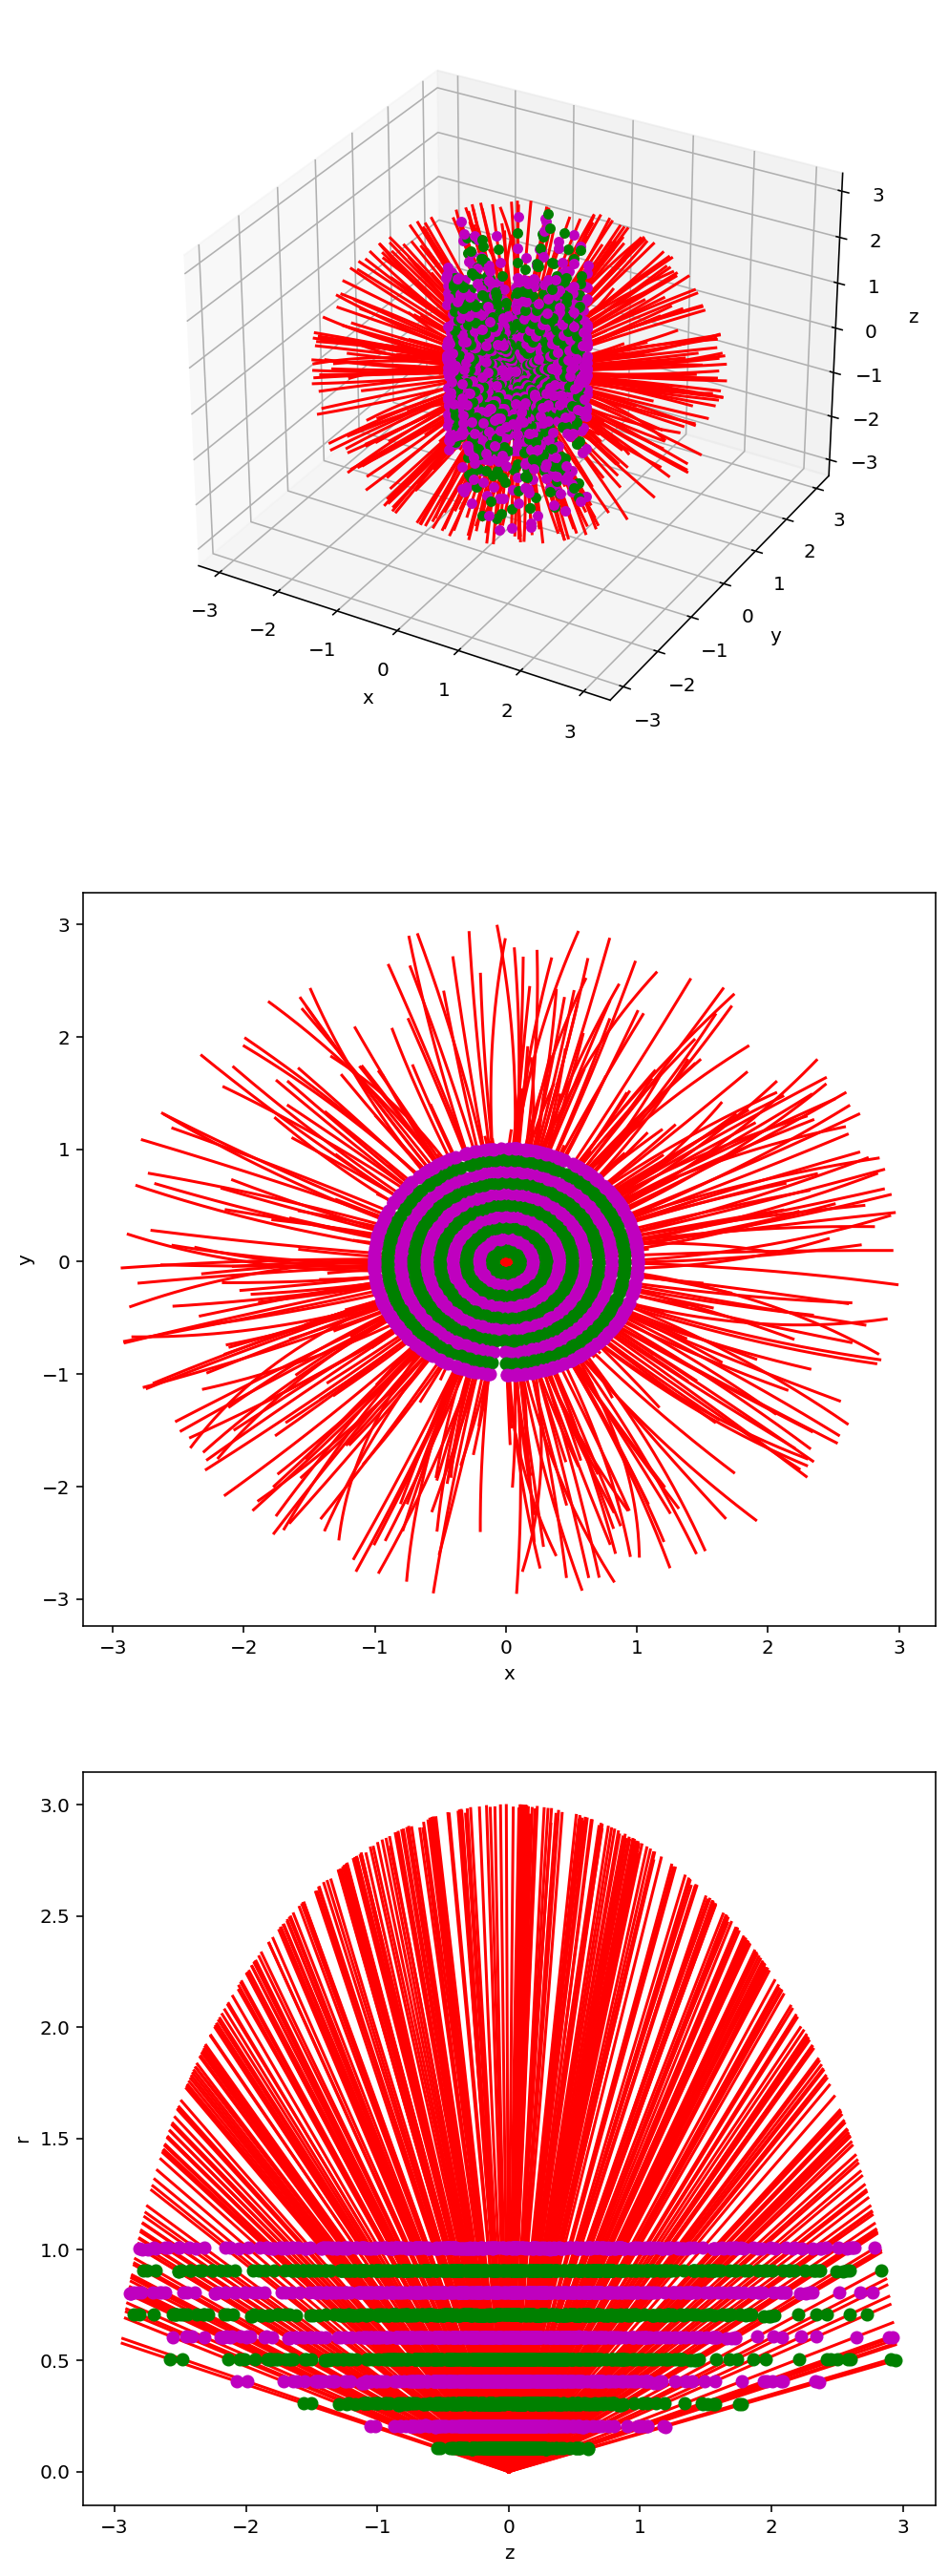

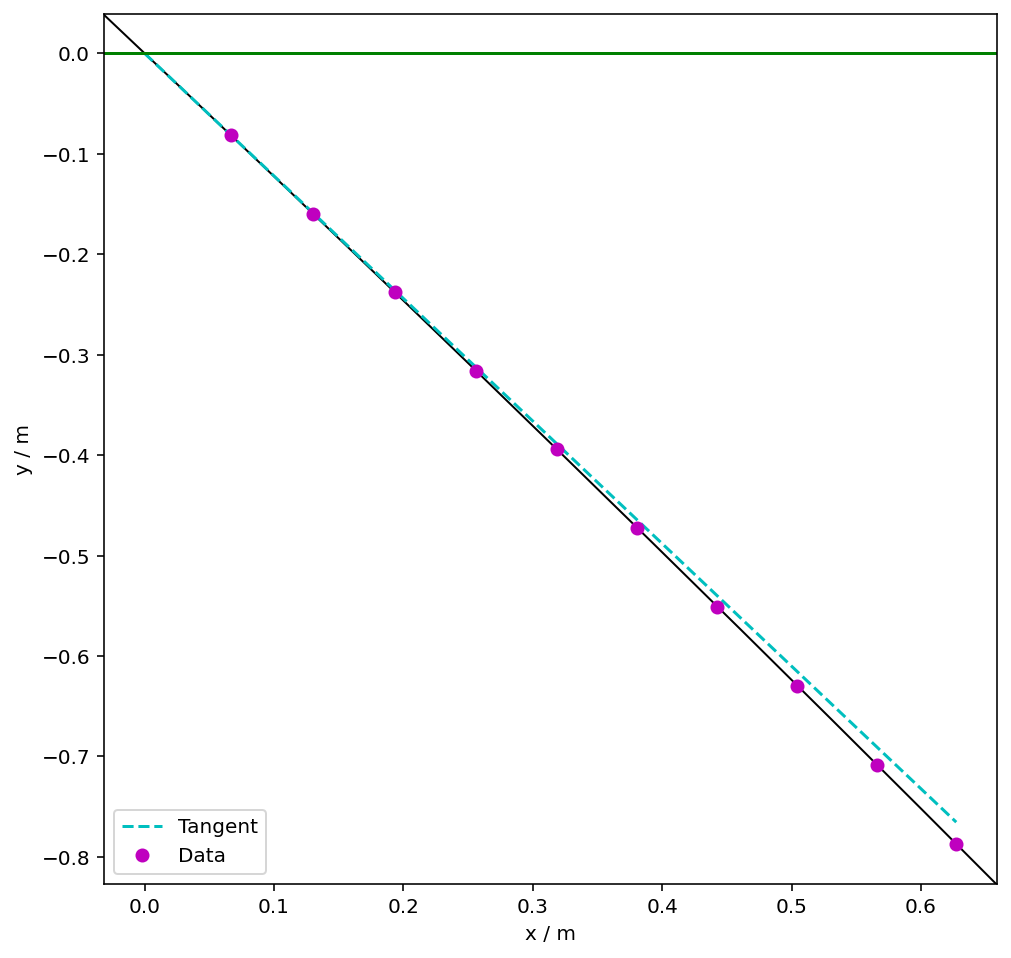

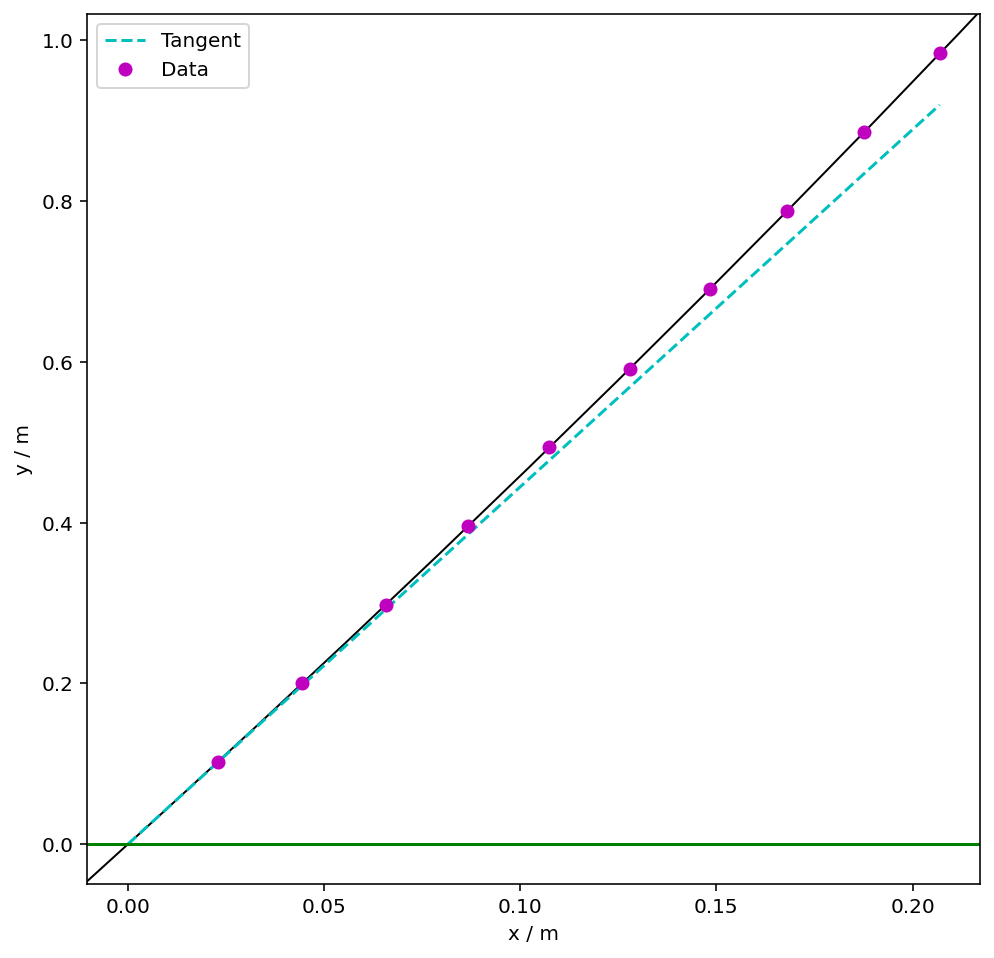

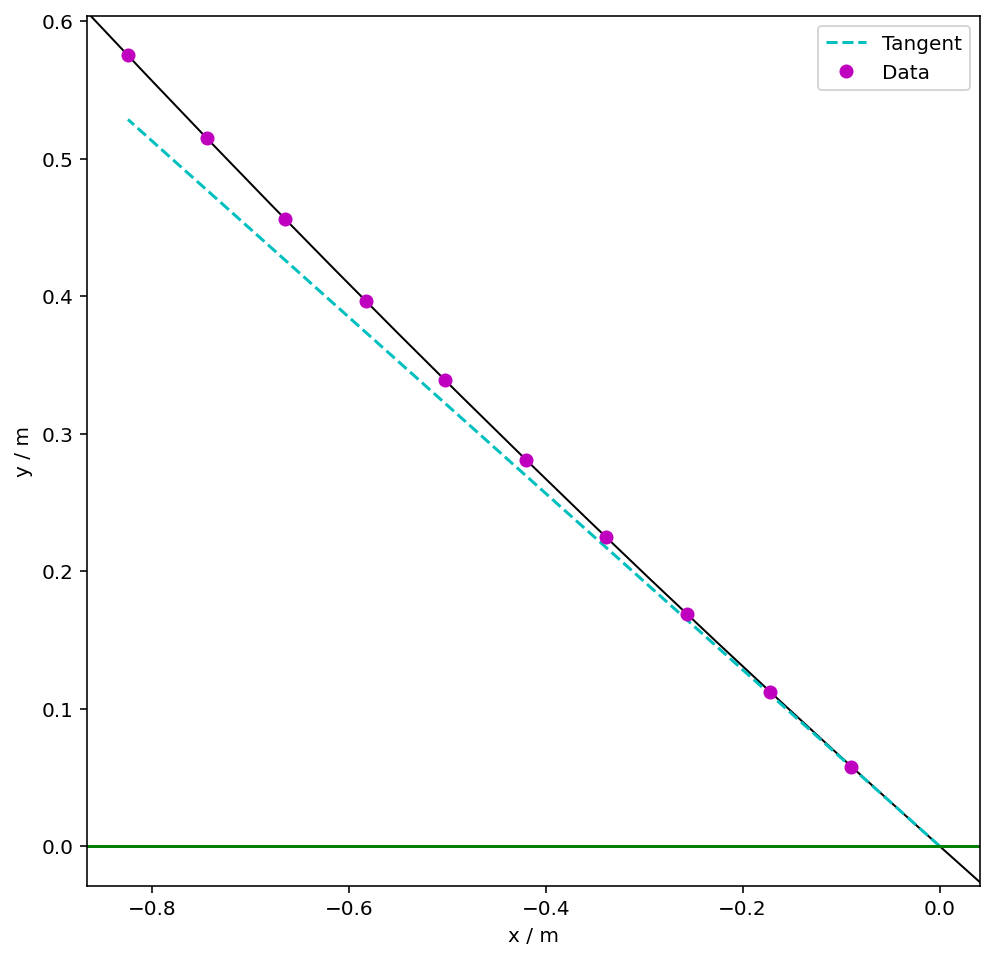

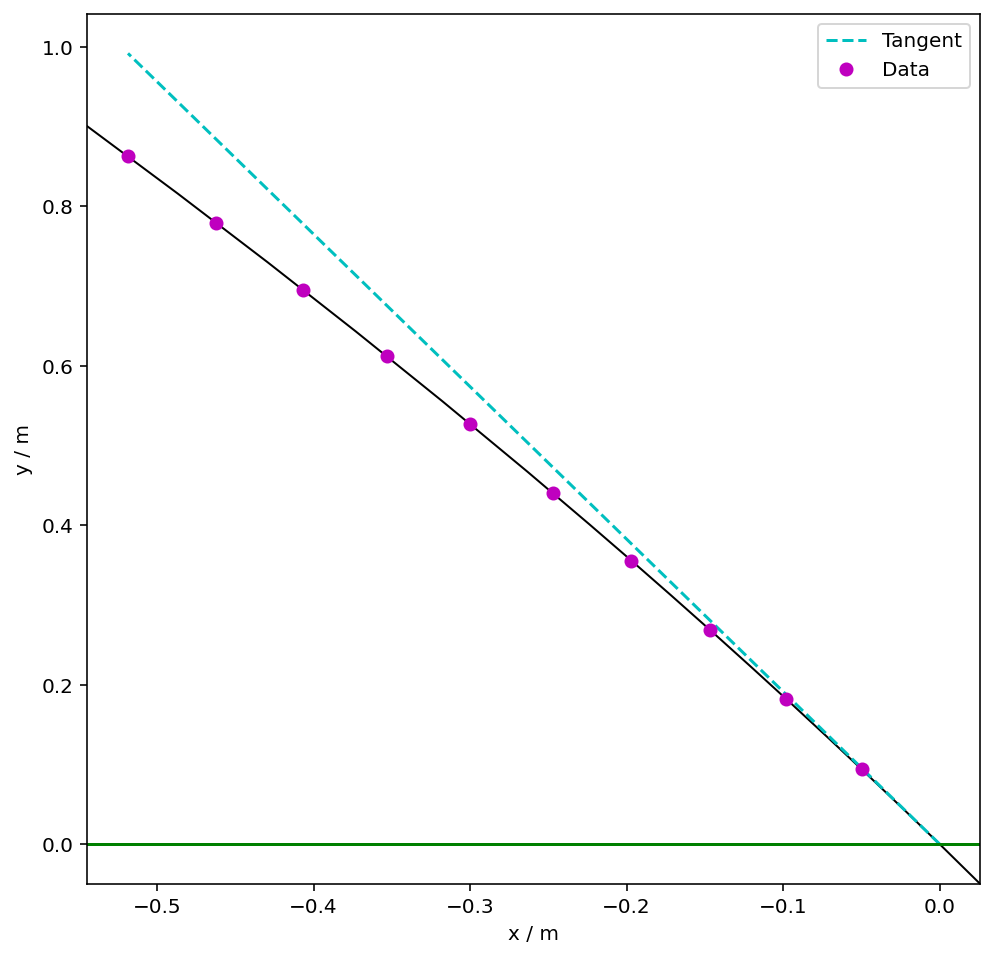

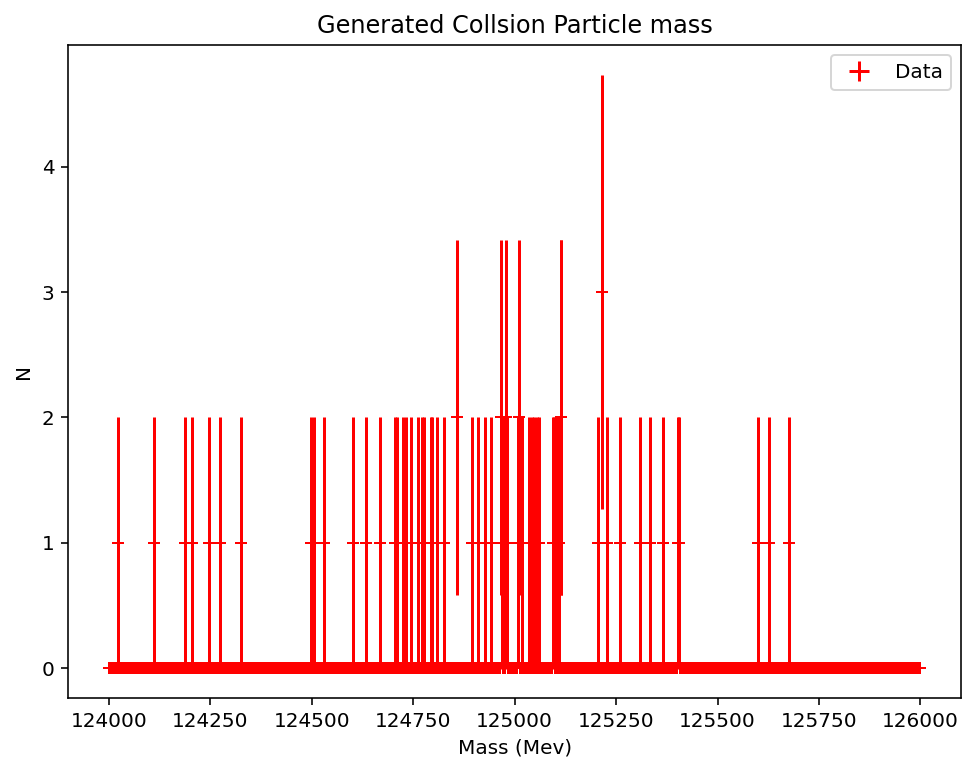

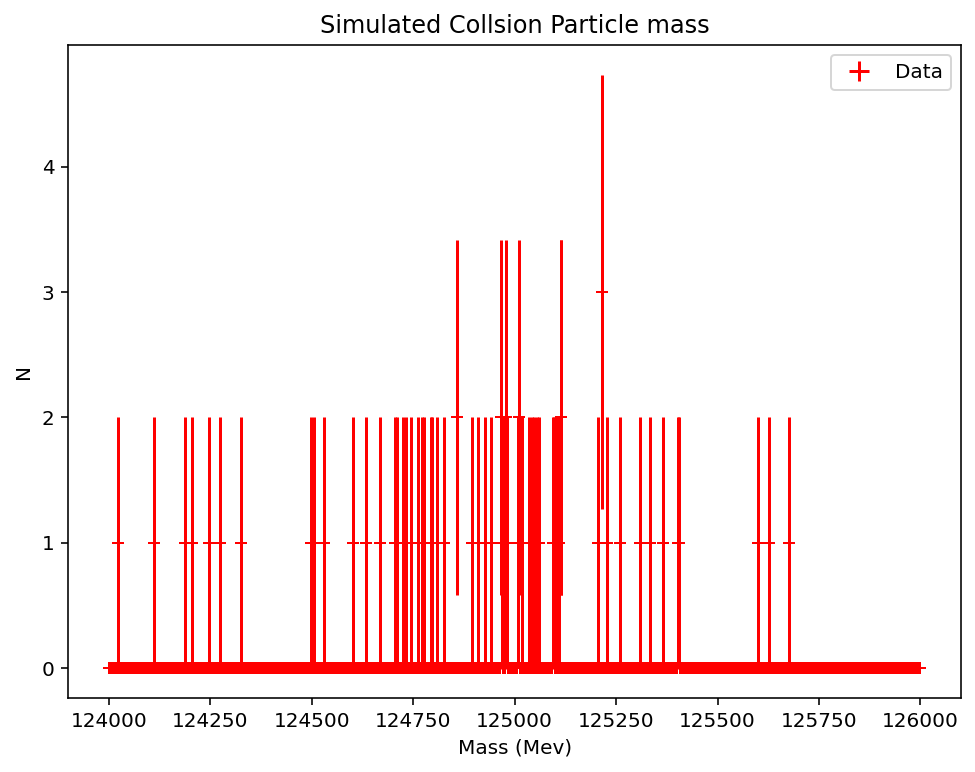

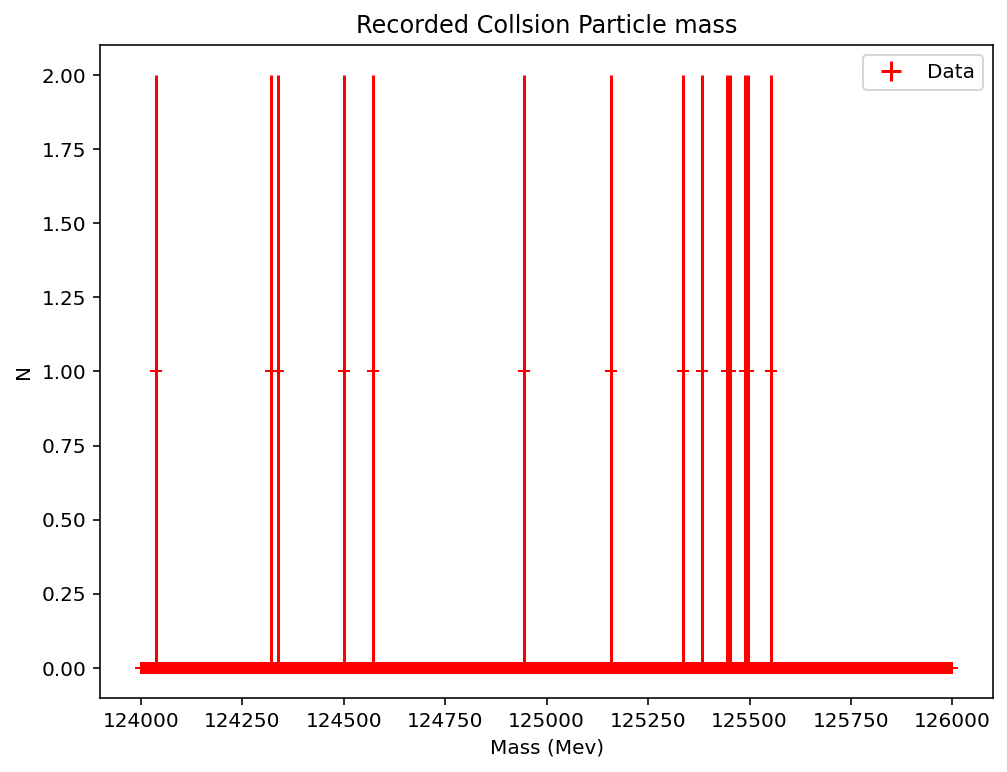

In [9]:
# fixing the "seed" of the random number generator makes the sequence reproducible
rng = np.random.default_rng(seed=23)
experiment = e.Experiment(1e-3, rng) # 1mm minimum scan, use same random number generator everywhere ###not sure if this is right

# parameters for particle tracker
time = 1E-8
timestep = time/100

# Neaten the output
print('--------------------')
print('-Running Experiment-')
print('--------------------')
print('-Parameters-')
print(f'Number of Events: {numberOfEvents}')
print(f'Total Number of Particles: {numberOfEvents*4}')
print(f'Number of Detectors: {numberOfDetectors}')
print(f'Detectors Length: {detectorLength} m')
print(f'Detectors Thickness: {detectorThickness} m')
print(f'Detectors Material: {detectorMaterial}')
print(f'Time: {time} seconds')
print('--------------------')

# inner travel cylinder is left as 0.1 radius
# "silicon detectors" before the iron block in a 1m space
for i in np.linspace(0.1,1,numberOfDetectors):
    experiment.add_volume(c.Cylinder(lowr=i, highr=i+detectorThickness, lowz=-(detectorLength/2), highz=(detectorLength/2), material=m.Material(rho=2330.0, Z=14, A=28.085))) #should loop for all detectors
    print('--------------------')
#iron block
experiment.add_volume(c.Cylinder(lowr=1.2, highr=2.2 , lowz=-(detectorLength/2), highz=(detectorLength/2), material=m.Material(rho=7870.0, Z=26, A=55.845)))
print('--------------------')

# histogram of the mass of the 4muon system
HistG = h.Histogram(histoResolution, 124000, 126000, "Generated Collsion Particle mass")
HistS = h.Histogram(histoResolution, 124000, 126000, "Simulated Collsion Particle mass")
HistR = h.Histogram(histoResolution, 124000, 126000, "Recorded Collsion Particle mass")

TOTsum_gen_muons = [0]*numberOfEvents
TOTsum_sim_muons = [0]*numberOfEvents
TOTsum_rec_muons = [0]*numberOfEvents

# Plots
fig1=plt.figure(figsize=(8,24))
ax11=fig1.add_subplot(311,projection='3d')
ax12=fig1.add_subplot(312)
ax13=fig1.add_subplot(313)
# Labels
ax11.set_xlabel('x')
ax11.set_ylabel('y')
ax11.set_zlabel('z')
ax12.set_xlabel('x')
ax12.set_ylabel('y')
ax13.set_xlabel('z')
ax13.set_ylabel('r')

print()
print()
print()
print('--------------------')
for nev in range(numberOfEvents):

    # Arrays
    particle_gen_event = [0]*4
    particle_sim_event = [0]*4
    particle_rec_event = [0]*4
    radius = [0]*4
    pTotal = [0]*4
    phi = [0]*4
    rz_grad = [0]*4
    theta = [0]*4
    px = [0]*4
    py = [0]*4
    pz = [0]*4
    charge = [0]*4


    for imuon in range(4): # one event = 4 muons
        particle_gen = Muon[imuon+nev*4] # changed the index to imuon+nev*4
        particle_gen_event[imuon] = particle_gen # save for later

        if True:
            print(f"-Input particle {imuon}-")
            print(particle_gen)
            print('--------------------')

        # run the simulation and get the particle tracking data
        tracker = pt.ParticleTracker(particle_gen, time, timestep)
        nsteps = tracker.propagate(experiment)

        particle_sim = tracker.particle_out
        particle_sim_event[imuon] = particle_gen # save for later
        if True:
            print(f"-Final particle {imuon} after {nsteps} steps-")
            print(particle_sim)
            print('--------------------')

        hits = experiment.detect_particles(tracker.track)

        # extract x-y-z coordinates to be used
        x = np.zeros(numberOfDetectors)
        y = np.zeros(numberOfDetectors)
        z = np.zeros(numberOfDetectors)
        for i in range(numberOfDetectors):
            x[i] = hits[i][5]
            y[i] = hits[i][6]
            z[i] = hits[i][7]
        r = np.sqrt(x**2+y**2)

        if True:
            print(f'-Hits of muon {imuon}-')
            for i in range(numberOfDetectors):
                print(f"Hit in detector {i} (x,y,z): ({x[i]},{y[i]},{z[i]}) with radius ({r[i]})")
            print('--------------------')

        # limit drawing to event, change to 'if True' for all
        if True:
            # graphing 3D, x vs y, z vs r
            ax11.plot3D(tracker.track[:,5],tracker.track[:,6],tracker.track[:,7], color = 'r', linestyle = '-', label = 'simulated track')
            ax12.plot(tracker.track[:,5], tracker.track[:,6], color = 'r', linestyle = '-', label = 'simulated track')
            ax13.plot(tracker.track[:,7], np.sqrt(tracker.track[:,5]**2+tracker.track[:,6]**2), color = 'r', linestyle = '-', label = 'simulated track')
            for i in range(numberOfDetectors):
                if (hits[i][4]>0):
                    if (i % 2) == 0:
                        c = 'g'
                    else:
                        c = 'm'
                    ax11.scatter(hits[i][5],hits[i][6],hits[i][7], marker = 'o', color = c , label = f'Hit detector {i}')
                    ax12.errorbar(hits[i][5], hits[i][6], marker = 'o', color = c , label = f'Hit detector {i}')
                    ax13.errorbar(hits[i][7], np.sqrt(hits[i][5]**2+hits[i][6]**2), marker = 'o', color = c , label = f'Hit detector {i}')

            # circle in x-y plane
            circle = cf.CircleFit(x,y)
            radius[imuon] = circle.get_radius()
            pTotal[imuon] = circle.get_tot_momentum()
            phi[imuon] = circle.get_angle_phi()
            px[imuon] = circle.get_px()
            py[imuon] = circle.get_py()

            # r-z projection
            zerr = 0.001
            rerr = 0.001
            rz_line = lf.LinearFit(z,r,rerr,zerr,m=1,c=0)
            rz_line.fit()
            rz_grad[imuon] = rz_line.get_grad()
            theta[imuon] = np.arctan(rz_grad[imuon])
            pz[imuon] = pTotal[imuon]/np.tan(theta[imuon])

            print('-Calculated parameters for curvature:-')
            print(circle)
            print('-Calculate momentum from circle for xy planes:-')
            print(f"Correct angle phi = {np.degrees(np.arctan2(particle_gen_event[imuon].py, particle_gen_event[imuon].px))} degrees")
            print(f"Angle between tangent and x-axis, phi = {np.degrees(phi[imuon])} degrees")
            print('-Calculate momentum in z plane:-')
            print(f"Angle between r and z axis, theta = {np.degrees(theta[imuon])} degrees")
            print()
            print(f"Momentum (px,py,pz) = ({px[imuon]},{py[imuon]},{pz[imuon]})")
            print('--------------------')
            if nev == 0 or (nev+1)%saveNumber == 0:
                circle.plot(filename = f'graphs/circleplots/circleplot_{nev}event_{imuon}muon_{numberOfDetectors}detectors.png')

            # inputing resultant muon values into array
            charge[imuon] = circle.get_Q()
            particle_rec_event[imuon] = p.Particle(px= px[imuon], py= py[imuon],pz= pz[imuon], Q= charge[imuon], m=mMuon)

    # Save graphing figures for every 10 interactions
    if nev == 0 or (nev+1)%saveNumber == 0:
        fig1.savefig(f'graphs/graphingplots/FULLtrackingplot_{nev}events_{imuon}muon_{numberOfDetectors}detectors.png')
        extent1 = ax11.get_window_extent().transformed(fig1.dpi_scale_trans.inverted())
        fig1.savefig(f'graphs/graphingplots/3Dtrackingplot_{nev}events_{imuon}muon_{numberOfDetectors}detectors.png', bbox_inches=extent1.expanded(1.1, 1.2))
        extent2 = ax12.get_window_extent().transformed(fig1.dpi_scale_trans.inverted())
        fig1.savefig(f'graphs/graphingplots/xVSytrackingplot_{nev}events_{imuon}muon_{numberOfDetectors}detectors.png', bbox_inches=extent2.expanded(1.1, 1.2))
        extent3 = ax13.get_window_extent().transformed(fig1.dpi_scale_trans.inverted())
        fig1.savefig(f'graphs/graphingplots/zVSrtrackingplot_{nev}events_{imuon}muon_{numberOfDetectors}detectors.png', bbox_inches=extent3.expanded(1.1, 1.2))

    # JK: here we can fill some histograms of quantities that need all 4 muons*np.sin(theta[imuon])pTotal[muon]*np.sin(phi[imuon])*np.sin(theta[imuon])
    sum_gen_muons = particle_gen_event[0]+particle_gen_event[1]+particle_gen_event[2]+particle_gen_event[3]
    sum_sim_muons = particle_sim_event[0]+particle_sim_event[1]+particle_sim_event[2]+particle_sim_event[3]
    sum_rec_muons = particle_rec_event[0]+particle_rec_event[1]+particle_rec_event[2]+particle_rec_event[3]

    TOTsum_gen_muons[nev] = sum_gen_muons.mass()
    TOTsum_sim_muons[nev] = sum_sim_muons.mass()
    TOTsum_rec_muons[nev] = sum_rec_muons.mass()

    # this should look similar to your plot above, but only few entries for now...
    HistG.fill(sum_gen_muons.mass())
    HistS.fill(sum_sim_muons.mass())
    HistR.fill(sum_rec_muons.mass())

HistG.plot(xlabel = 'Mass (Mev)', filename = f'graphs/histograms/histogramG_{numberOfEvents}events_{imuon}muon_{numberOfDetectors}detectors.png')
HistS.plot(xlabel = 'Mass (Mev)', filename = f'graphs/histograms/histogramS_{numberOfEvents}events_{imuon}muon_{numberOfDetectors}detectors.png')
HistR.plot(xlabel = 'Mass (Mev)', filename = f'graphs/histograms/histogramR_{numberOfEvents}events_{imuon}muon_{numberOfDetectors}detectors.png')

meanG = np.sum(TOTsum_gen_muons)/len(TOTsum_gen_muons)
standardDevG = np.sqrt((np.sum((TOTsum_gen_muons-meanG)**2))/(len(TOTsum_gen_muons)*(len(TOTsum_gen_muons)-1)))
meanS = np.sum(TOTsum_sim_muons)/len(TOTsum_sim_muons)
standardDevS = np.sqrt((np.sum((TOTsum_sim_muons-meanS)**2))/(len(TOTsum_sim_muons)*(len(TOTsum_sim_muons)-1)))
meanR = np.sum(TOTsum_rec_muons)/len(TOTsum_rec_muons)
standardDevR = np.sqrt((np.sum((TOTsum_rec_muons-meanR)**2))/(len(TOTsum_rec_muons)*(len(TOTsum_rec_muons)-1)))

print('--------------------')
print(f'Mean mass of Collision Particle, as calculated from the original data (with standard deviation) : {meanG} +-({standardDevG}) MeV')
print('--------------------')
print(f'Mean mass of Collision Particle, as calculated from the simulated data (with standard deviation) : {meanS} +-({standardDevS}) MeV')
print('--------------------')
print(f'Mean mass of Collision Particle, as calculated from the recreated data (with standard deviation) : {meanR} +-({standardDevR}) MeV')

In [10]:
print('--------------------')
print(f'Mean mass of Collision Particle, as calculated from the original data (with standard deviation) : {meanG} +-({standardDevG}) MeV')
print('--------------------')
print(f'Mean mass of Collision Particle, as calculated from the simulated data (with standard deviation) : {meanS} +-({standardDevS}) MeV')
print('--------------------')
print(f'Mean mass of Collision Particle, as calculated from the recreated data (with standard deviation) : {meanR} +-({standardDevR}) MeV')

--------------------
Mean mass of Collision Particle, as calculated from the original data (with standard deviation) : 122600.45209986981 +-(698.1172088569415) MeV
--------------------
Mean mass of Collision Particle, as calculated from the simulated data (with standard deviation) : 122600.45209986981 +-(698.1172088569415) MeV
--------------------
Mean mass of Collision Particle, as calculated from the recreated data (with standard deviation) : 122111.51103553595 +-(1115.0738791823146) MeV


In [11]:
##https://stackoverflow.com/questions/26989131/add-cylinder-to-plot

In [12]:
##creat spiral for each interaction, then pull the data off that way
##then plot circles to each muon to pull out momentum (curavture)